In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import math

About Dataset
Data description

There are 3 types of input features:

    Objective: factual information;
    Examination: results of medical examination;
    Subjective: information given by the patient.

Features:

    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code |
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal 
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination. 

In [2]:
df = pd.read_excel('cardio_vascular_desease.xlsx')

# Data Inspections

In [3]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
df.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.825957     66.899171      1.366871      1.226457      0.088129   
std      154.006496      8.212236      0.680250      0.572270      0.283484   
min     -140.000000     30.000000      1.000000      1.000000      0.000000   
25%      120.000000     60.000000      1.000000      1.000000      0.000000   
50%      120.000000     60.000000      1.000000      1.000000      0.000000   
75%      140.000000     75.000000      2.000000      1.000000      0.000000   
max    16020.000000    140.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

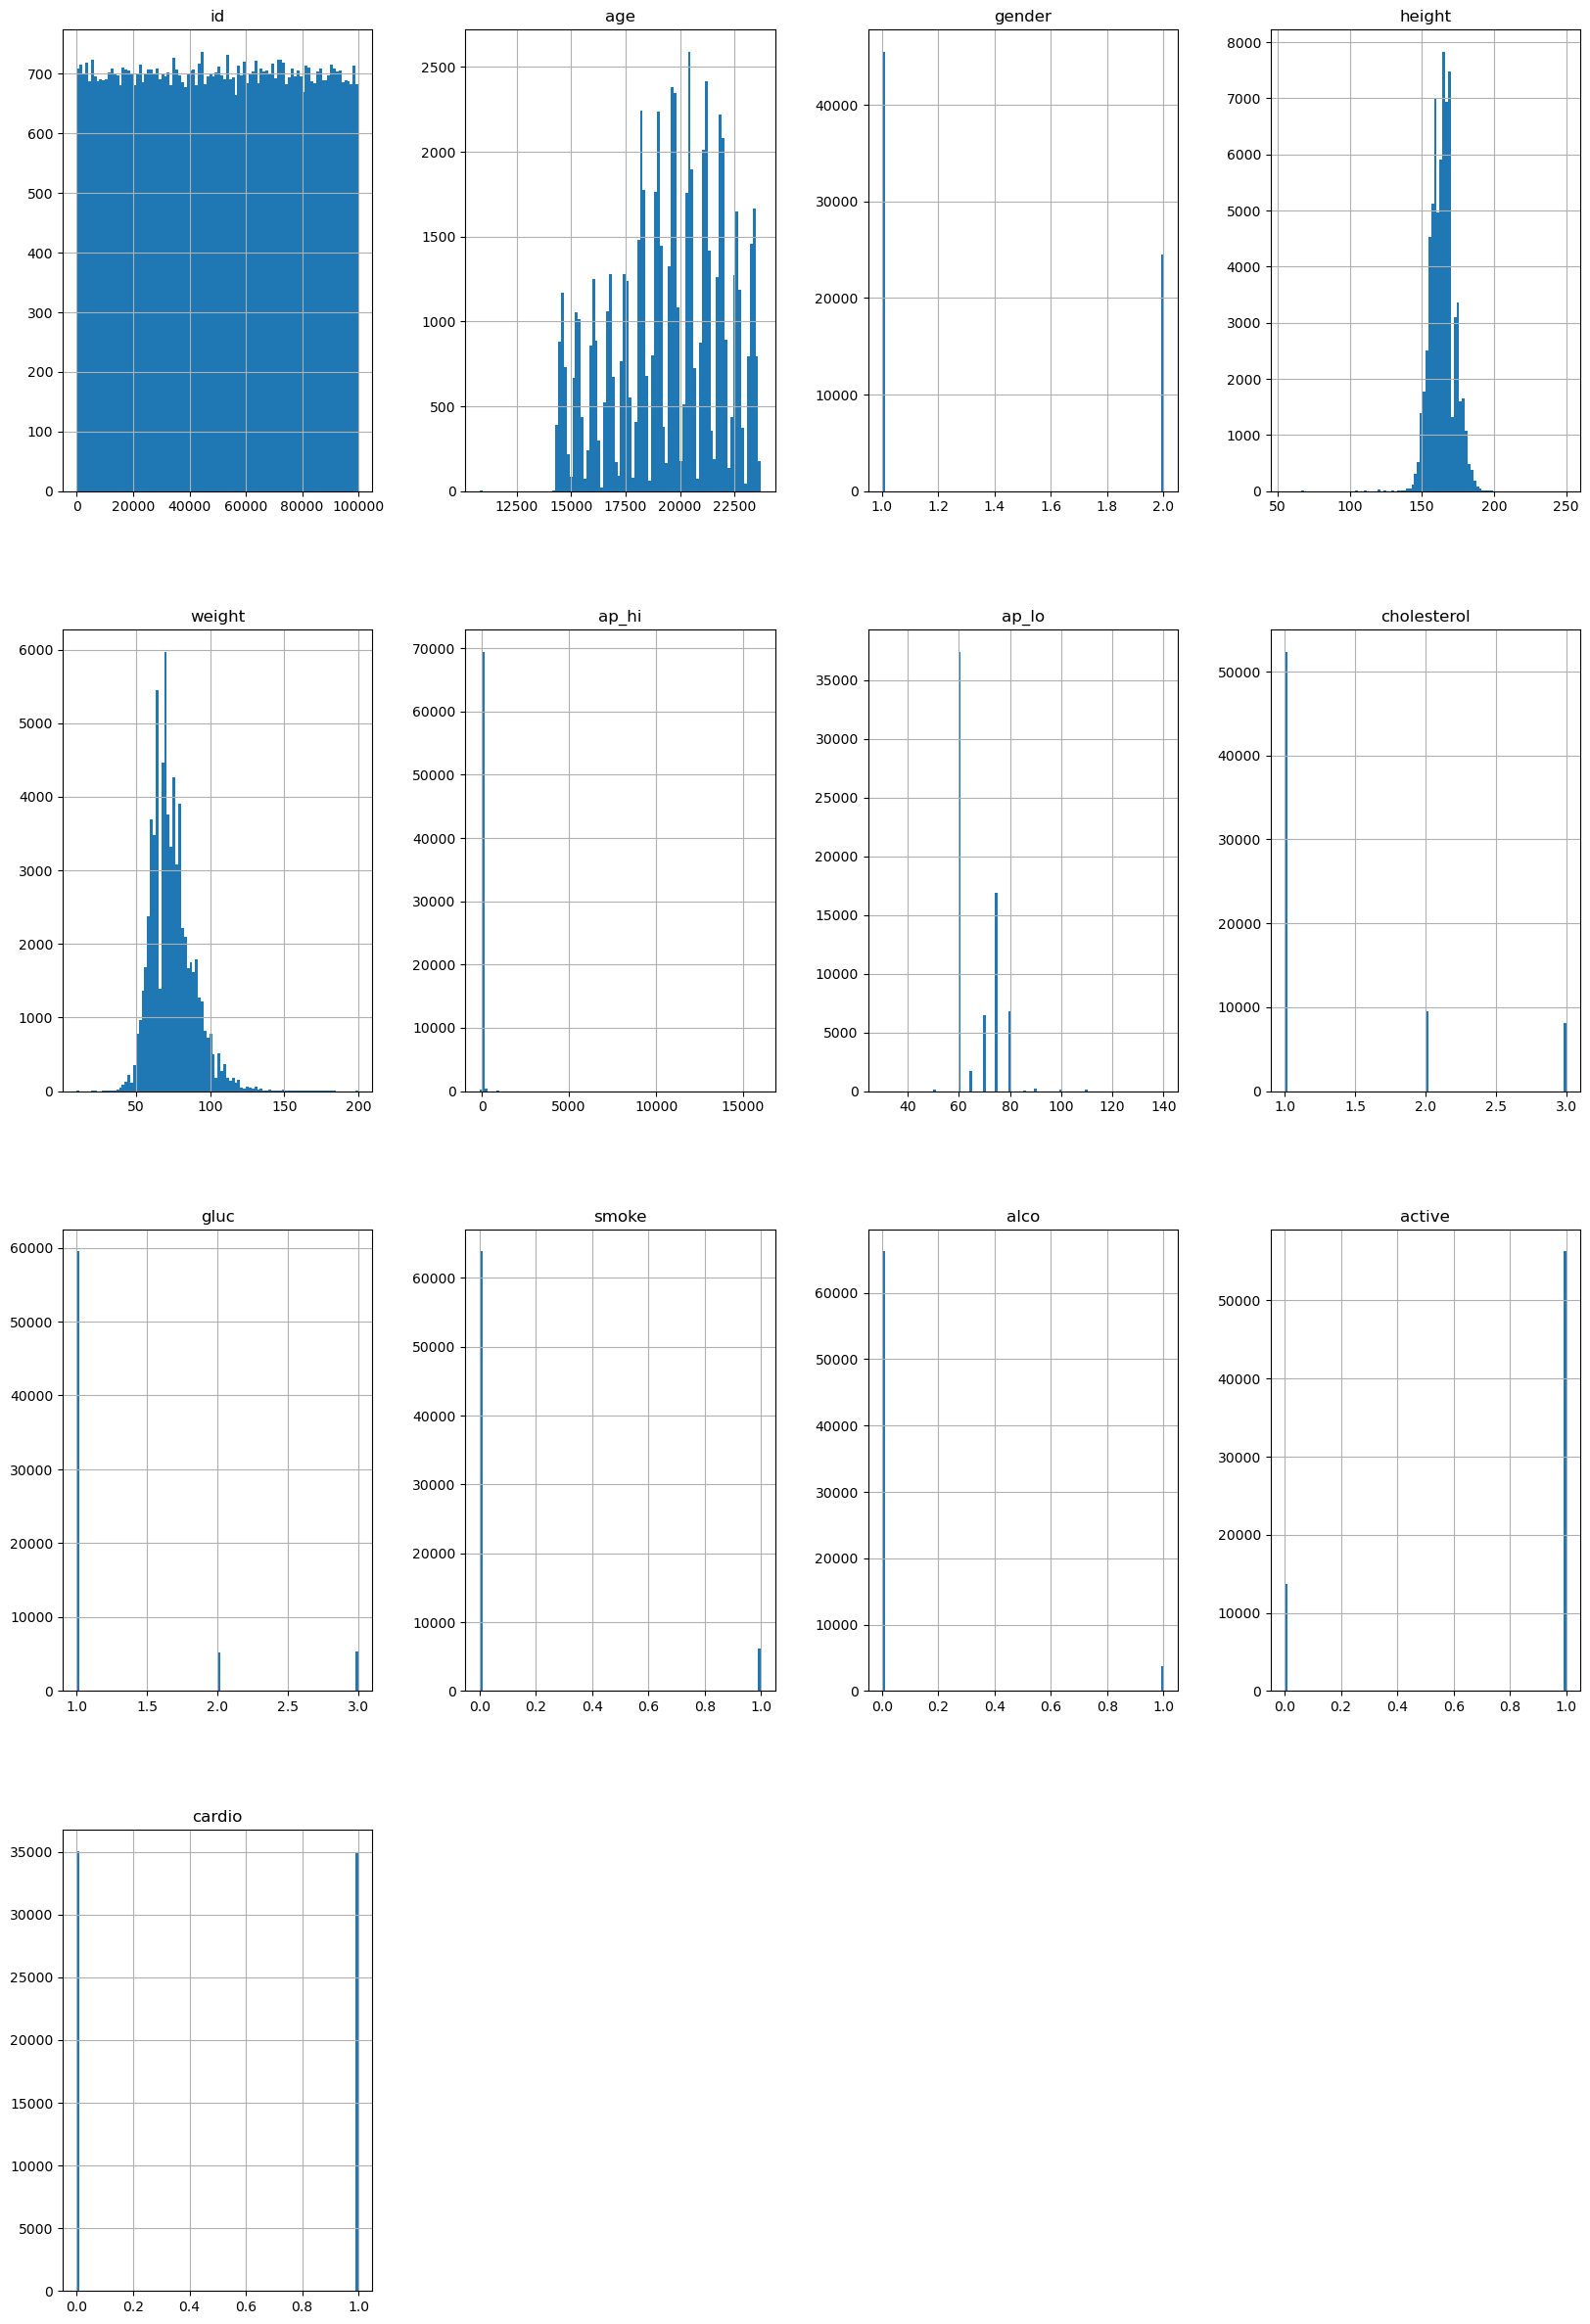

In [7]:
df.hist(figsize = (20,30), bins = 100)
plt.show()

# Data Cleaning and Outlier Detection


__Handling Missing Values in Data__

In [8]:
df.isna().sum() / len(df)

id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64

__Convert Age(in days) in Age(in years)__

In [9]:
df['age']

0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69995    19240
69996    22601
69997    19066
69998    22431
69999    20540
Name: age, Length: 70000, dtype: int64

In [10]:
df['age'] = df['age'] / 365
df.head()

id        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0   0  50.391781       2     168    62.0    110     80            1     1   
1   1  55.419178       1     156    85.0    140     90            3     1   
2   2  51.663014       1     165    64.0    130     70            3     1   
3   3  48.282192       2     169    82.0    150    100            1     1   
4   4  47.873973       1     156    56.0    100     60            1     1   

   smoke  alco  active  cardio  
0      0     0       1       0  
1      0     0       1       1  
2      0     0       0       1  
3      0     0       1       1  
4      0     0       0       0

In [11]:
df['age'] = df['age'].apply(np.int64)
df.head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0    110     80            1     1      0   
1   1   55       1     156    85.0    140     90            3     1      0   
2   2   51       1     165    64.0    130     70            3     1      0   
3   3   48       2     169    82.0    150    100            1     1      0   
4   4   47       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0


__What does the new Age distribution look like?__

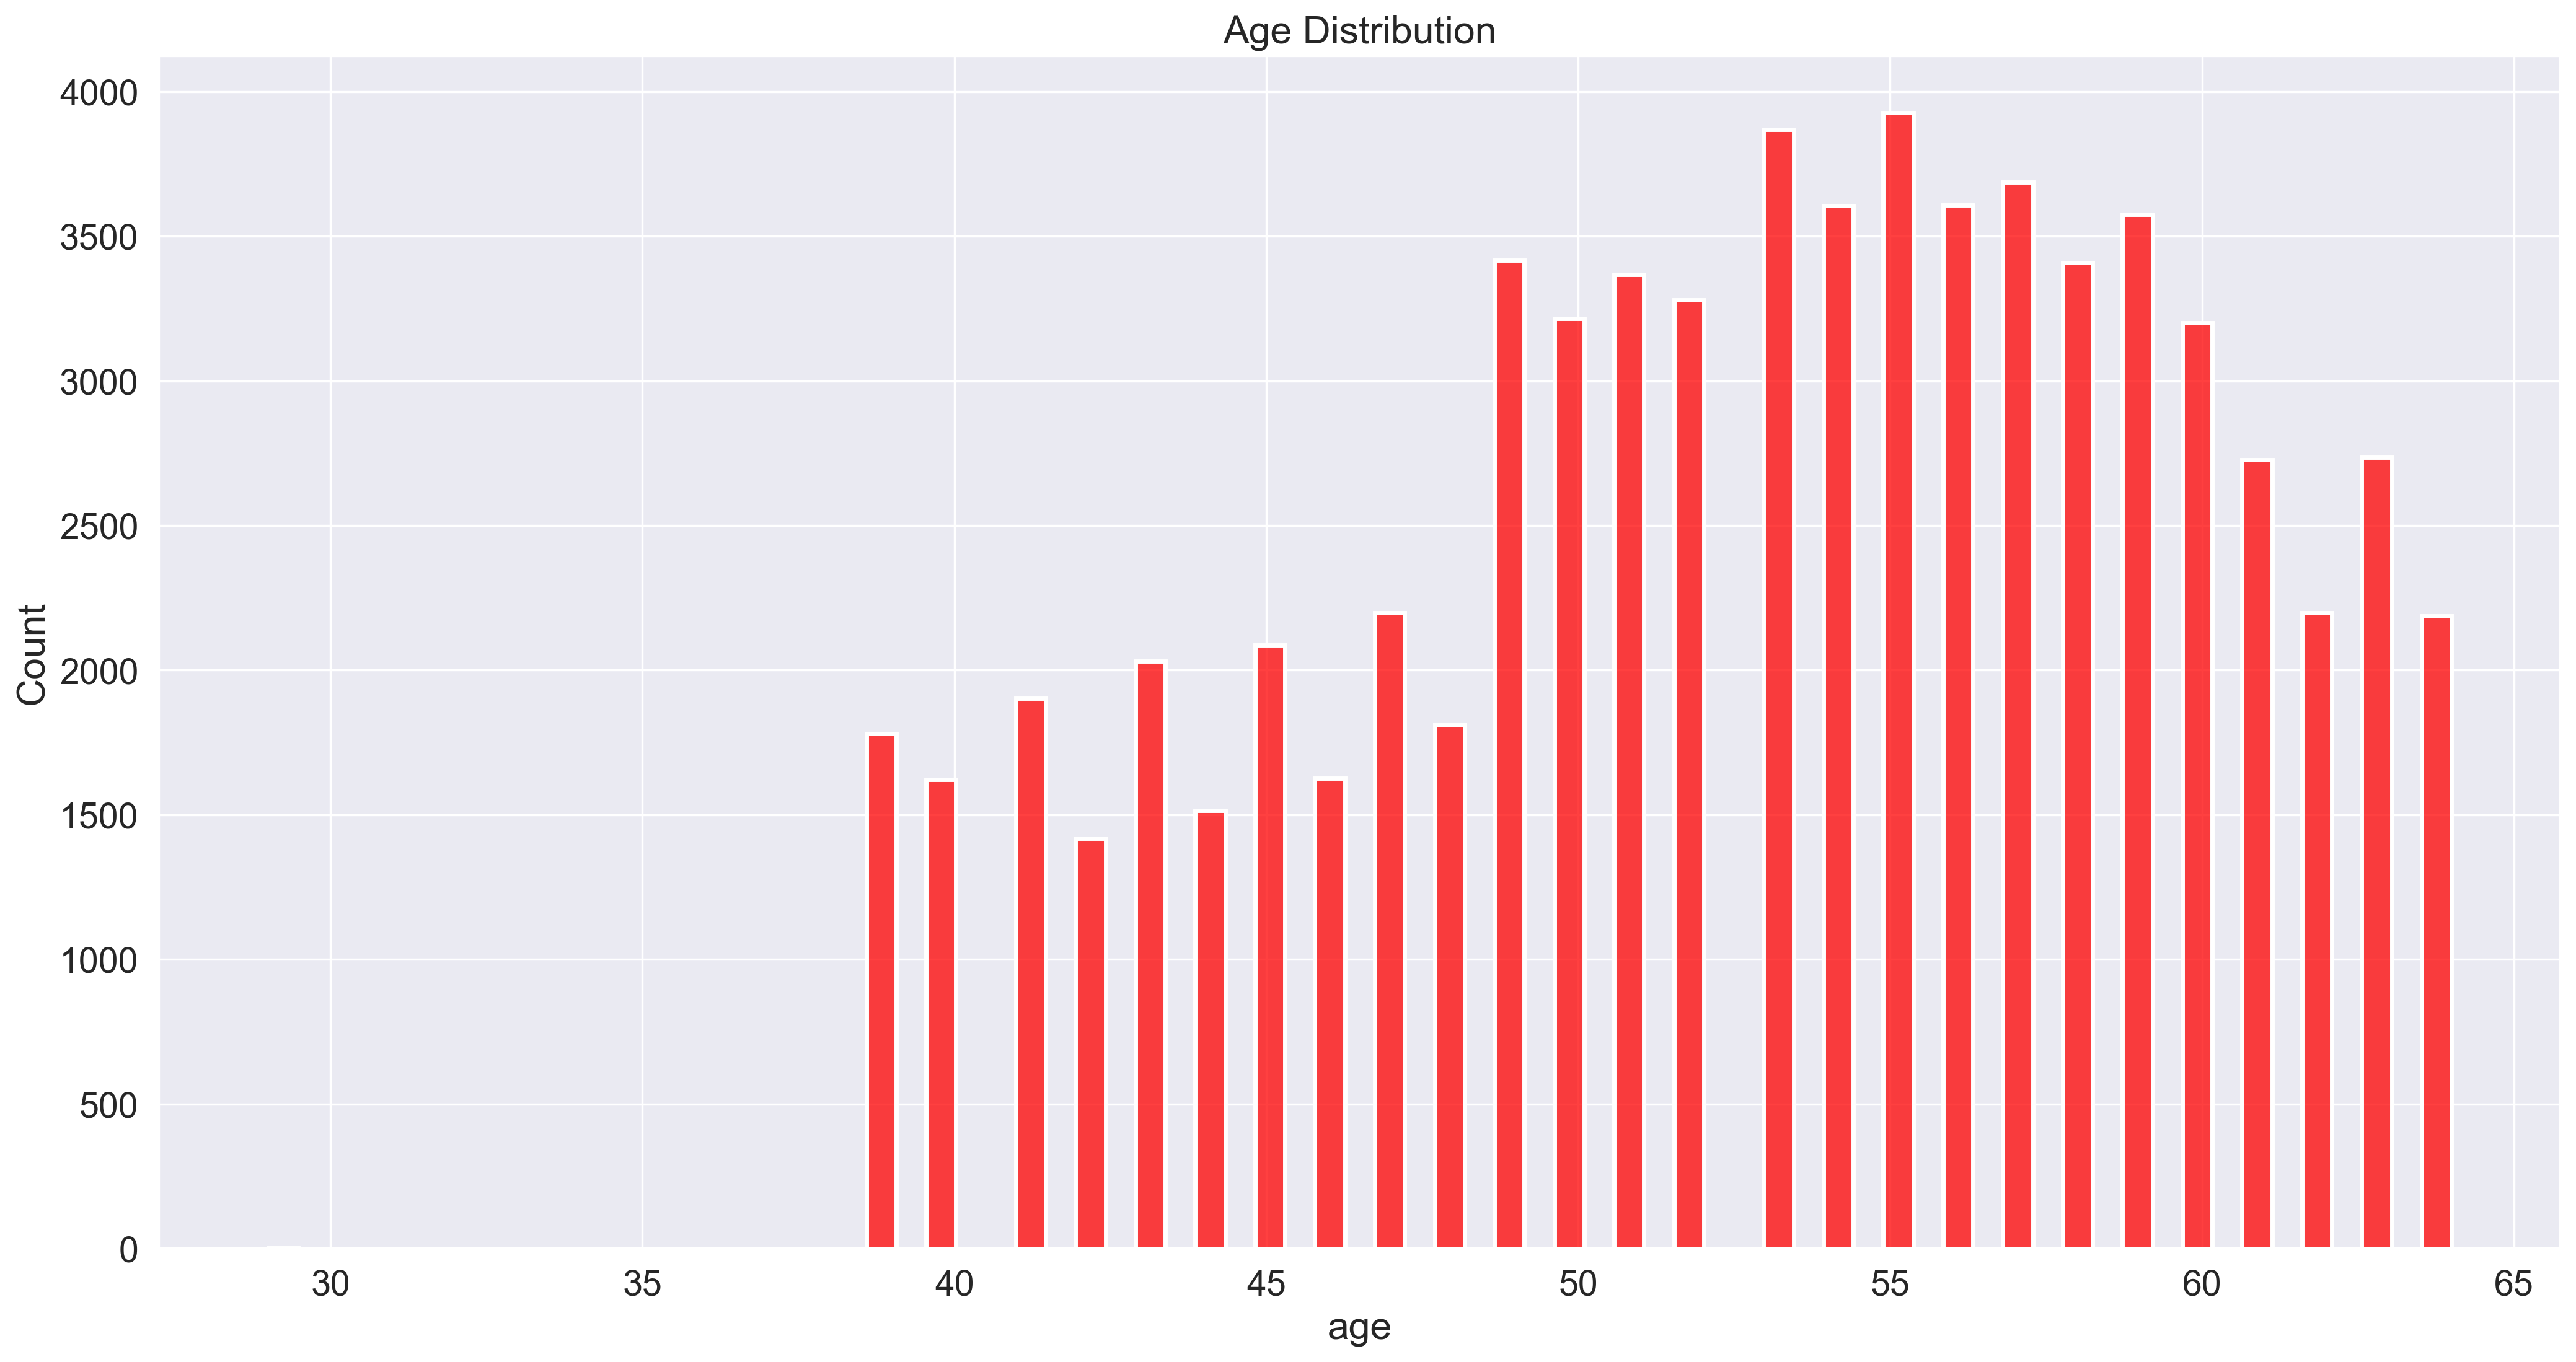

In [12]:
sns.set(style='darkgrid', font_scale=1.5)
plt.figure(figsize=(20,10), dpi = 250)
sns.histplot(data=df, x = 'age', linewidth = 2, color = 'red')
plt.title('Age Distribution')
plt.show()

In [13]:
df['age'].value_counts()

55    3927
53    3868
57    3686
56    3607
54    3605
59    3576
49    3417
58    3409
51    3368
52    3279
50    3216
60    3200
63    2736
61    2728
62    2199
47    2197
64    2187
45    2087
43    2031
41    1903
48    1811
39    1780
46    1625
40    1622
44    1514
42    1418
29       3
30       1
Name: age, dtype: int64

In [14]:
min_age = df['age'].min()
min_age

29

In [15]:
max_age =  df['age'].max()
max_age

64

In [16]:
avg_age = round(df['age'].mean(),2)
avg_age

52.84

__Outlier detection in Age column__

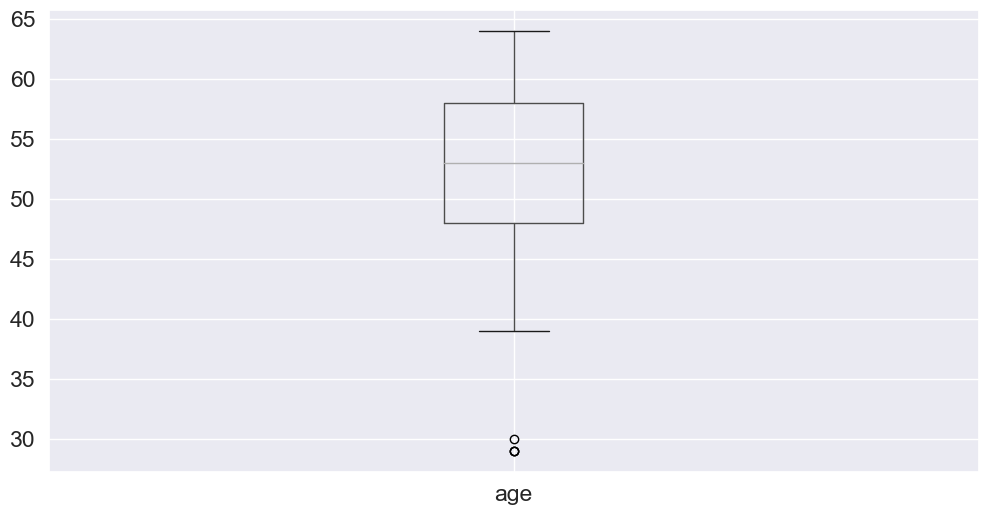

In [17]:
plt.figure(figsize = (12,6)) 
df.boxplot("age")
plt.show()

In [18]:
index_outliers = df.loc[df.age < 35].index
index_outliers

Int64Index([6219, 22343, 30666, 55905], dtype='int64')

In [19]:
df.drop(index_outliers, inplace=True)

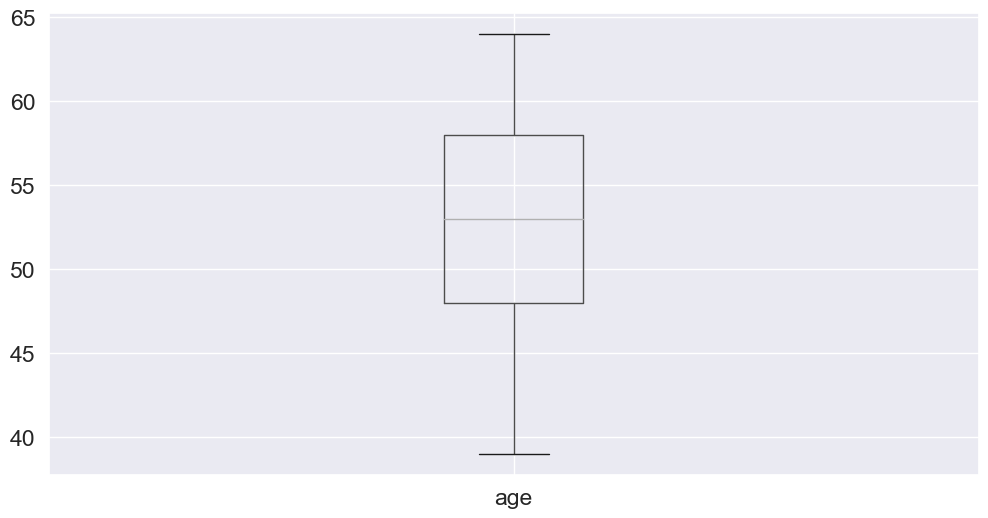

In [20]:
plt.figure(figsize = (12,6)) # boxplot
df.boxplot("age")
plt.show()

In [21]:
min_age = df['age'].min()
min_age

39


__What does the Height distribution look like?__

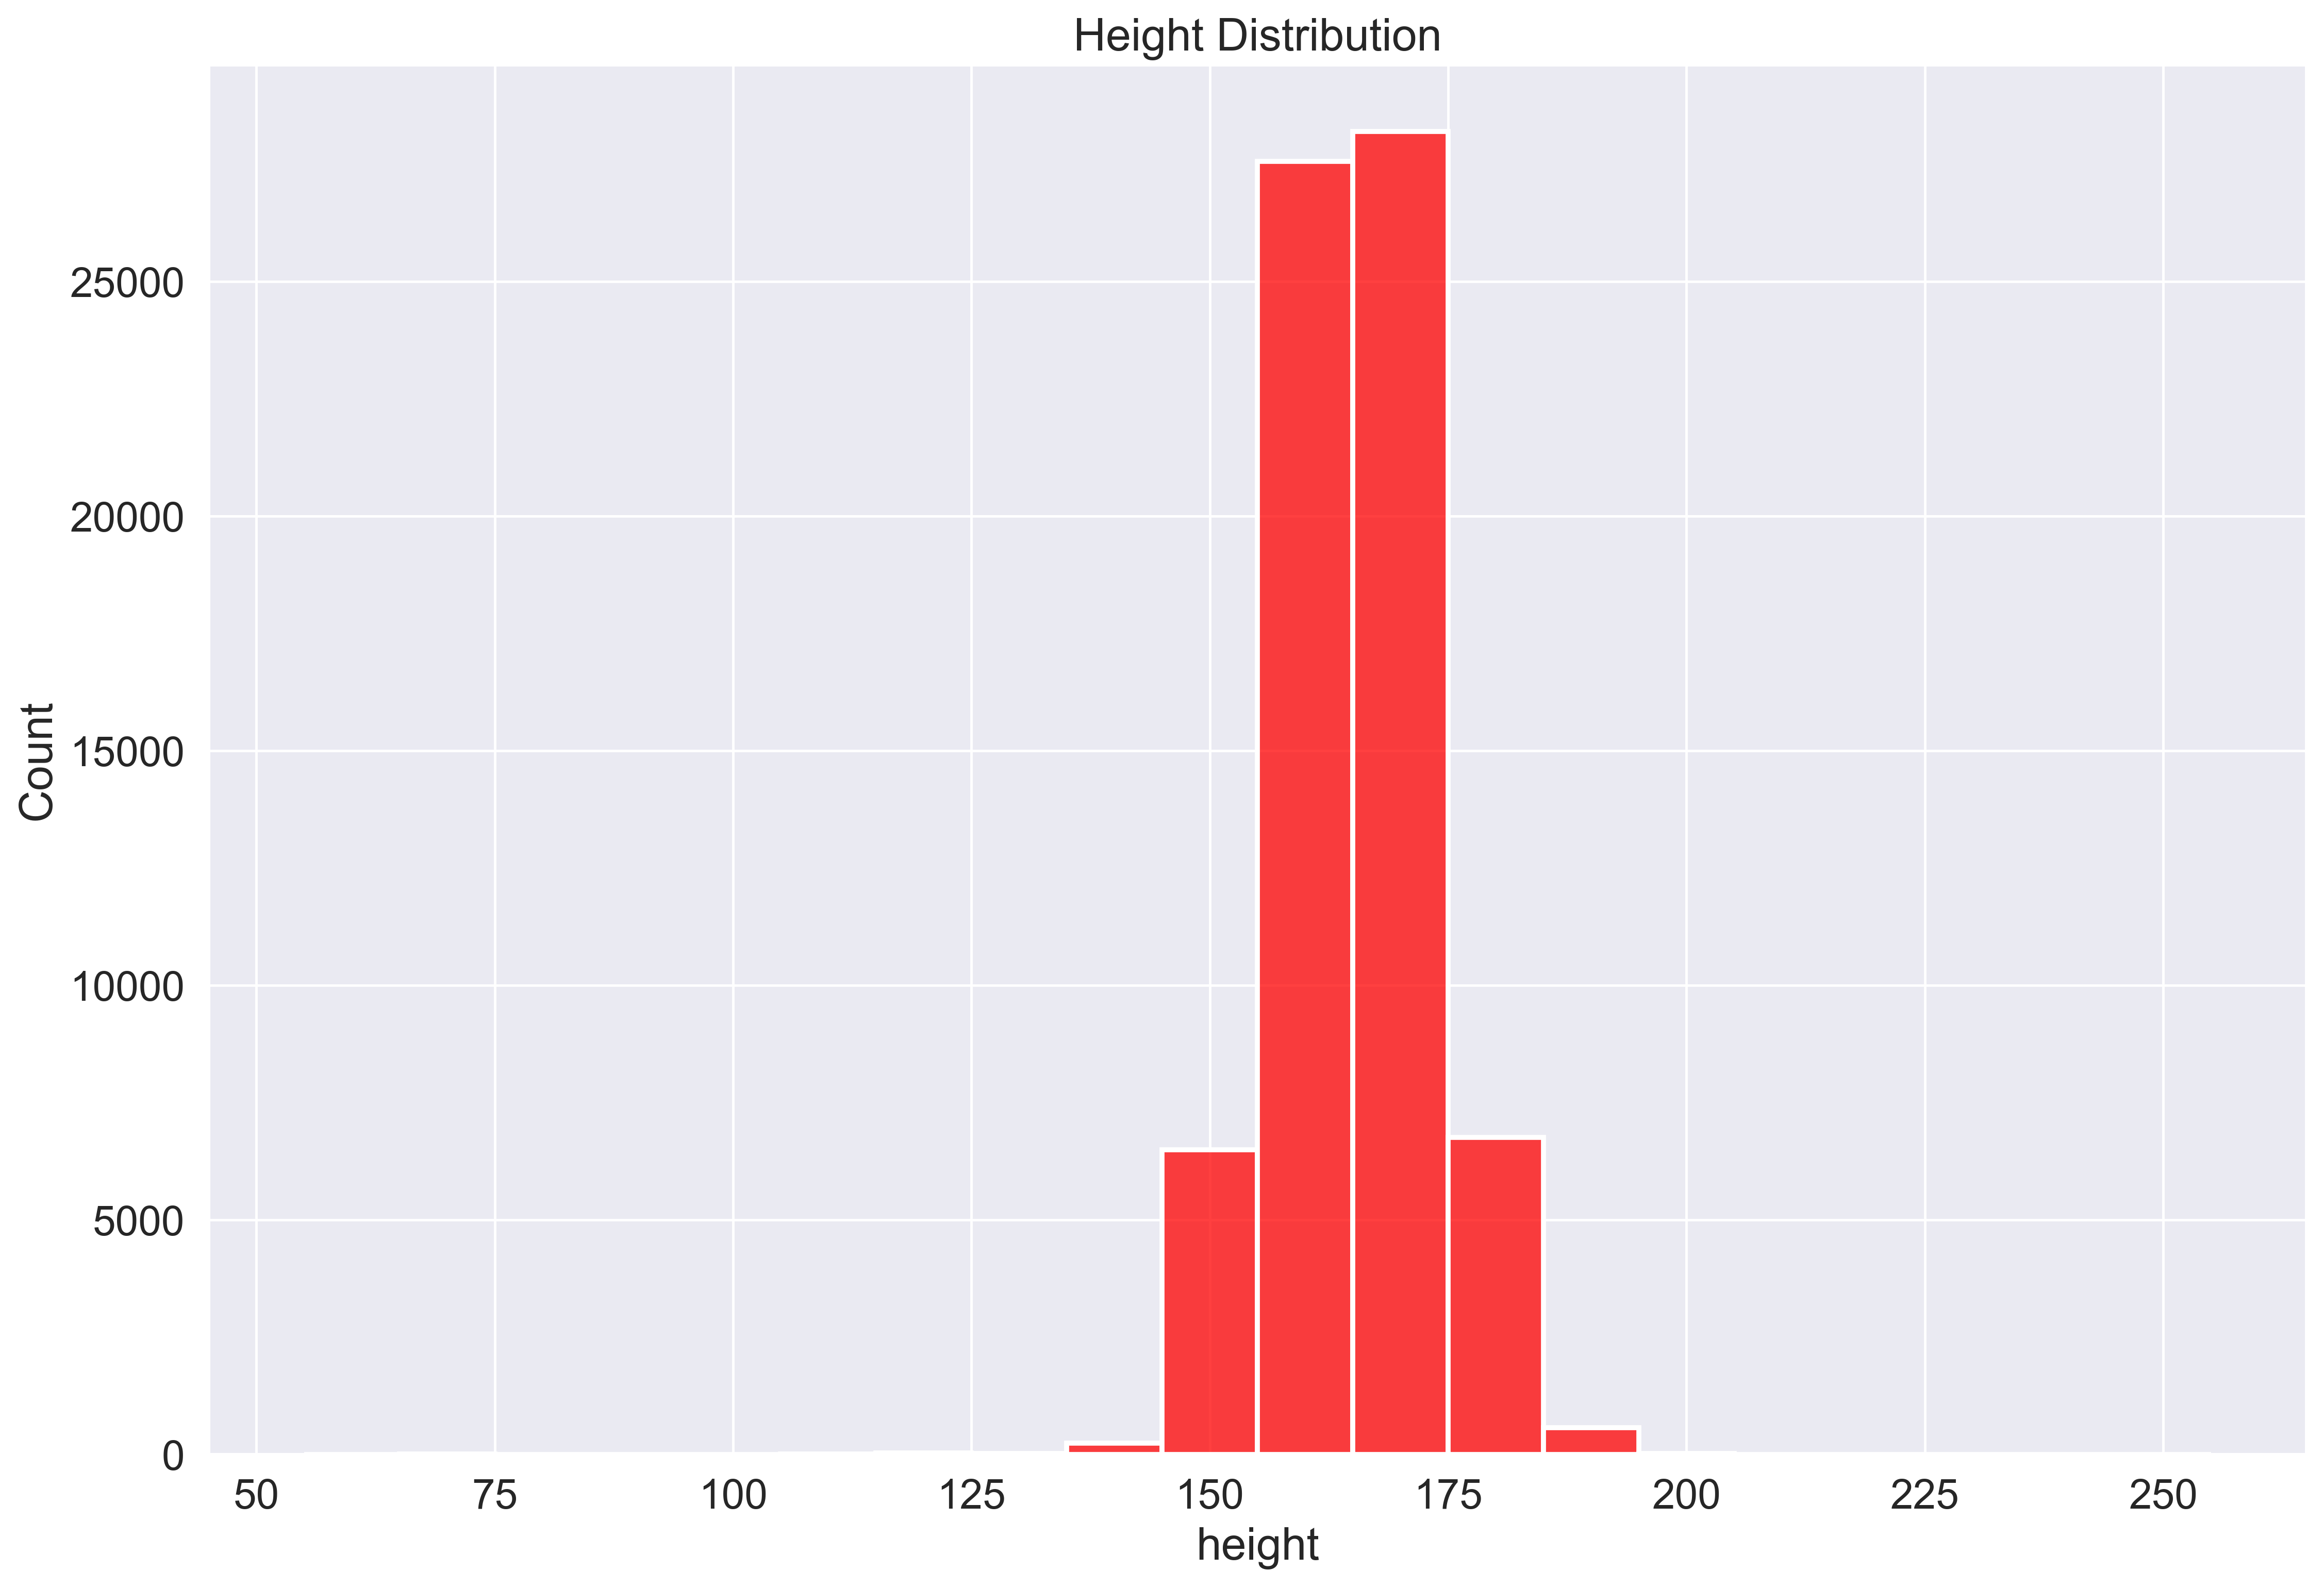

In [22]:
sns.set(style='darkgrid', font_scale=1.5)
plt.figure(figsize=(15,10), dpi = 350)
sns.histplot(data=df, x = 'height', linewidth = 2, color = 'red', binwidth= 10)
plt.title('Height Distribution')
plt.show()

__Outlier detection in Height column__

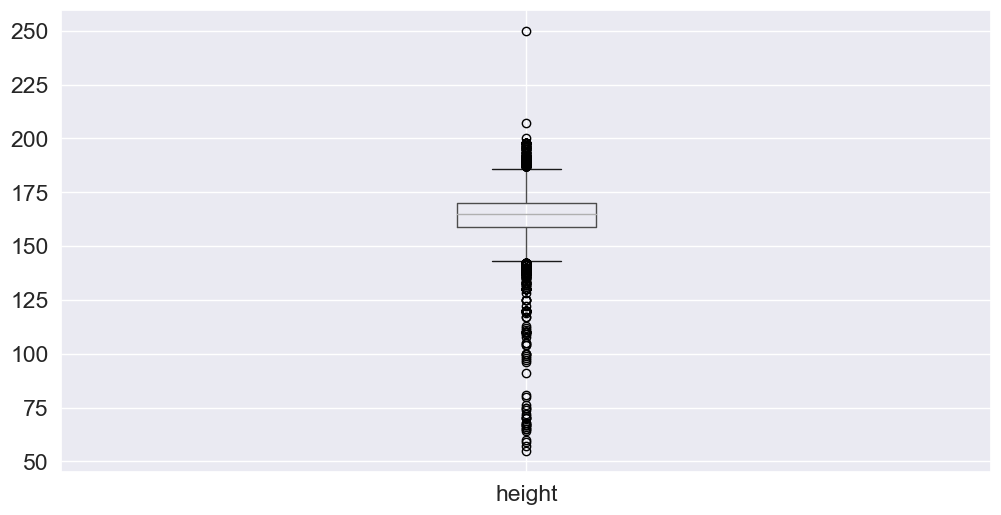

In [23]:
plt.figure(figsize = (12,6)) 
df.boxplot("height")
plt.show()

In [24]:
index_outliers = df.loc[df.height < 150].index
index_outliers

Int64Index([   65,   165,   183,   224,   234,   249,   271,   289,   360,
              382,
            ...
            69633, 69708, 69731, 69753, 69762, 69768, 69784, 69865, 69934,
            69938],
           dtype='int64', length=1537)

In [25]:
mean_height = df['height'].mean()
mean_height = round(mean_height)
mean_height

164

In [26]:
df.loc[df.height < 150] = df.loc[index_outliers, 'height'] = mean_height

In [27]:
index_outliers = df.loc[df.height > 180].index
index_outliers

Int64Index([   14,    62,    76,    94,   103,   137,   189,   193,   198,
              208,
            ...
            69772, 69781, 69785, 69788, 69873, 69887, 69913, 69975, 69981,
            69997],
           dtype='int64', length=1439)

In [28]:
df.loc[df.height > 180] = df.loc[index_outliers, 'height'] = mean_height

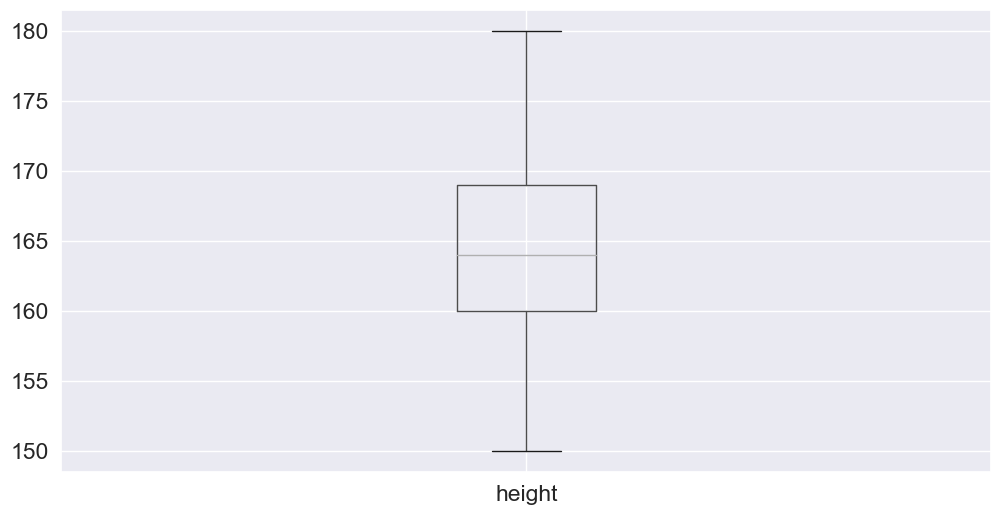

In [29]:
plt.figure(figsize = (12,6)) 
df.boxplot("height")
plt.show()

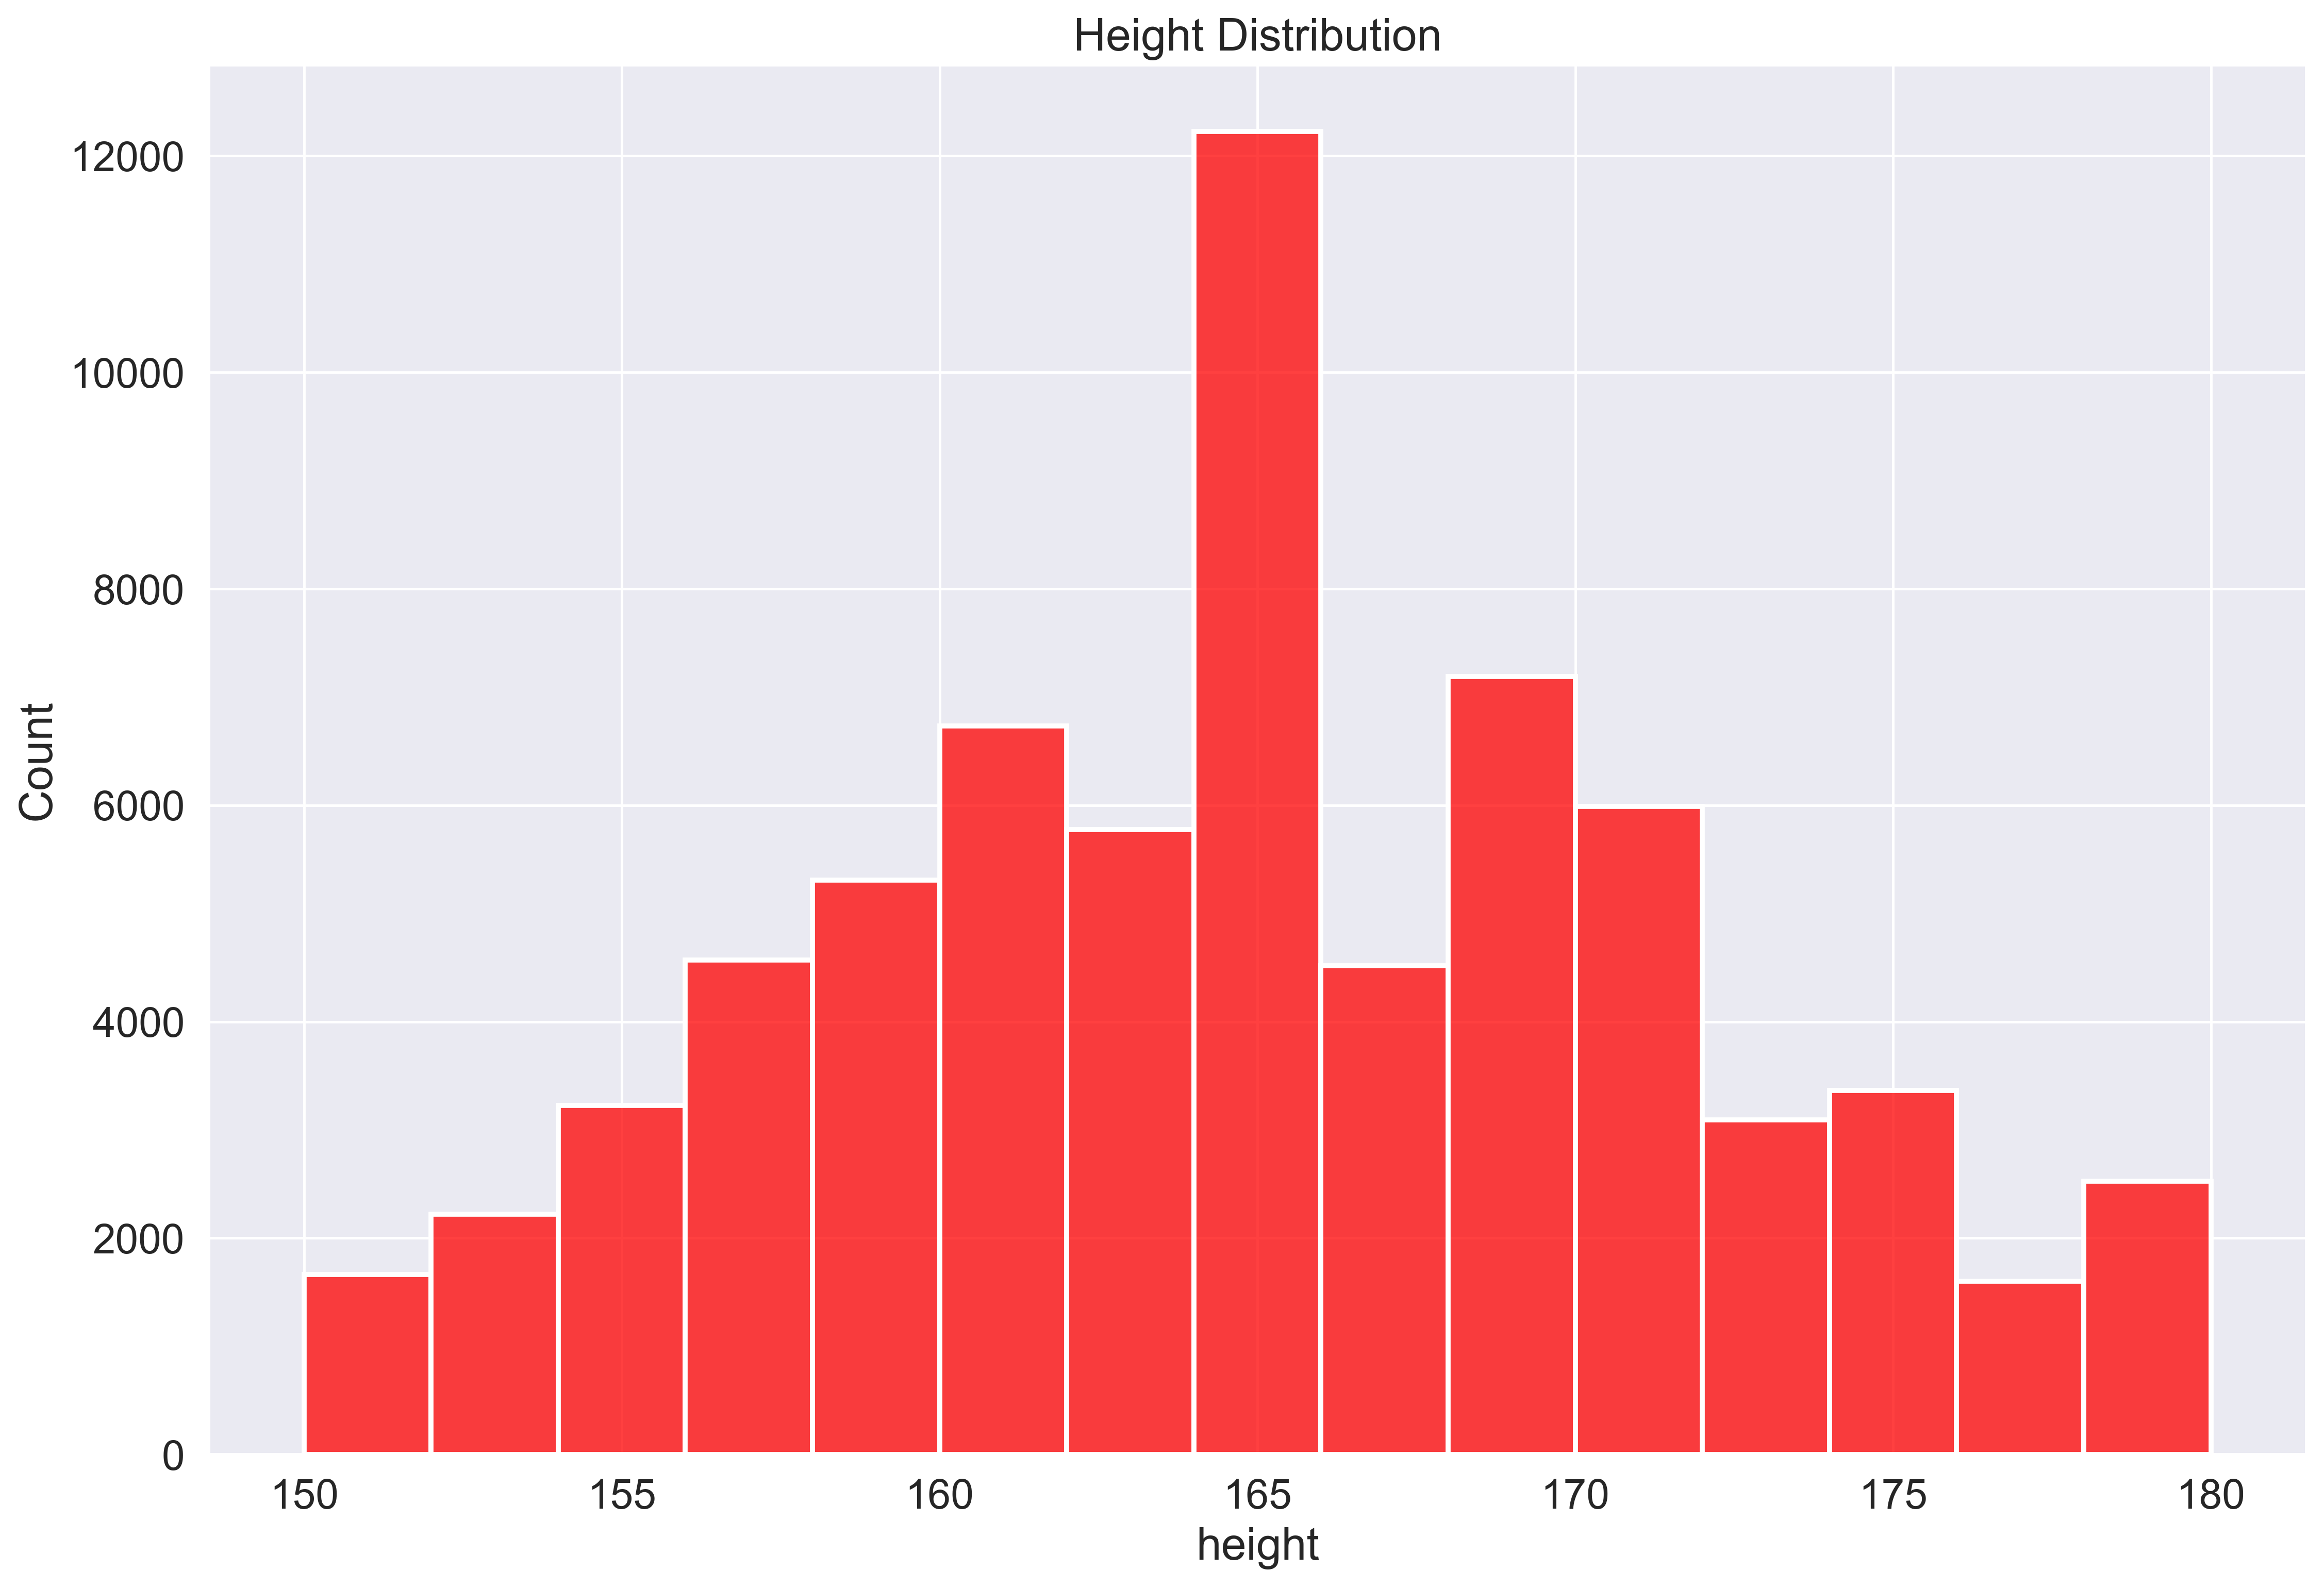

In [30]:
sns.set(style='darkgrid', font_scale=1.5)
plt.figure(figsize=(15,10), dpi = 350)
sns.histplot(data=df, x = 'height', linewidth = 2, color = 'red', binwidth= 2)
plt.title('Height Distribution')
plt.show()

__Outlier detection in Weight column__

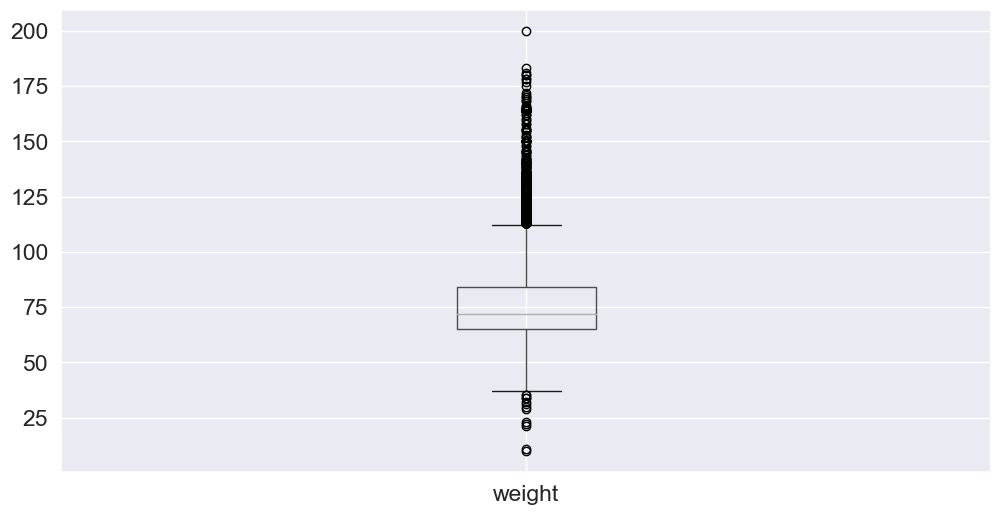

In [31]:
plt.figure(figsize = (12,6)) # boxplot
df.boxplot("weight")
plt.show()

In [32]:
index_outliers = df.loc[df.weight > 100].index
index_outliers

Int64Index([   14,    15,    30,    46,    62,    65,    76,    83,    91,
               94,
            ...
            69934, 69938, 69946, 69947, 69970, 69975, 69981, 69985, 69996,
            69997],
           dtype='int64', length=5902)

In [33]:
mean_weight = df['weight'].mean()
mean_weight = round(mean_weight)
mean_weight

78

In [34]:
df.loc[df.weight > 100] = df.loc[index_outliers, 'weight'] = mean_weight

In [35]:
index_outliers = df.loc[df.weight < 50].index
index_outliers

Int64Index([   23,    80,   107,   125,   266,   432,   626,   662,   895,
             1039,
            ...
            69697, 69733, 69734, 69797, 69851, 69879, 69908, 69912, 69919,
            69987],
           dtype='int64', length=800)

In [36]:
df.loc[df.weight < 50] = df.loc[index_outliers, 'weight'] = mean_weight

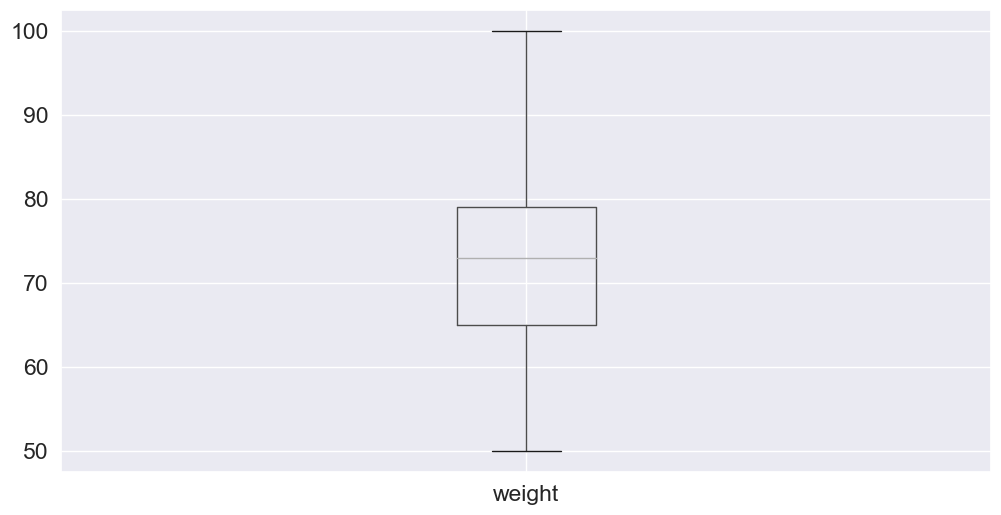

In [37]:
plt.figure(figsize = (12,6)) # boxplot
df.boxplot("weight")
plt.show()

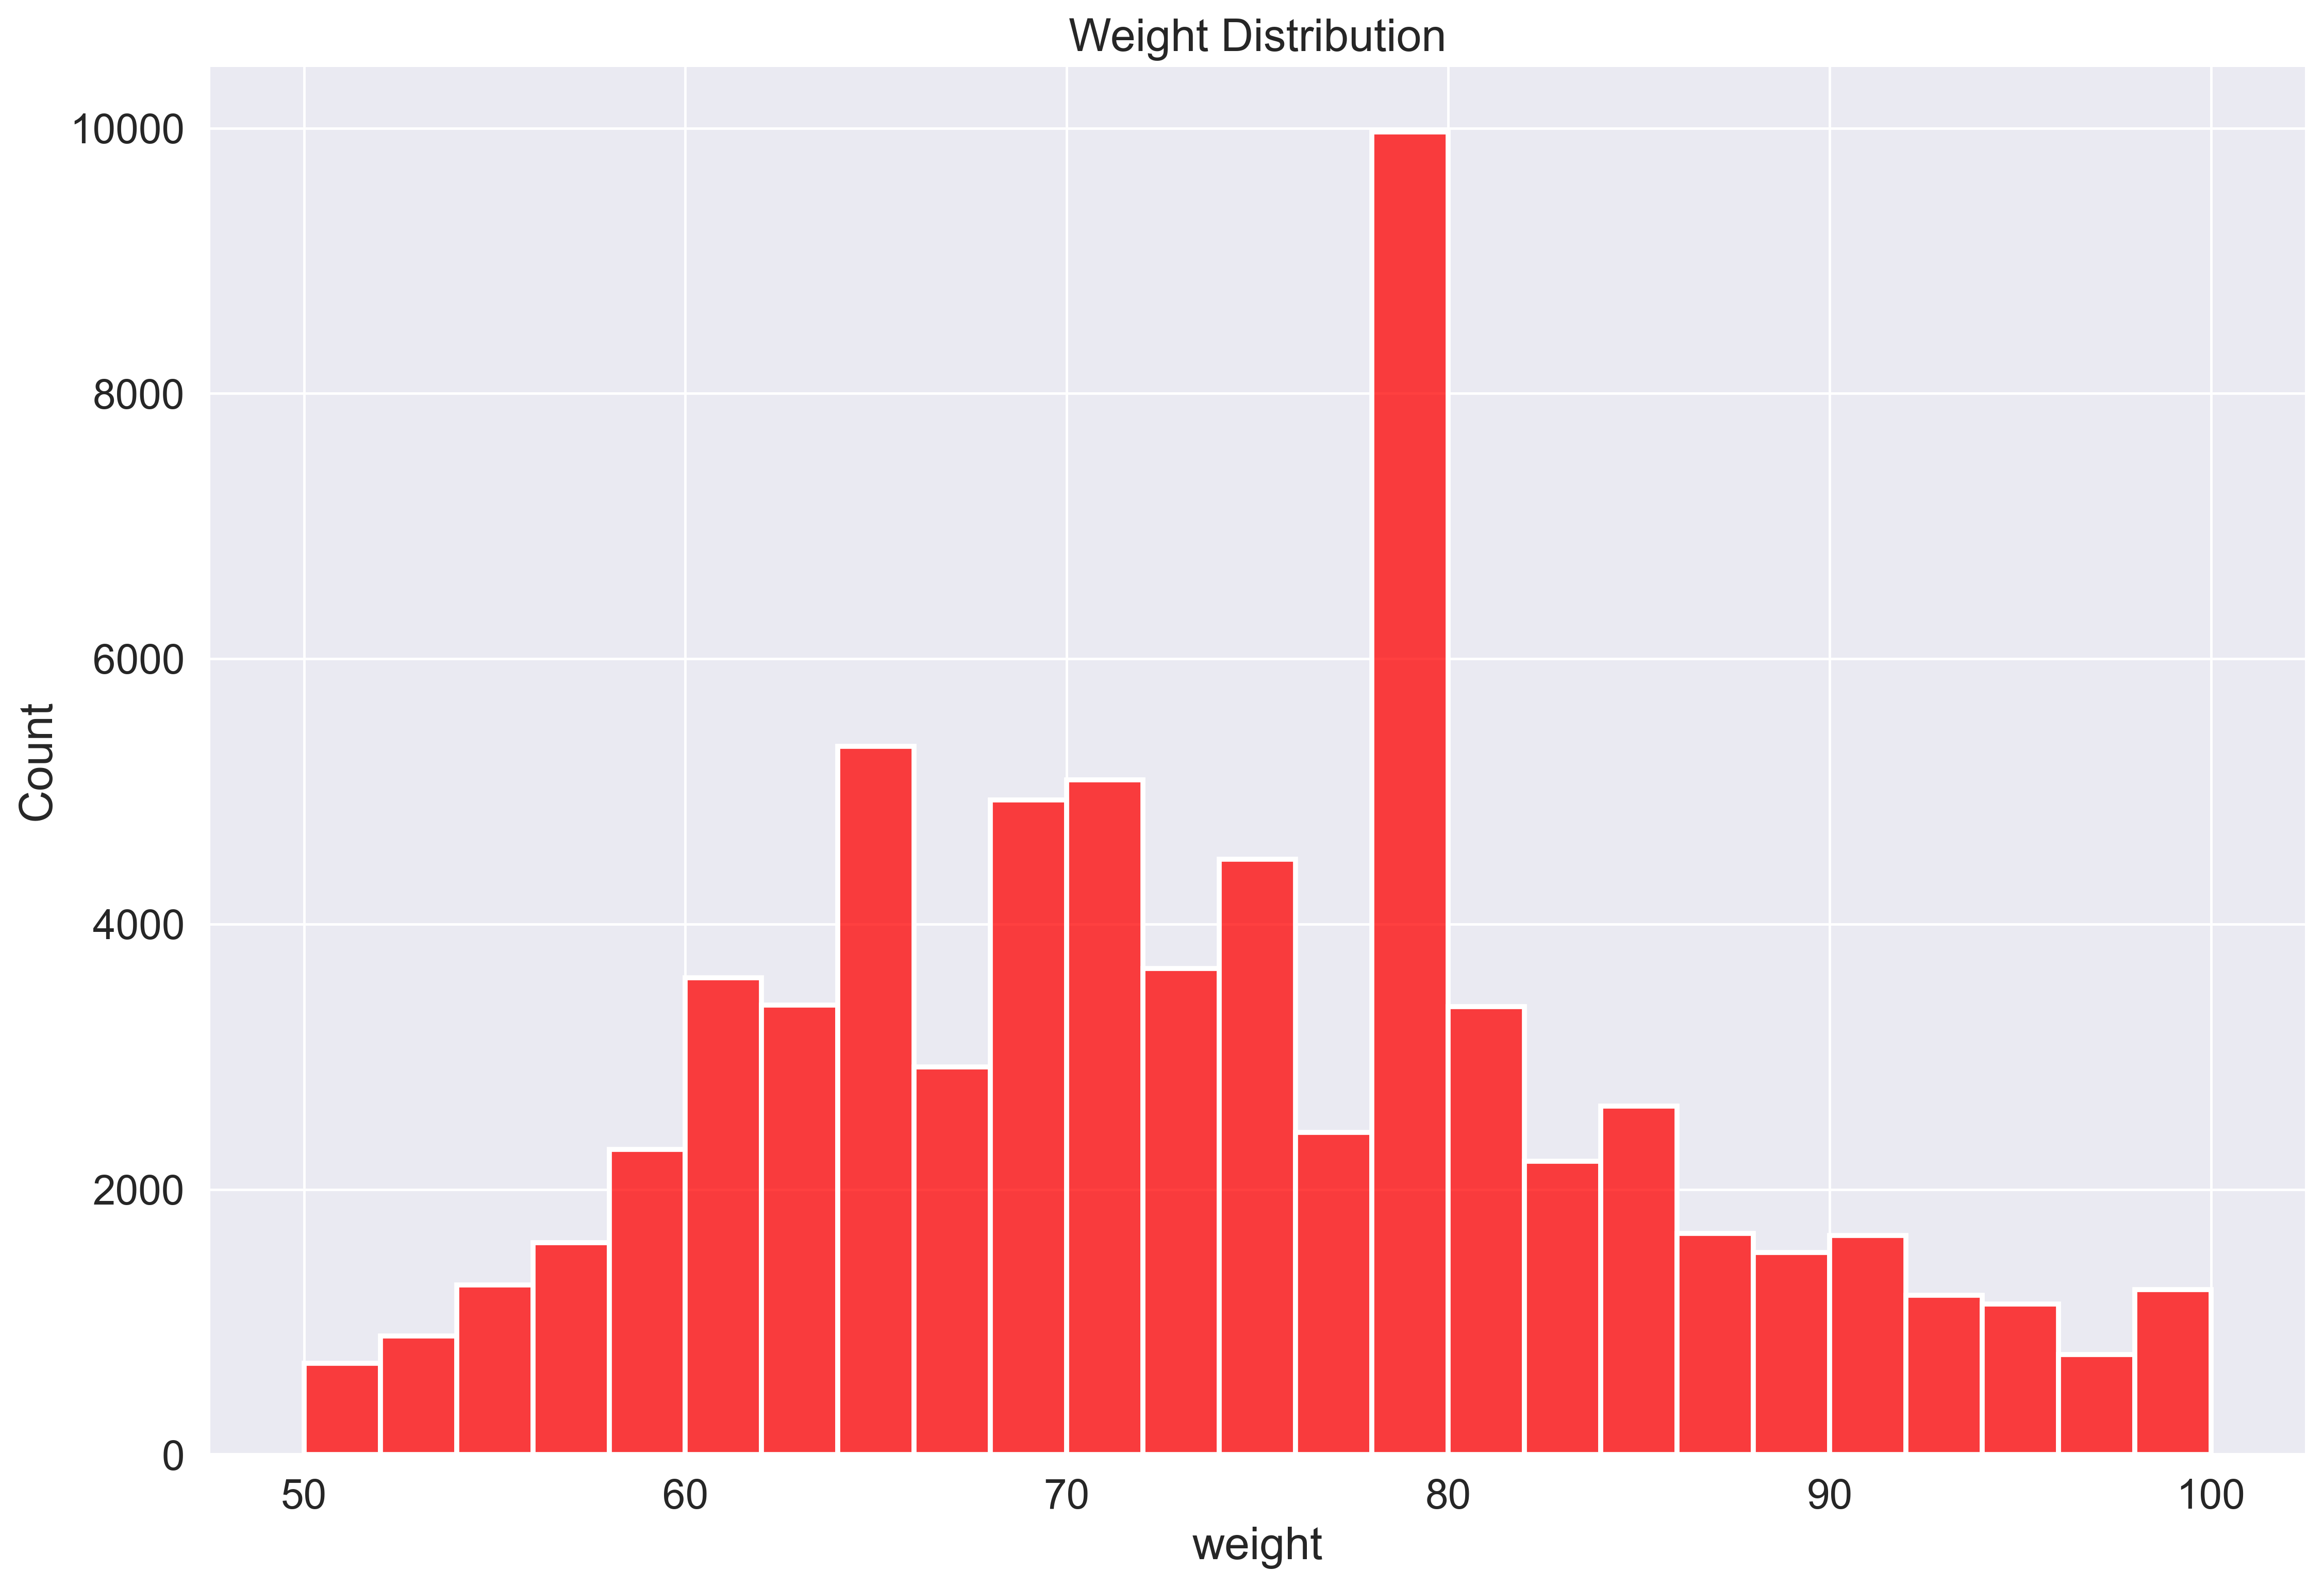

In [38]:
sns.set(style='darkgrid', font_scale=1.5)
plt.figure(figsize=(15,10), dpi = 350)
sns.histplot(data=df, x = 'weight', linewidth = 2, color = 'red', binwidth= 2)
plt.title('Weight Distribution')
plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69996 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69996 non-null  int64  
 1   age          69996 non-null  int64  
 2   gender       69996 non-null  int64  
 3   height       69996 non-null  int64  
 4   weight       69996 non-null  float64
 5   ap_hi        69996 non-null  int64  
 6   ap_lo        69996 non-null  int64  
 7   cholesterol  69996 non-null  int64  
 8   gluc         69996 non-null  int64  
 9   smoke        69996 non-null  int64  
 10  alco         69996 non-null  int64  
 11  active       69996 non-null  int64  
 12  cardio       69996 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 9.5 MB


In [40]:
df.describe()

id           age        gender        height        weight  \
count  69996.000000  69996.000000  69996.000000  69996.000000  69996.000000   
mean   45136.242014     55.242300      8.684139    156.110192     73.203704   
std    31090.076558      9.802627     22.560245     26.243227     10.780036   
min        0.000000     39.000000      1.000000     78.000000     50.000000   
25%    17041.750000     49.000000      1.000000    157.000000     65.000000   
50%    44571.500000     54.000000      1.000000    164.000000     73.000000   
75%    72148.250000     60.000000      2.000000    169.000000     79.000000   
max    99999.000000     78.000000     78.000000    180.000000    100.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  69996.000000  69996.000000  69996.000000  69996.000000  69996.000000   
mean     123.539917     67.949940      8.692240      8.570447      7.545831   
std      146.631585      8.456844     22.562094     22.599103     22.927674   
min     -140.000000     30.000000      1.000000      1.000000      0.000000   
25%      110.000000     60.000000      1.000000      1.000000      0.000000   
50%      120.000000     65.000000      1.000000      1.000000      0.000000   
75%      130.000000     75.000000      2.000000      1.000000      0.000000   
max    16020.000000    140.000000     78.000000     78.000000     78.000000   

               alco        active        cardio  
count  69996.000000  69996.000000  69996.000000  
mean       7.515472      8.195868      7.913609  
std       22.936982     22.717734     22.811407  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      1.000000  
75%        0.000000      1.000000      1.000000  
max       78.000000     78.000000     78.000000

__Apply value counts for Gender column for additional checking__

In [41]:
df.age.value_counts()

78    6702
55    3548
53    3476
57    3300
56    3295
54    3289
59    3207
58    3099
49    3083
51    3049
52    3003
50    2949
60    2911
63    2441
61    2406
62    1998
64    1982
47    1972
45    1874
43    1826
41    1700
48    1639
39    1596
46    1498
40    1465
44    1389
42    1299
Name: age, dtype: int64

In [42]:
df.gender.value_counts()

1     41489
2     21805
78     6702
Name: gender, dtype: int64

In [43]:
mask1 = df.gender == 78

In [44]:
df.loc[mask1]

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
14     78   78      78      78    78.0     78     78           78    78   
15     78   78      78      78    78.0     78     78           78    78   
23     78   78      78      78    78.0     78     78           78    78   
30     78   78      78      78    78.0     78     78           78    78   
46     78   78      78      78    78.0     78     78           78    78   
...    ..  ...     ...     ...     ...    ...    ...          ...   ...   
69981  78   78      78      78    78.0     78     78           78    78   
69985  78   78      78      78    78.0     78     78           78    78   
69987  78   78      78      78    78.0     78     78           78    78   
69996  78   78      78      78    78.0     78     78           78    78   
69997  78   78      78      78    78.0     78     78           78    78   

       smoke  alco  active  cardio  
14        78    78      78      78  
15        78    78      78      78  
23        78    78      78      78  
30        78    78      78      78  
46        78    78      78      78  
...      ...   ...     ...     ...  
69981     78    78      78      78  
69985     78    78      78      78  
69987     78    78      78      78  
69996     78    78      78      78  
69997     78    78      78      78  

[6702 rows x 13 columns]

__Remove all rows in dataframe with gender = 78__

In [45]:
df = df.loc[~mask1]
df

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69993  99991   53       1     172    70.0    130     80            1     1   
69994  99992   57       1     165    80.0    150     80            1     1   
69995  99993   52       2     168    76.0    120     80            1     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69993      0     0       1       1  
69994      0     0       1       1  
69995      1     0       1       0  
69998      0     0       0       1  
69999      0     0       1       0  

[63294 rows x 13 columns]

In [46]:
df.gender.value_counts()

1    41489
2    21805
Name: gender, dtype: int64

In [47]:
df.head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0    110     80            1     1      0   
1   1   55       1     156    85.0    140     90            3     1      0   
2   2   51       1     165    64.0    130     70            3     1      0   
3   3   48       2     169    82.0    150    100            1     1      0   
4   4   47       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

__Make ID column unique__

In [48]:
del df['id']

In [49]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [50]:
df.iloc[0]

age             50.0
gender           2.0
height         168.0
weight          62.0
ap_hi          110.0
ap_lo           80.0
cholesterol      1.0
gluc             1.0
smoke            0.0
alco             0.0
active           1.0
cardio           0.0
Name: 0, dtype: float64

In [51]:
df.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   51       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   47       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0

In [52]:
df.index.name = 'ID'

In [53]:
df.tail(10)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
ID                                                                           
69988   60       1     160    59.0    110     80            1     1      0   
69989   57       1     157    83.0    120     80            1     1      0   
69990   41       1     168    72.0    110     80            1     1      0   
69991   56       1     159    72.0    130     80            2     2      0   
69992   51       1     161    56.0    170     80            1     1      0   
69993   53       1     172    70.0    130     80            1     1      0   
69994   57       1     165    80.0    150     80            1     1      0   
69995   52       2     168    76.0    120     80            1     1      1   
69998   61       1     163    72.0    135     80            1     2      0   
69999   56       1     170    72.0    120     80            2     1      0   

       alco  active  cardio  
ID                           
69988     0       1       0  
69989     0       1       1  
69990     0       1       1  
69991     0       1       0  
69992     0       1       1  
69993     0       1       1  
69994     0       1       1  
69995     0       1       0  
69998     0       0       1  
69999     0       1       0

In [54]:
df.index.is_unique 

True

In [55]:
df.reset_index(inplace = True)

In [56]:
df.head()

ID  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0    110     80            1     1      0   
1   1   55       1     156    85.0    140     90            3     1      0   
2   2   51       1     165    64.0    130     70            3     1      0   
3   3   48       2     169    82.0    150    100            1     1      0   
4   4   47       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

__Apply value counts for columns for additional checking__

In [57]:
df.height.value_counts()

165    5674
160    4826
170    4483
168    4259
164    3211
158    3129
162    3102
169    2674
156    2600
167    2416
163    2366
172    1897
159    1879
166    1871
157    1715
175    1695
155    1661
161    1608
174    1443
154    1335
171    1221
178    1103
152    1066
176    1026
173     985
153     981
150     966
180     770
151     561
177     391
179     380
Name: height, dtype: int64

In [58]:
df.weight.value_counts(ascending = True)

79.94       1
60.60       1
68.30       1
66.40       1
53.60       1
         ... 
60.00    2643
75.00    2662
68.00    2771
70.00    3665
65.00    3782
Name: weight, Length: 167, dtype: int64

In [59]:
df.cholesterol.value_counts()

1    47919
2     8378
3     6997
Name: cholesterol, dtype: int64

In [60]:
df.smoke.value_counts()

0    57872
1     5422
Name: smoke, dtype: int64

In [61]:
df.gluc.value_counts()

1    54143
3     4696
2     4455
Name: gluc, dtype: int64

In [62]:
df.active.value_counts()

1    50922
0    12372
Name: active, dtype: int64

In [63]:
df.cardio.value_counts()

0    32129
1    31165
Name: cardio, dtype: int64

__Data Cleaning and Outlier Detection for Systolic and Diastolic blood pressure columns__

In [64]:
df.ap_hi.value_counts()

120     25891
140      8415
110      7950
130      7924
150      3873
        ...  
7           1
93          1
1130        1
909         1
2000        1
Name: ap_hi, Length: 150, dtype: int64

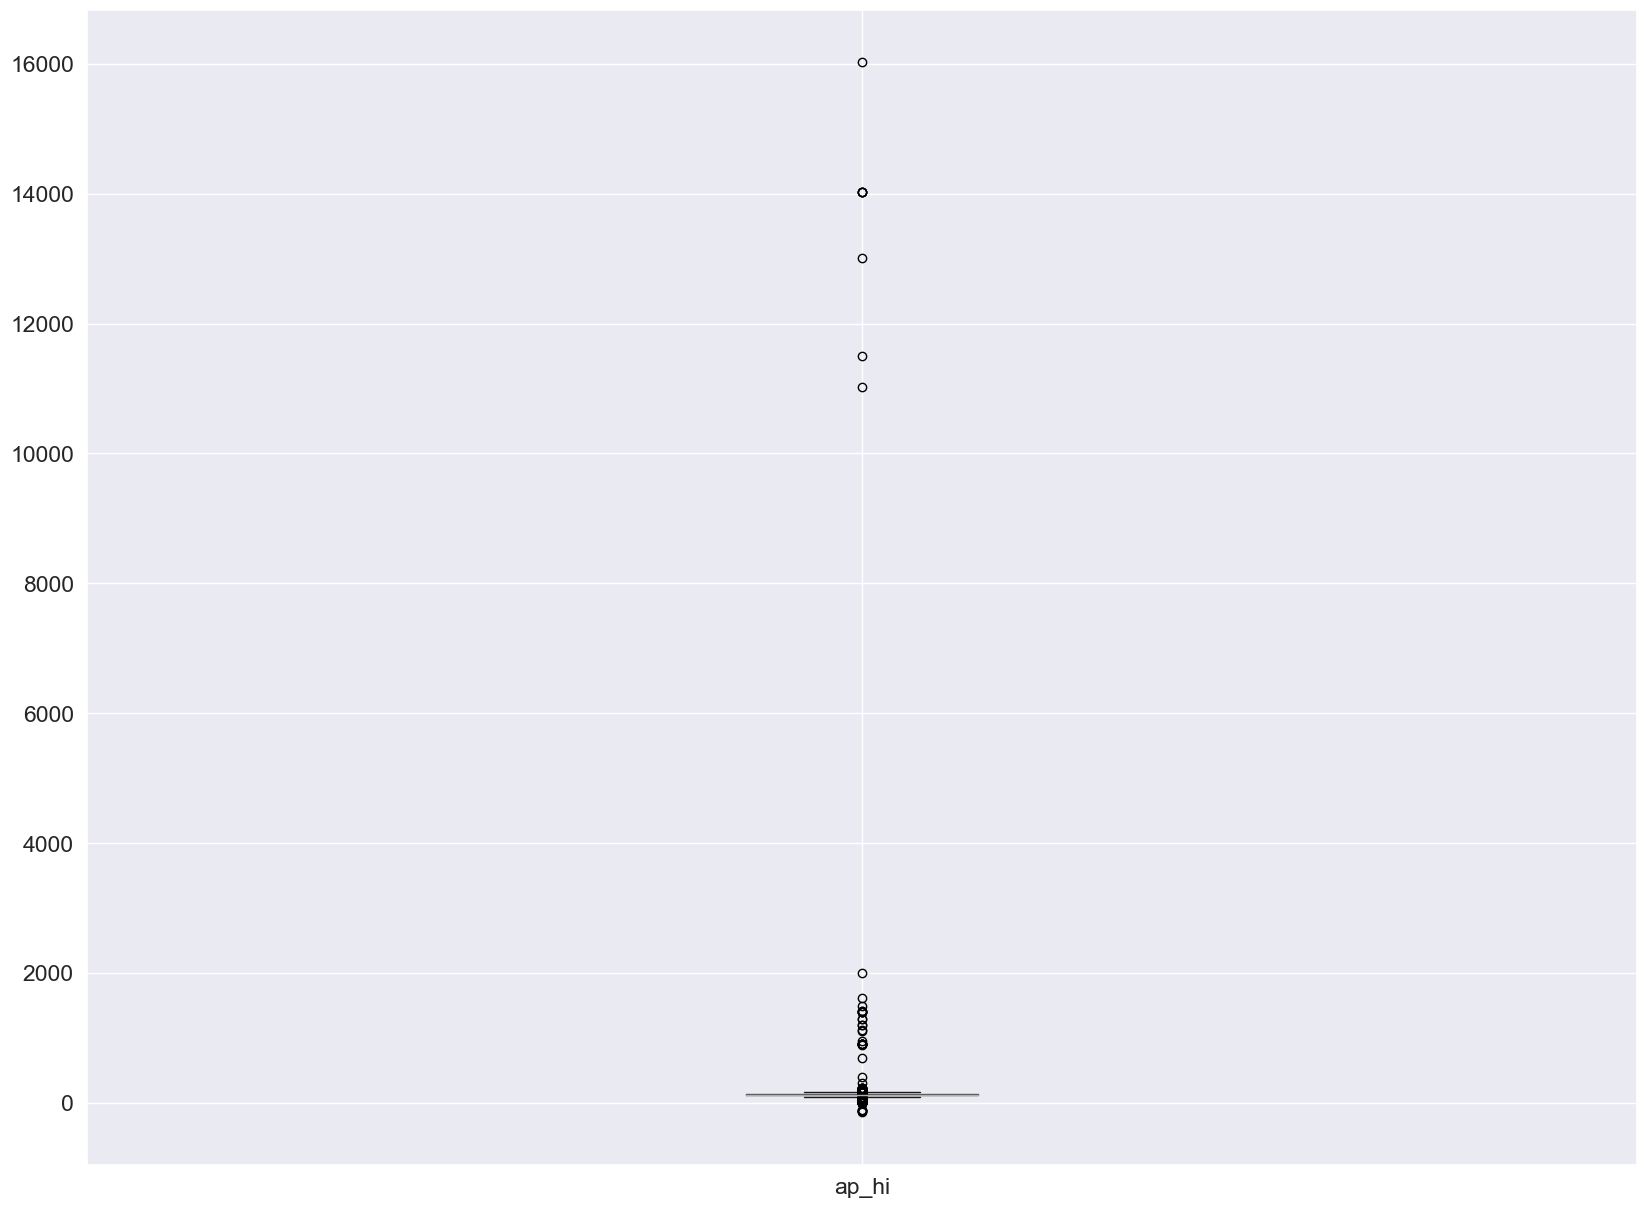

In [65]:
plt.figure(figsize = (20,15)) # boxplot
df.boxplot("ap_hi")
plt.show()

In [66]:
index_outliers = df.loc[df.ap_hi >= 1000].index

In [67]:
df.drop(index_outliers, inplace=True)

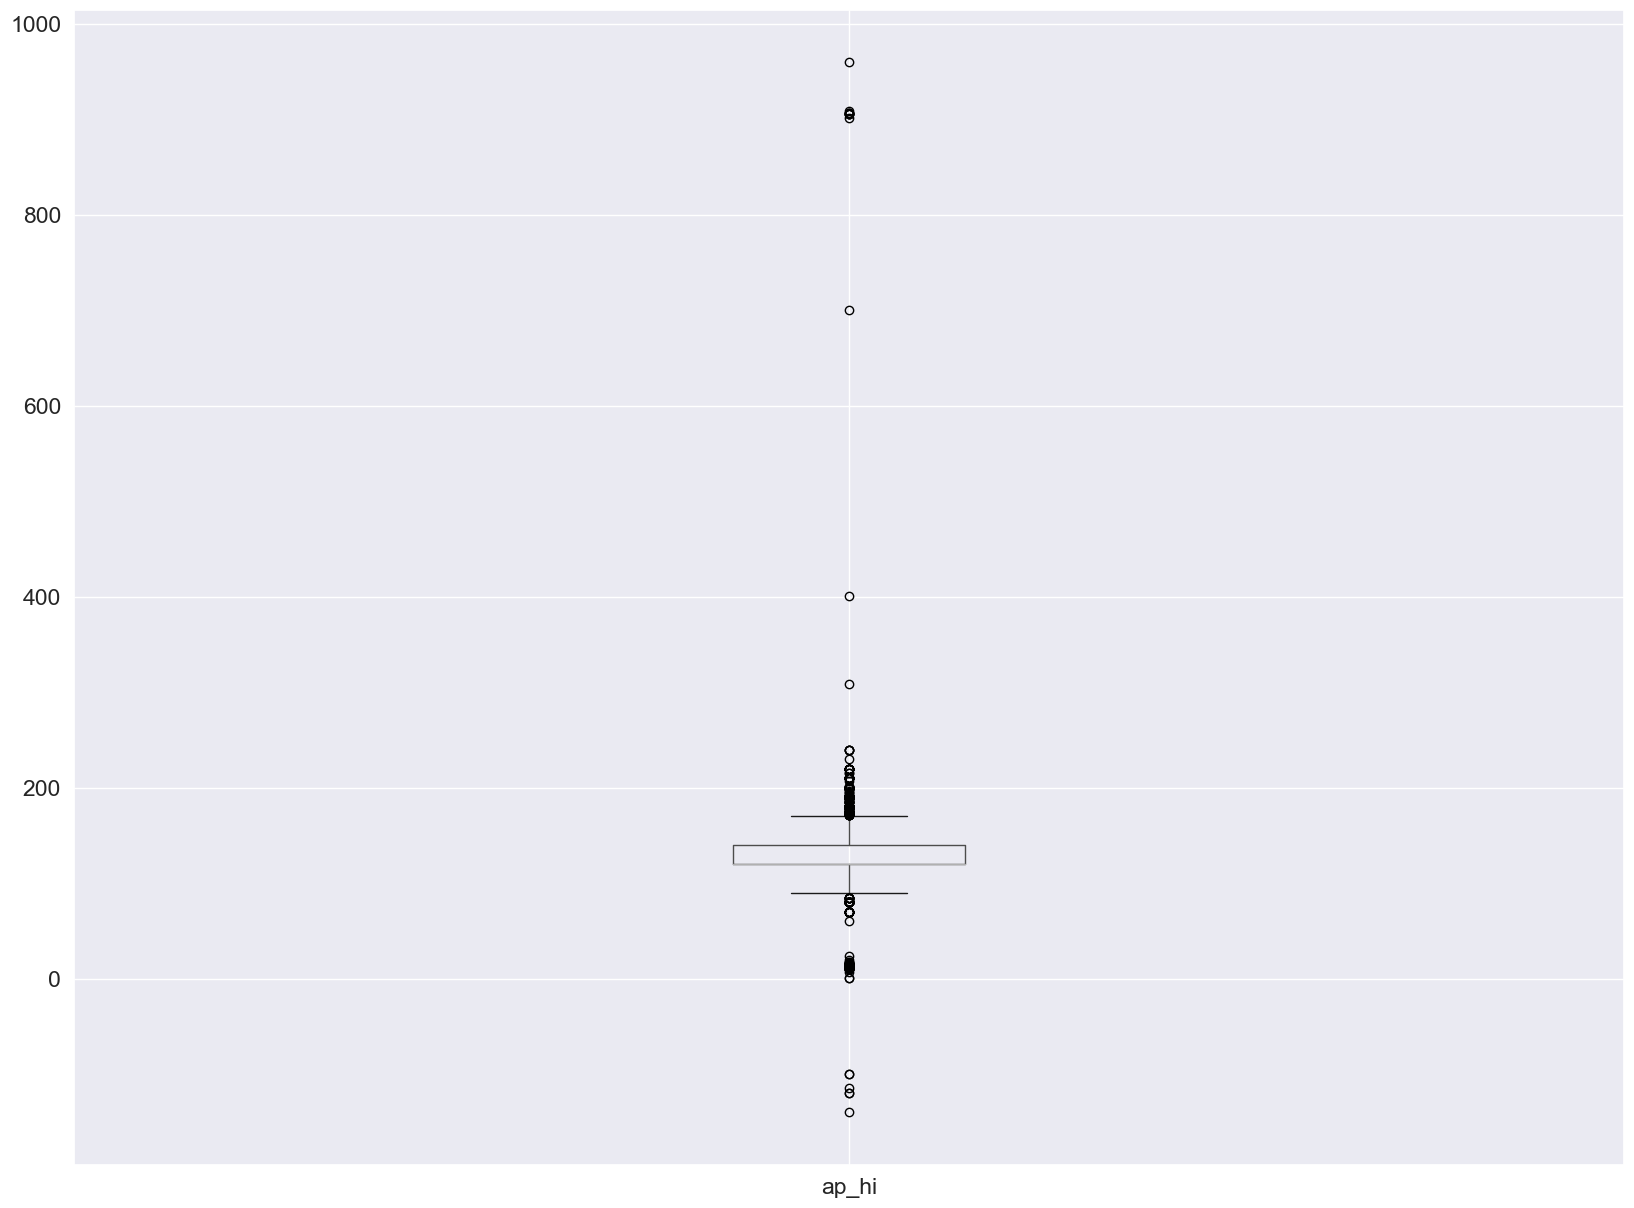

In [68]:
plt.figure(figsize = (20,15)) # boxplot
df.boxplot("ap_hi")
plt.show()

In [69]:
index_outliers = df.loc[df.ap_hi >= 700].index
index_outliers

Int64Index([1689, 1817, 4359, 8633, 16038, 21652, 26899, 28800, 38367, 48893,
            58705],
           dtype='int64')

In [70]:
 df.loc[index_outliers, 'ap_hi'] = df.loc[index_outliers, 'ap_hi']/10

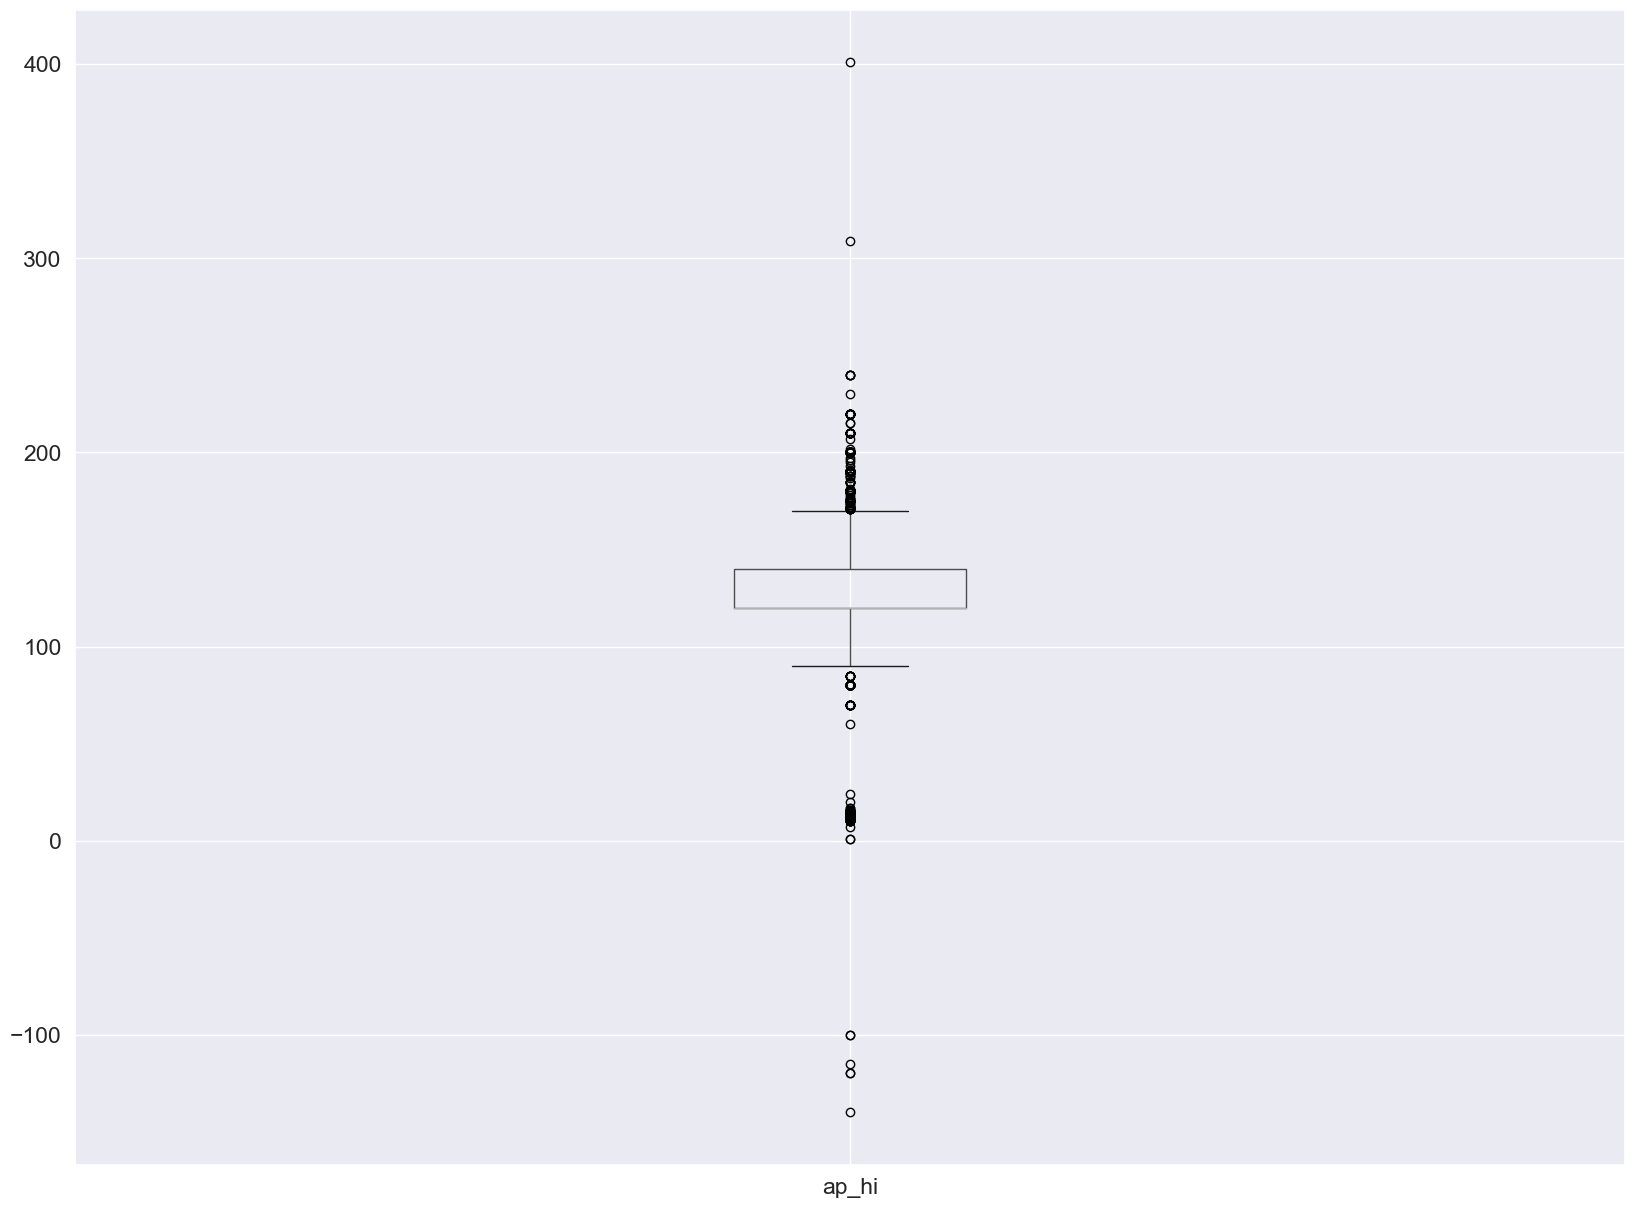

In [71]:
plt.figure(figsize = (20,15)) # boxplot
df.boxplot("ap_hi")
plt.show()

In [72]:
index_outliers = df.loc[df.ap_hi >= 300].index
index_outliers

Int64Index([36508, 36974], dtype='int64')

In [73]:
df.drop(index_outliers, inplace=True)

In [74]:
df.ap_hi.sort_values(ascending = False)

61221    240.0
29504    240.0
26887    240.0
38670    240.0
40548    230.0
         ...  
4163    -100.0
14504   -115.0
22903   -120.0
42217   -120.0
21766   -140.0
Name: ap_hi, Length: 63269, dtype: float64

In [75]:
index_outliers = df.loc[df.ap_hi < 75].index
index_outliers

Int64Index([  499,   829,   879,  1436,  1460,  1590,  1953,  2187,  2273,
             2349,
            ...
            60689, 60899, 61170, 61437, 61905, 62067, 62169, 62394, 62520,
            62897],
           dtype='int64', length=184)

In [76]:
df.drop(index_outliers, inplace=True)

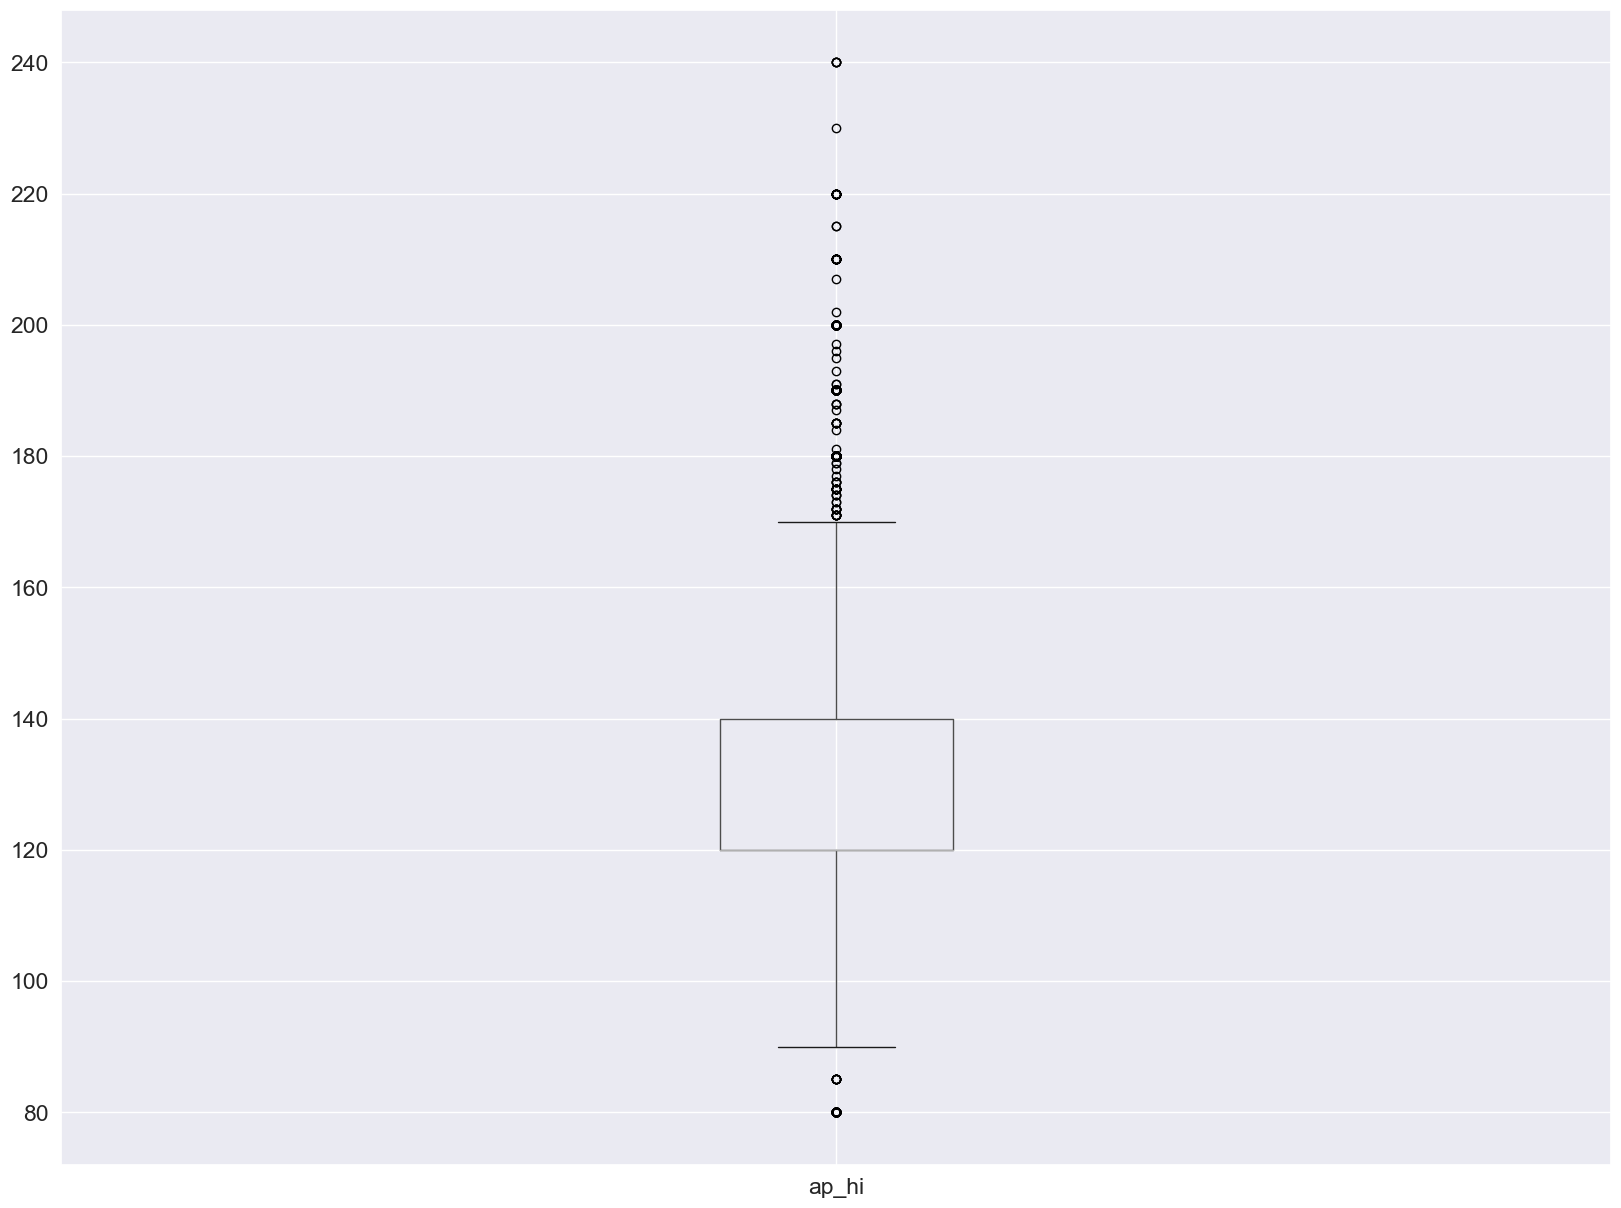

In [77]:
plt.figure(figsize = (20,15)) # boxplot
df.boxplot("ap_hi")
plt.show()

 __Cheking the values of Diastolic Blood Pressure for the remains outliers__

In [78]:
index_outliers = df.loc[df.ap_hi > 160].index
index_outliers

Int64Index([   40,    54,    56,    89,   101,   150,   203,   257,   260,
              292,
            ...
            62934, 63071, 63122, 63145, 63196, 63204, 63215, 63234, 63250,
            63288],
           dtype='int64', length=1501)

In [79]:
df.loc[index_outliers]

ID  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
40        44   54       1     154    50.0  170.0     80            3     1   
54        59   55       1     164    64.0  180.0     90            1     1   
56        61   57       2     165    75.0  180.0     90            3     1   
89       101   51       1     167    80.0  190.0     90            2     1   
101      115   60       2     160    57.0  170.0    110            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
63204  69894   46       1     160    70.0  200.0     80            1     2   
63215  69905   51       2     175    92.0  170.0     80            1     1   
63234  69929   54       1     164    85.0  165.0     80            3     3   
63250  69949   60       1     167    68.0  167.0     80            3     1   
63288  69992   51       1     161    56.0  170.0     80            1     1   

       smoke  alco  active  cardio  
40         0     0       1       1  
54         1     0       1       1  
56         0     0       1       1  
89         0     1       0       0  
101        0     0       1       1  
...      ...   ...     ...     ...  
63204      0     0       1       1  
63215      0     0       1       0  
63234      0     0       1       1  
63250      0     0       1       1  
63288      0     0       1       1  

[1501 rows x 13 columns]

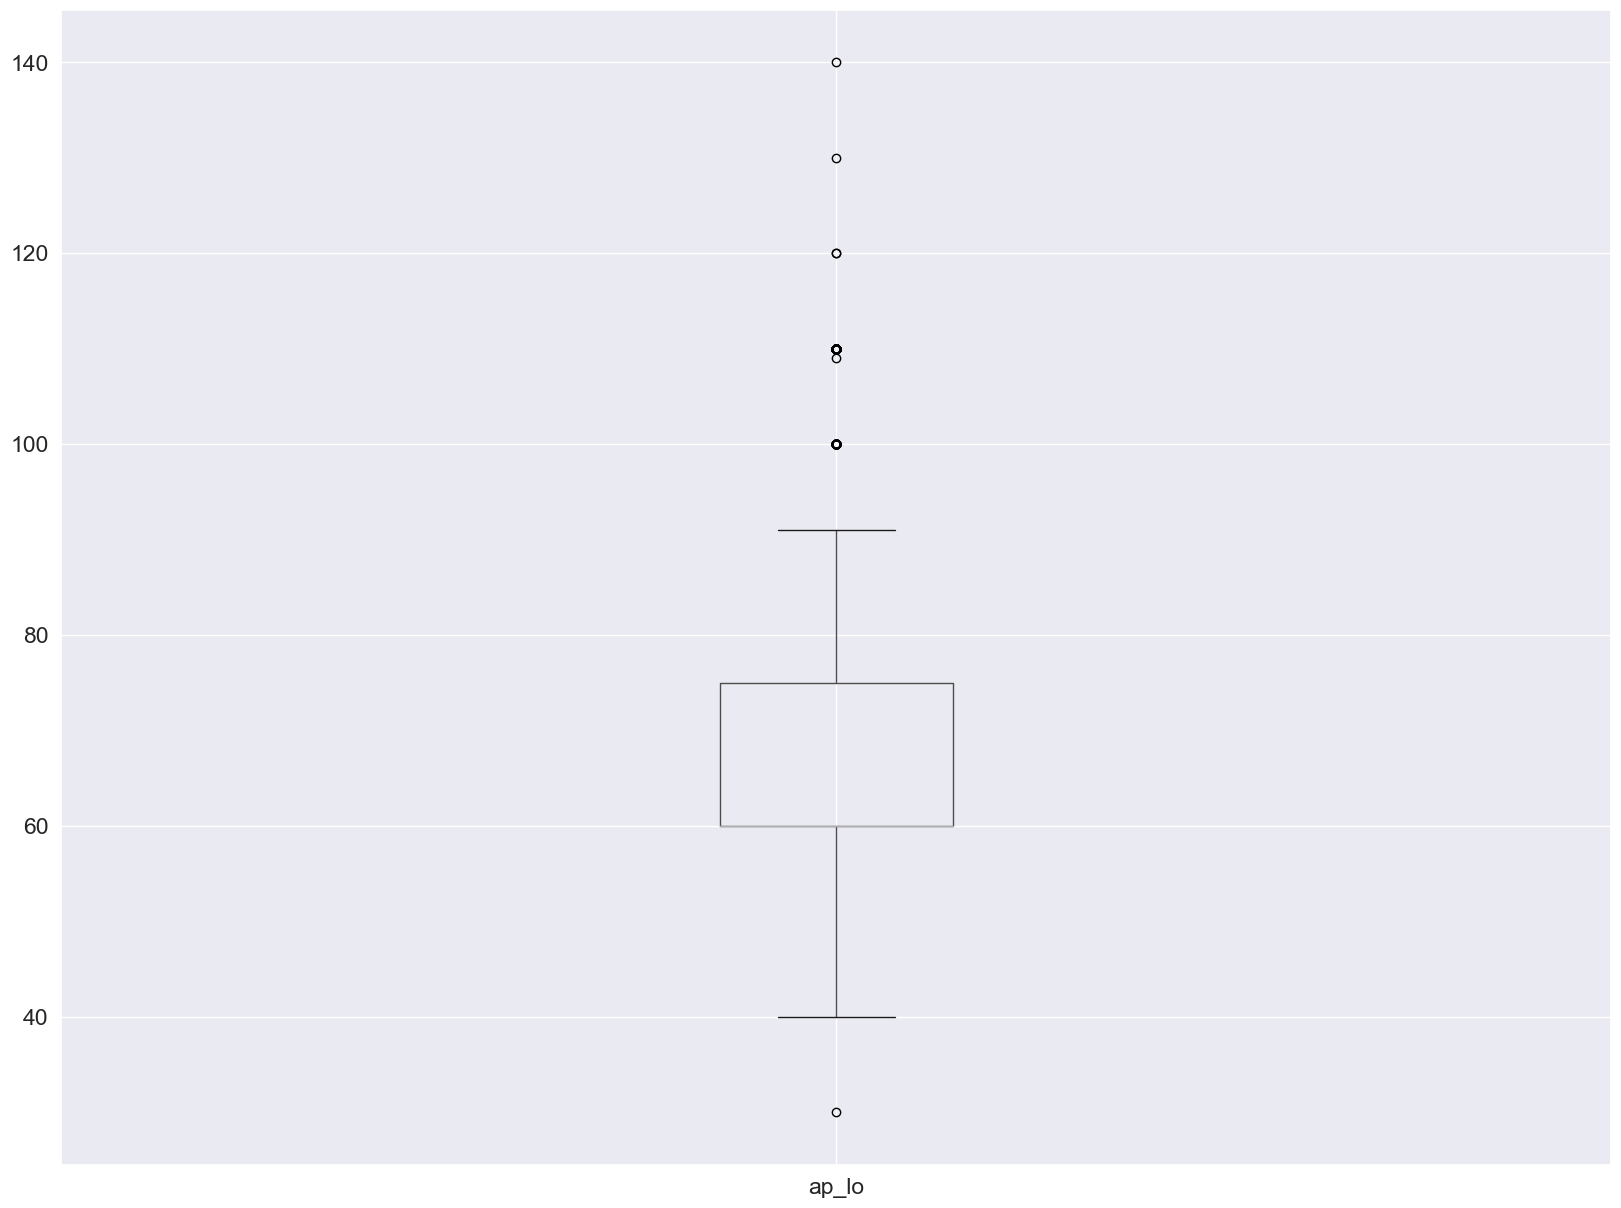

In [80]:
plt.figure(figsize = (20,15)) # boxplot
df.boxplot("ap_lo")
plt.show()

In [81]:
index_outliers = df.loc[df.ap_lo < 40].index
index_outliers

Int64Index([368], dtype='int64')

In [82]:
df.drop(index_outliers, inplace=True)

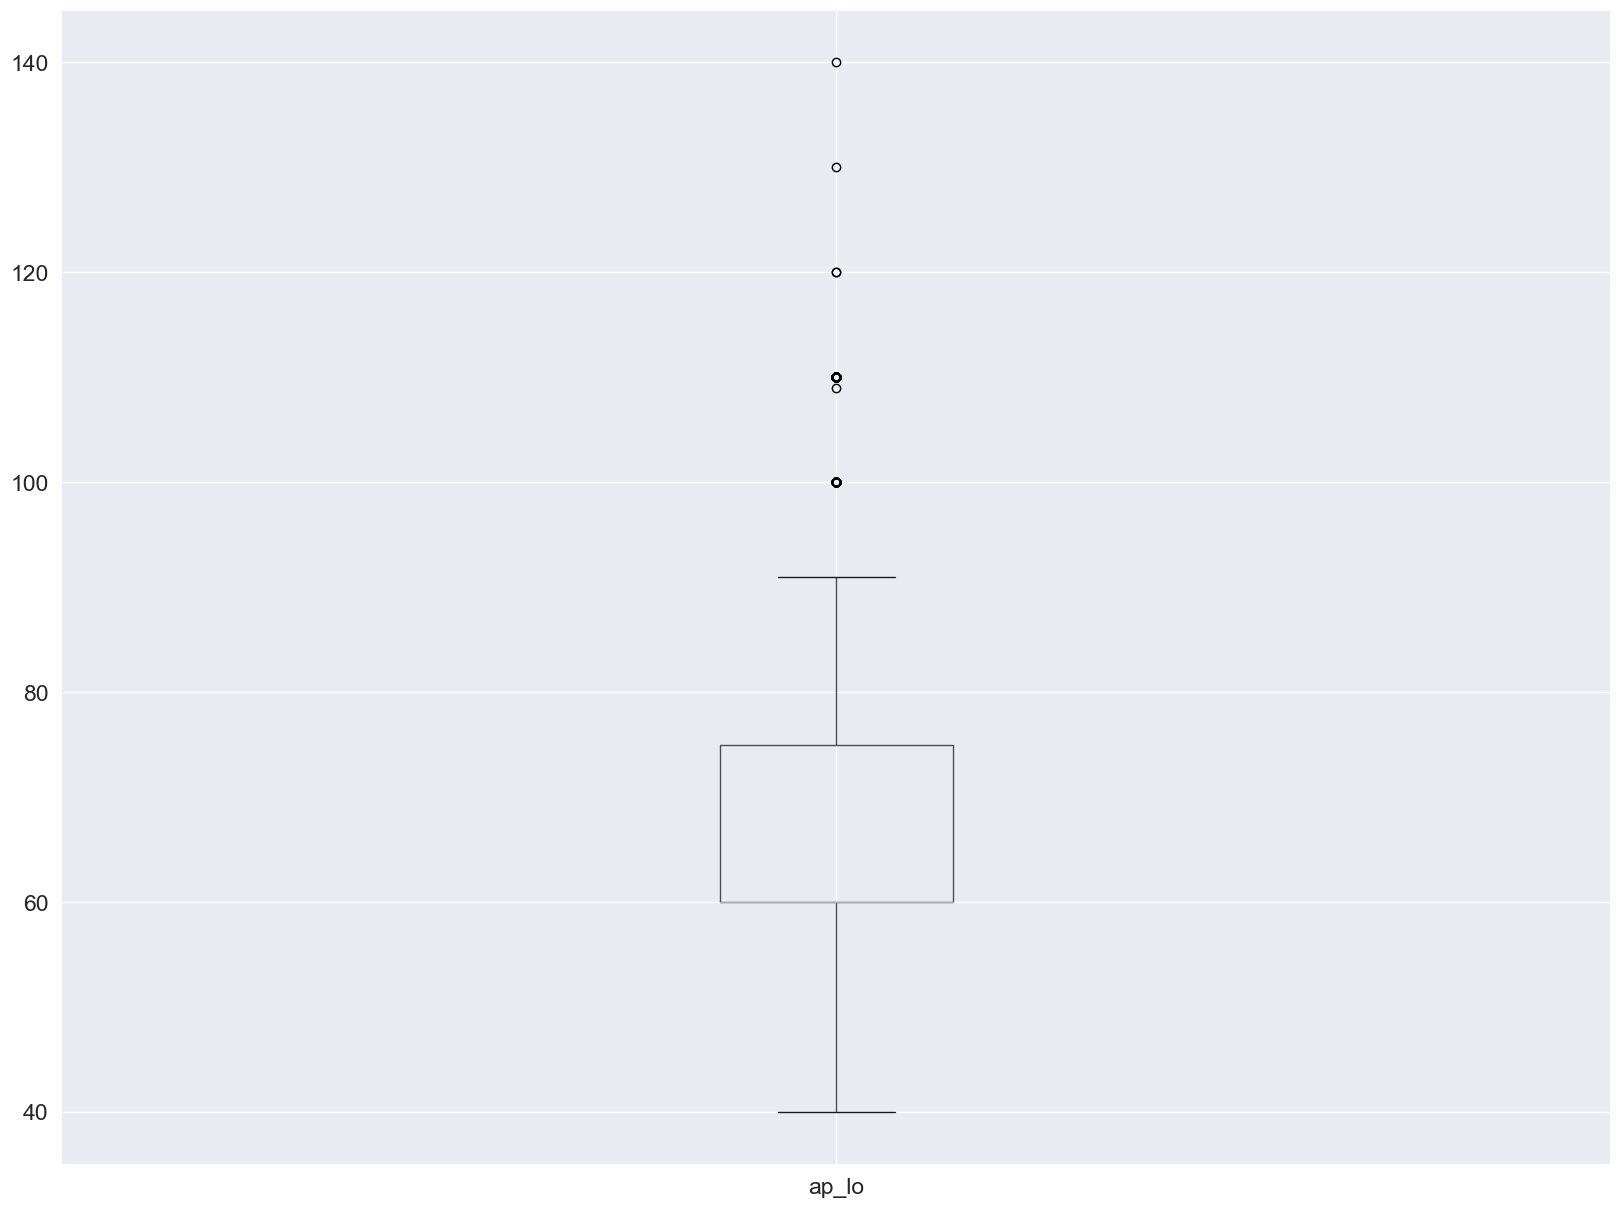

In [83]:
plt.figure(figsize = (20,15)) # boxplot
df.boxplot("ap_lo")
plt.show()

-----------------------------------------------------------------------------------


# Data Analysis

## Correlation Analysis

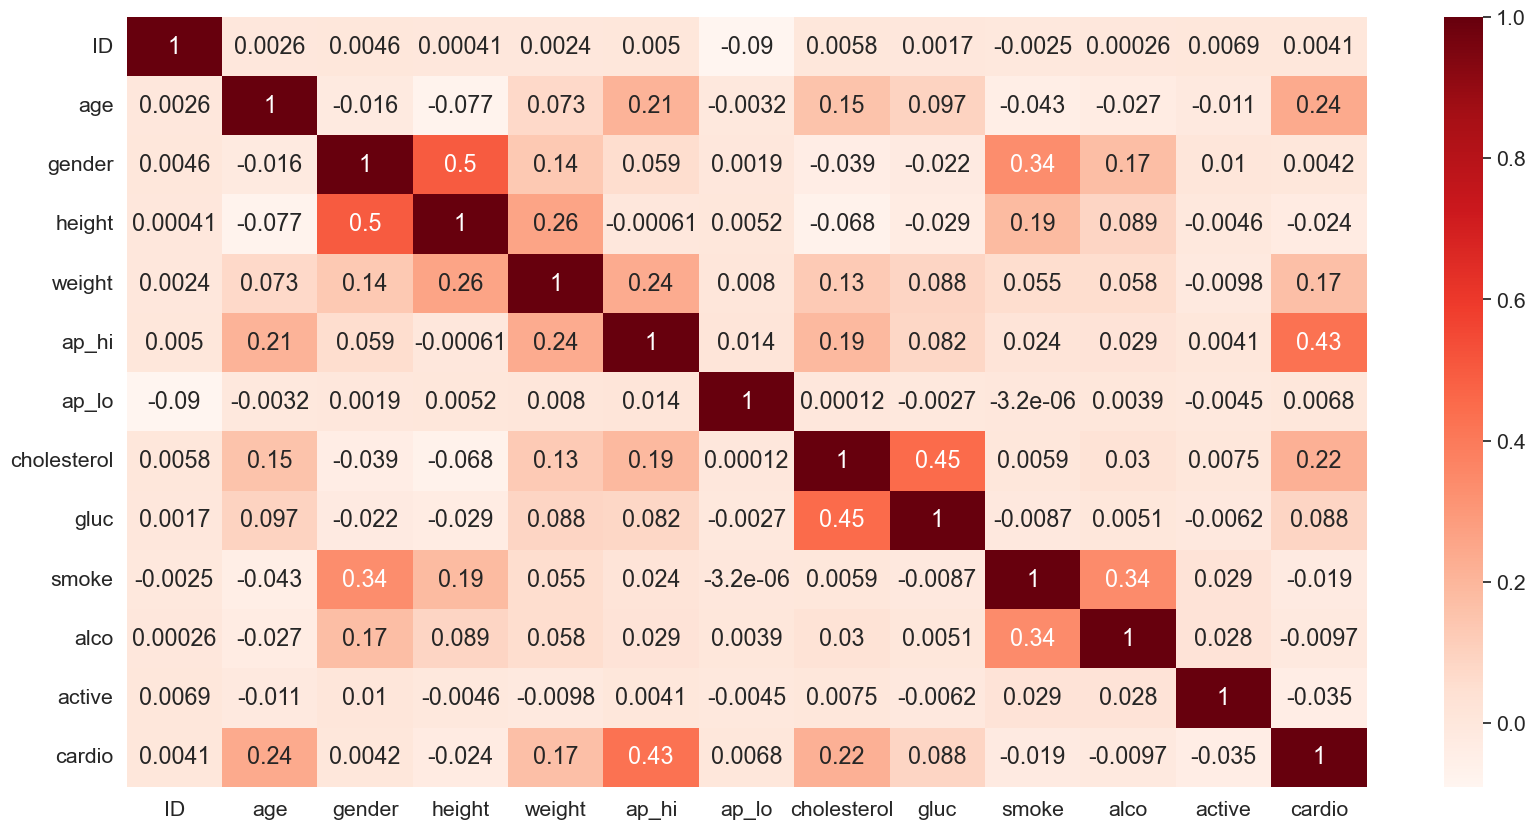

In [84]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot= True, cmap = "Reds")
plt.show()

__There is a strong positive correlation between: <br> 1.Height and Gender --> r = 0.5 <br> 2.Systolic blood pressure and Presence or Absence of cardiovascular disease --> r = 0.43 <br> 3.Cholesterol Level and Glucose Level --> r = 0.45 <br>__

__The Alcohol consumption correlates with smoking --> r = 0.34__

__For our dataset the Active status is not significant about Cholesterol levels, Glucose levels and about Presence ot Absence of cardiovascular disease.__

-----------------------------------------------------------------------------------

## Create a Scatterplot of the Height and Weight grouped by Gender

<Axes: title={'center': 'Height and Weight by Gender'}, xlabel='height', ylabel='weight'>

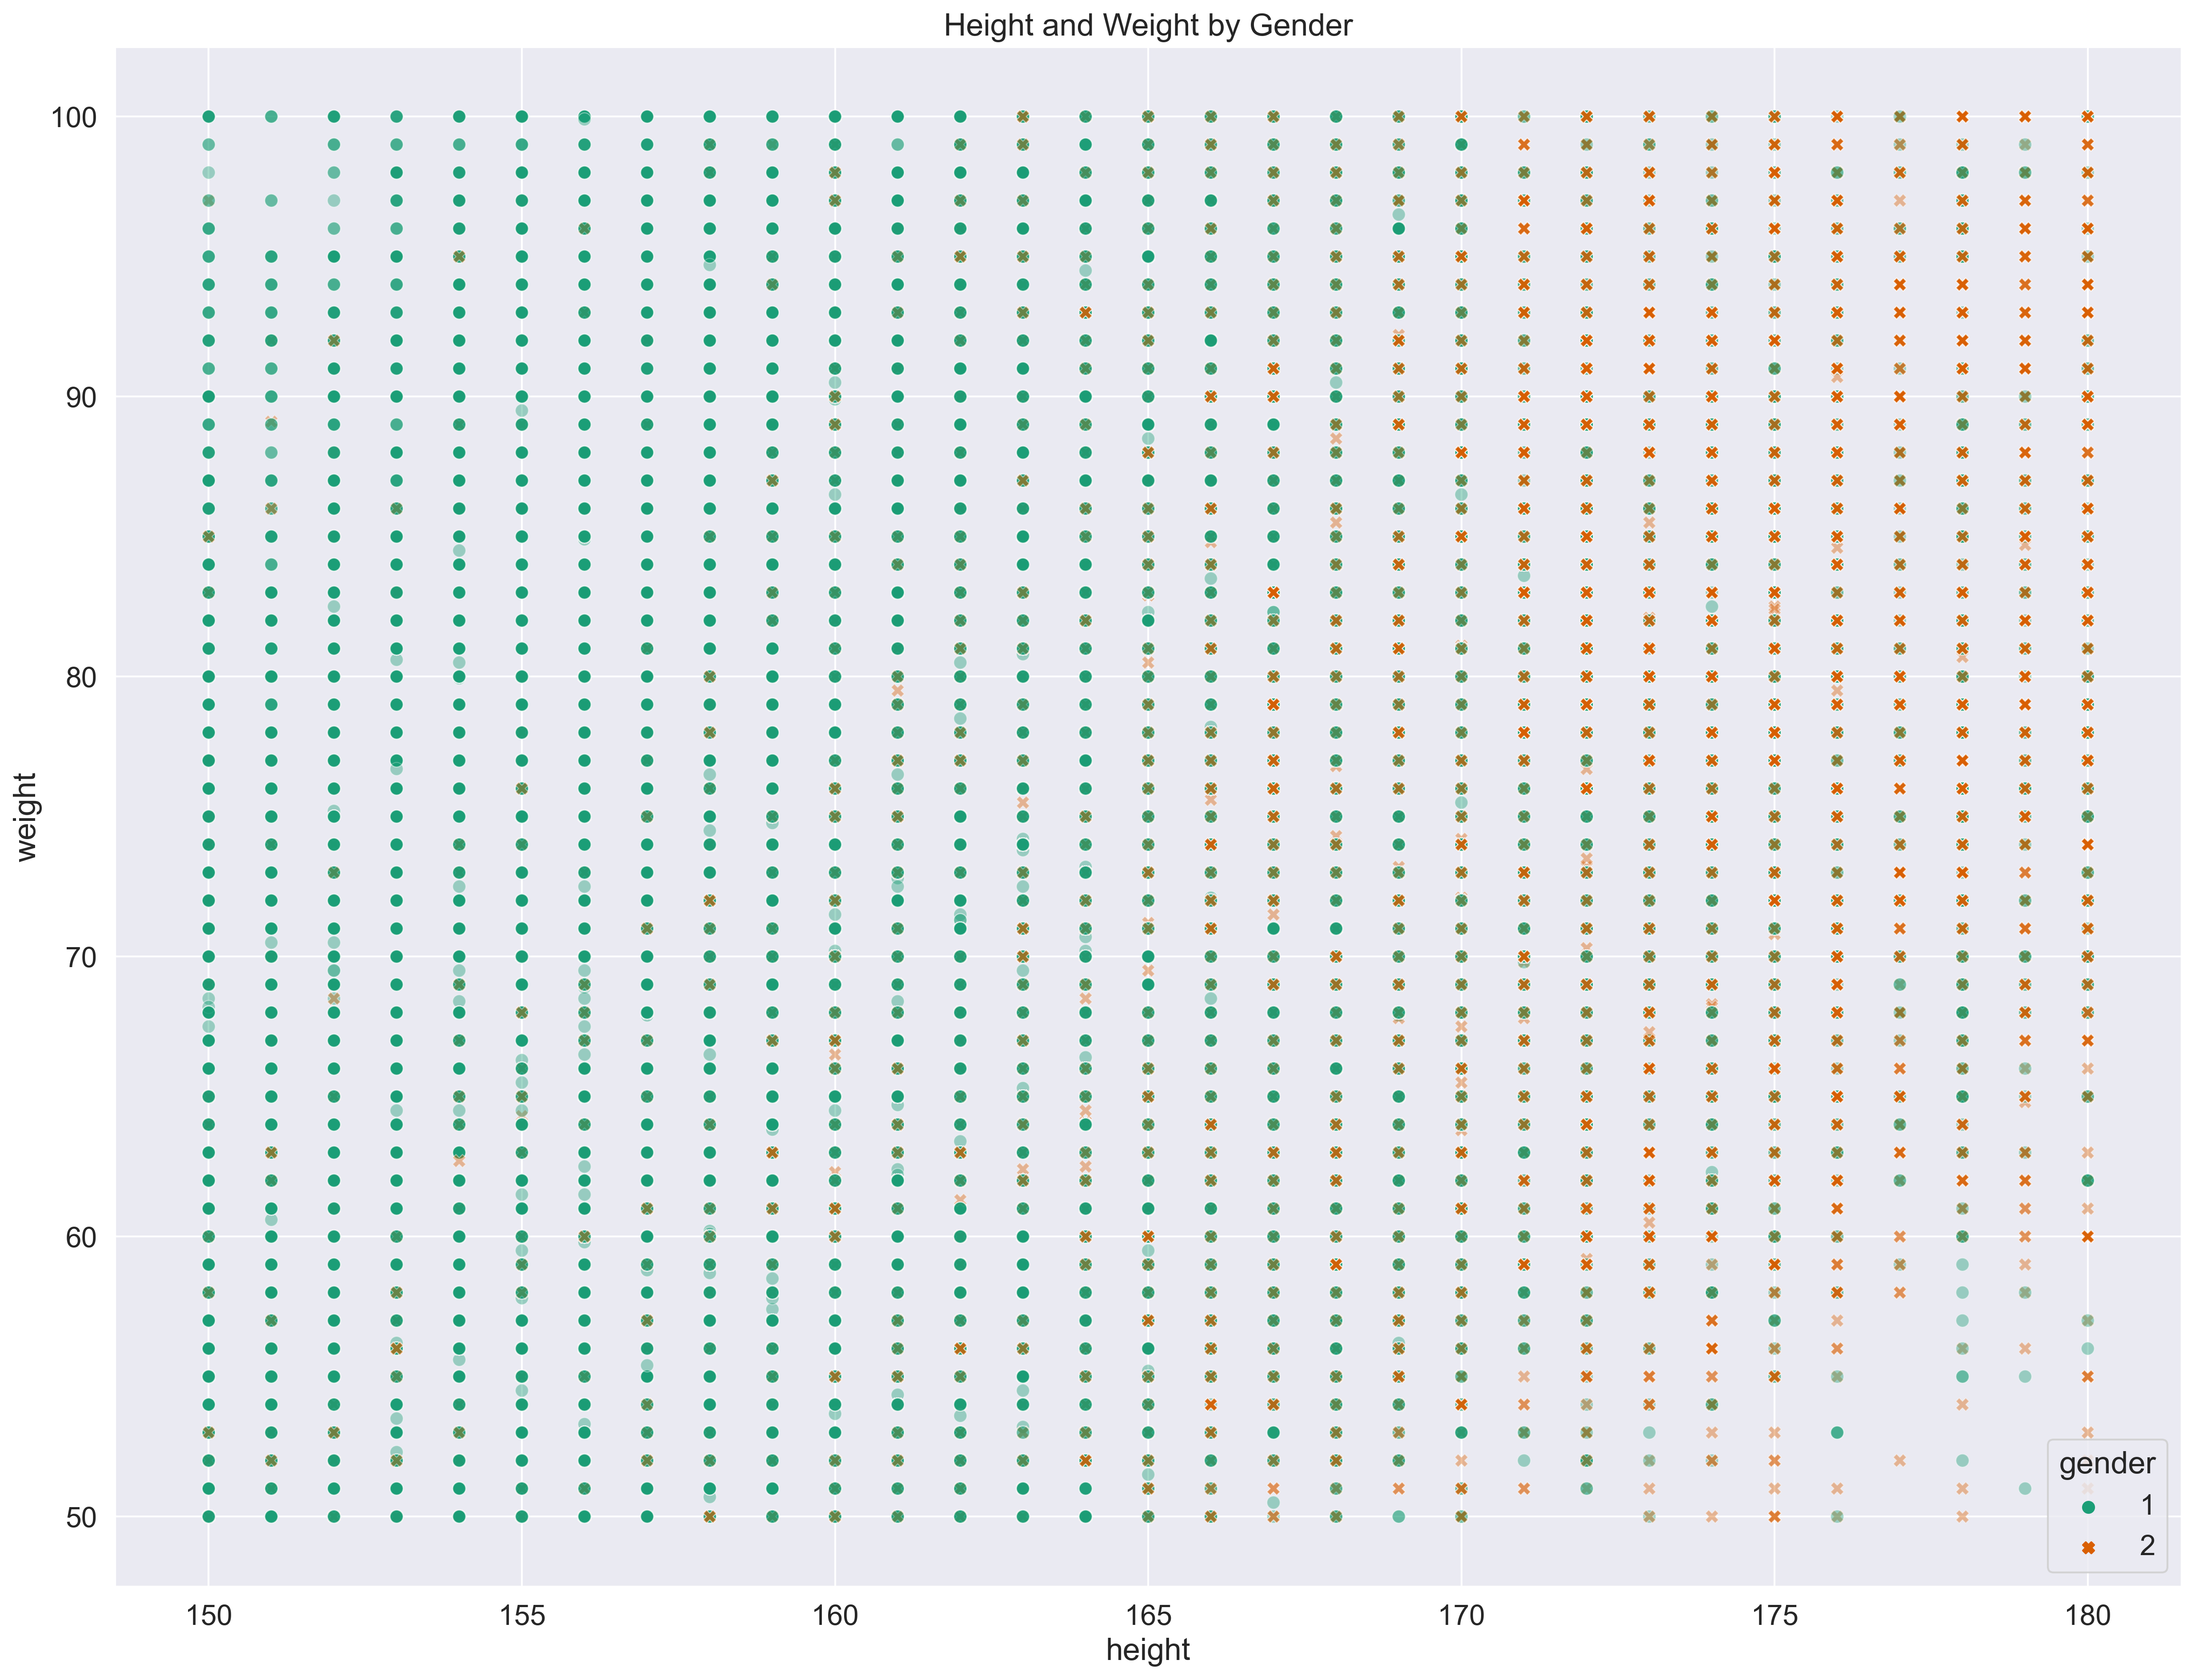

In [85]:
plt.figure(figsize=(20,15), dpi = 300)
plot1 = sns.scatterplot(x =  'height', y = 'weight', data = df, style = 'gender', hue = 'gender', palette=('Dark2'), s = 50, alpha = 0.4)
plt.title('Height and Weight by Gender')
plot1

__On the plot we could see that the most males are above 170 cm tall. <br>
The females have signifact lower height than the males.__

-----------------------------------------------------------------------------------

## Create a Scatterplot of the Sistolic and Diastolic Blood Pressure grouped by Health Status

<Axes: title={'center': 'Sistolic and Diastolic Blood Pressure by Health Status'}, xlabel='ap_hi', ylabel='ap_lo'>

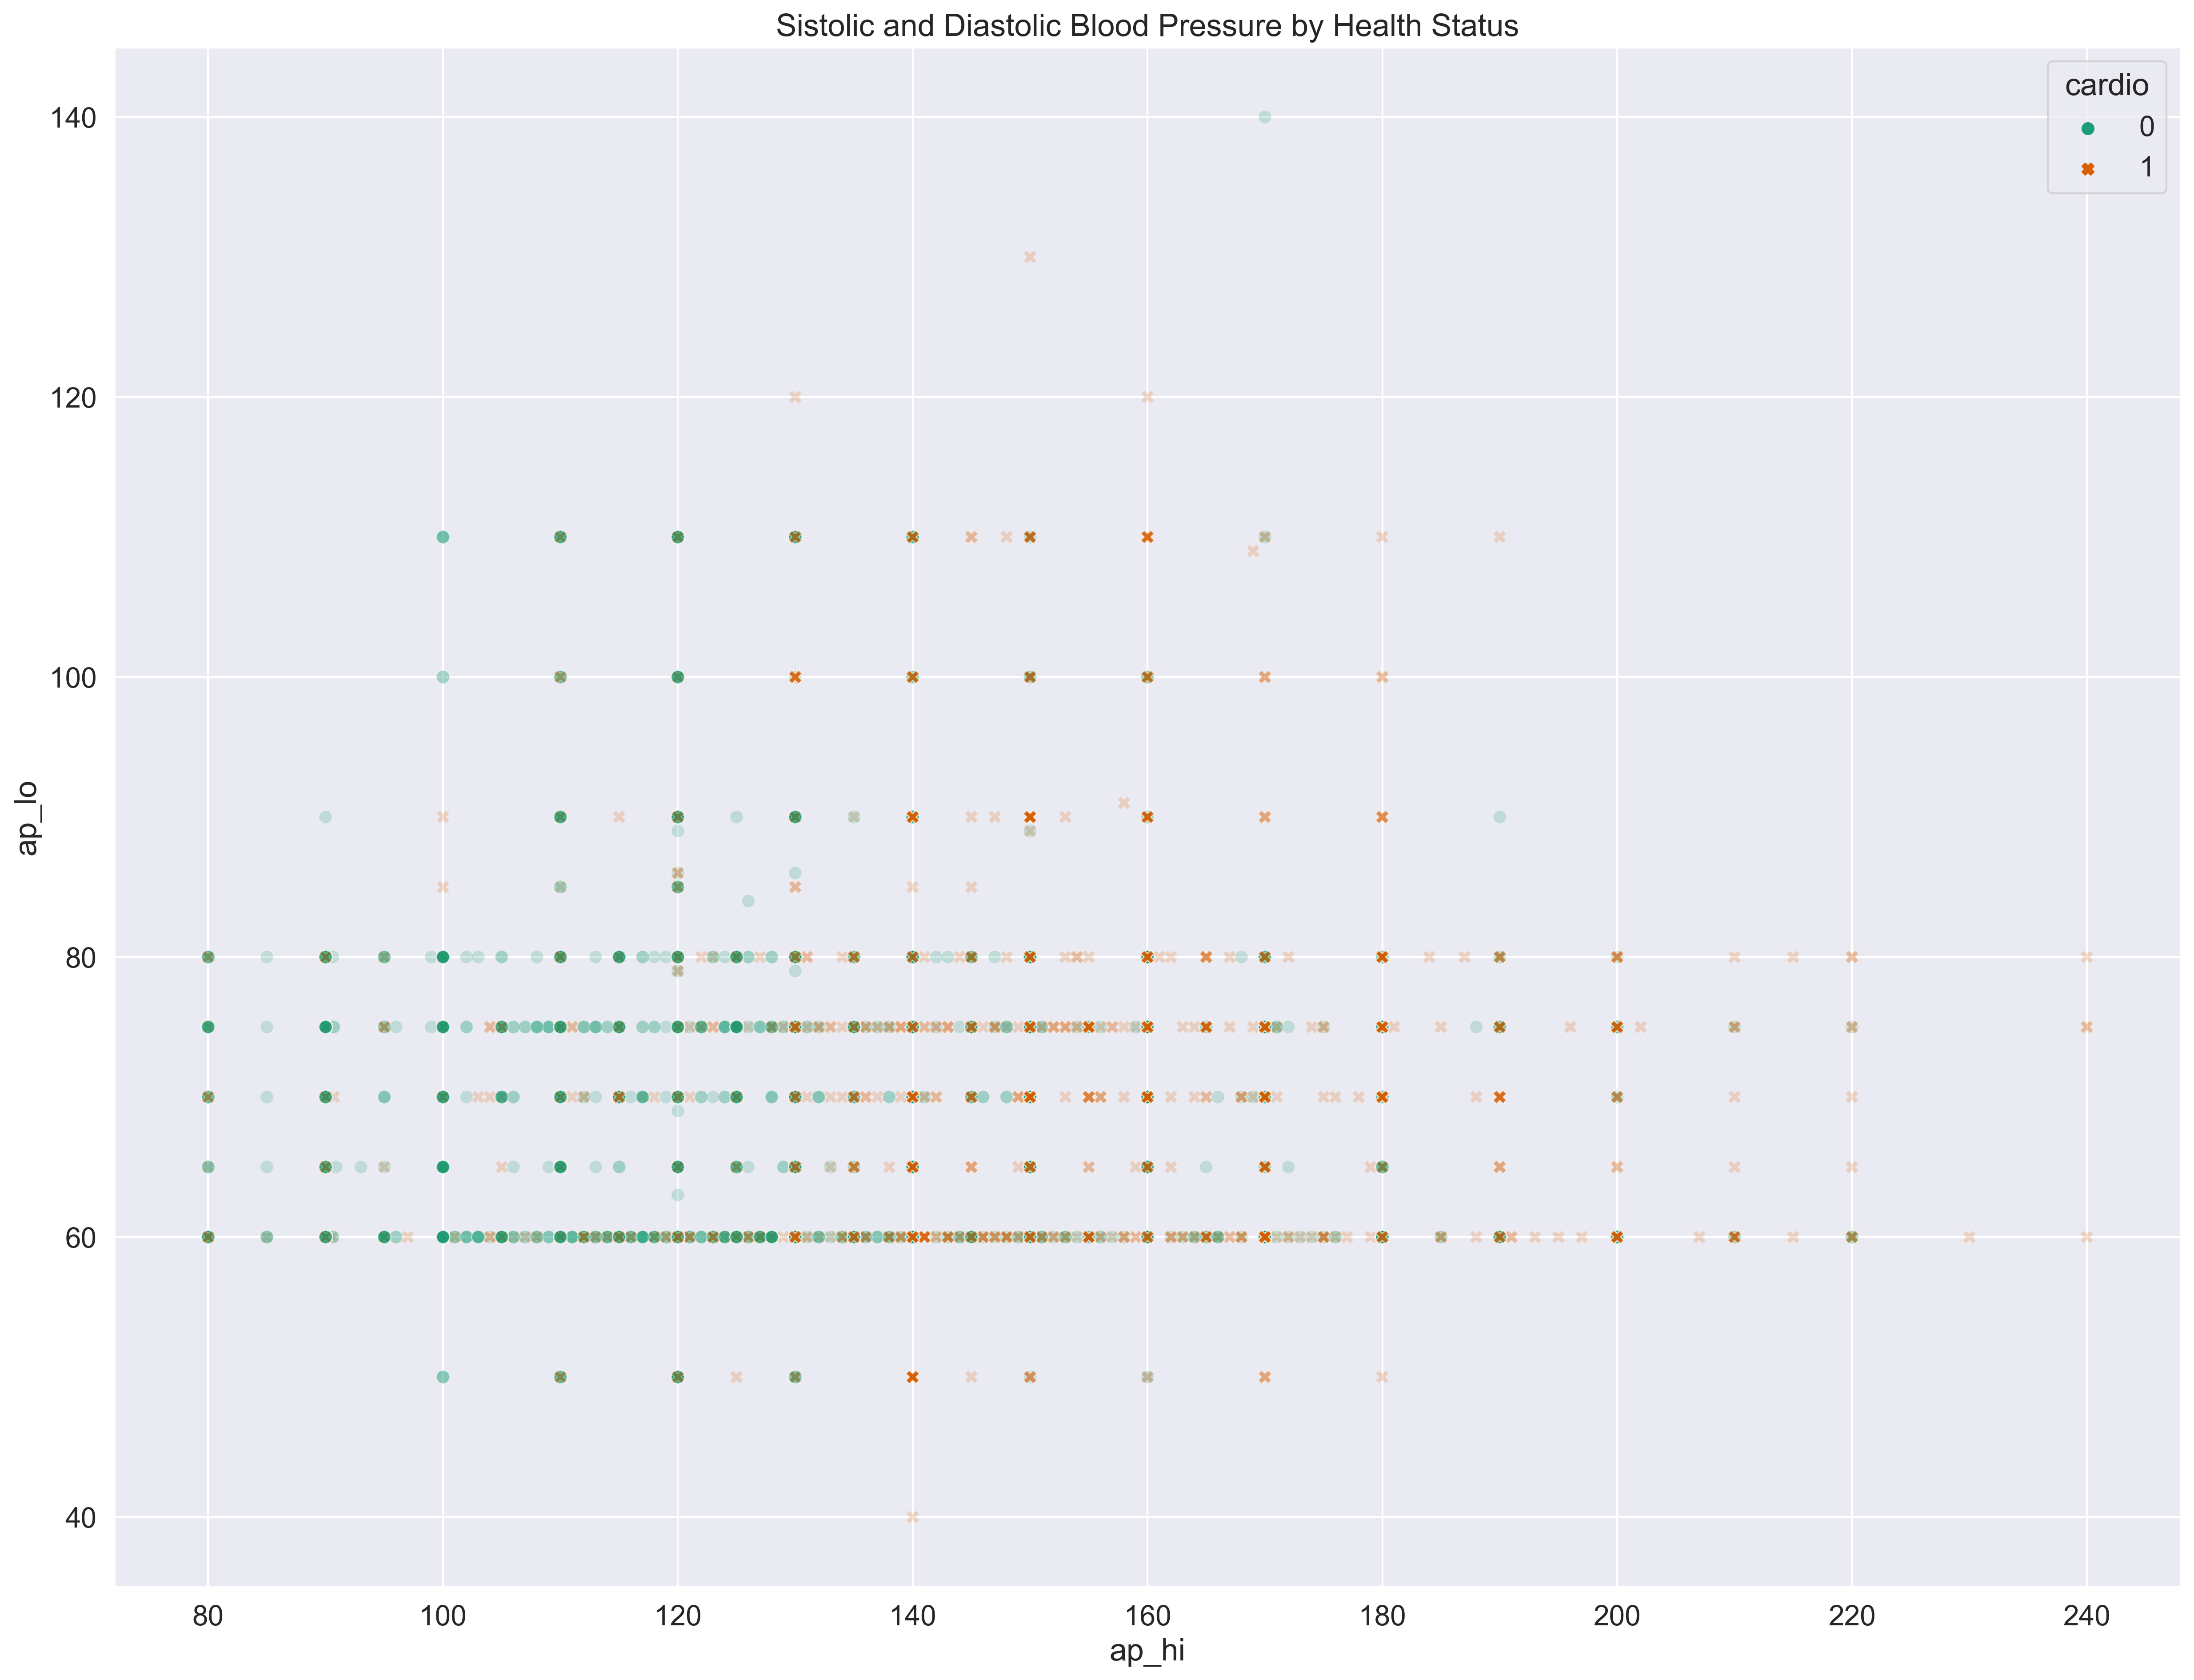

In [86]:
plt.figure(figsize=(20,15), dpi = 300)
plot1 = sns.scatterplot(x =  'ap_hi', y = 'ap_lo', data = df, style = 'cardio', hue = 'cardio', palette=('Dark2'), s = 50, alpha = 0.2)
plt.title('Sistolic and Diastolic Blood Pressure by Health Status')
plot1

__The plot shows that the most patients with presense of cardiovascular diseases have sistolic blood pressure above 140 (mm Hg). There is no any correlation between diastolic blood pressure and presense or absence of cardiovascular diseases.__

-----------------------------------------------------------------------------------

## Create a histograms of the all ages grouped by cholesterol levels


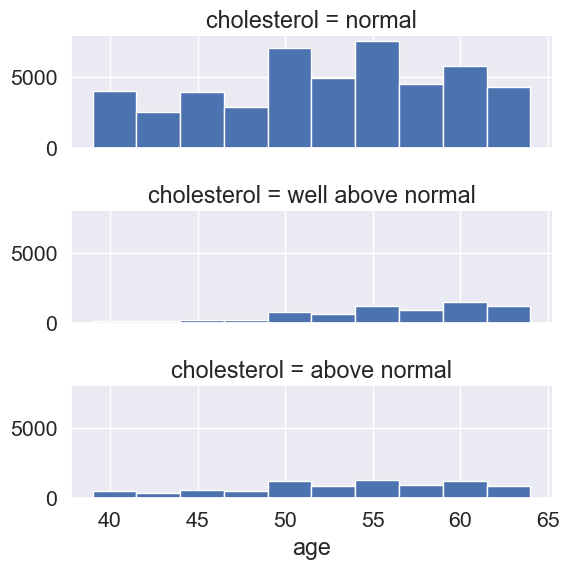

In [87]:
df_age_chol = df[['age', 'cholesterol']].copy()
df_age_chol['cholesterol'] = df_age_chol['cholesterol'].replace({1: 'normal', 2: 'above normal',
                                                                 3: 'well above normal'})
g = sns.FacetGrid(df_age_chol, row = 'cholesterol', height = 2, aspect = 3)
g = g.map(plt.hist, 'age')
plt.show()

<Figure size 5000x2500 with 0 Axes>

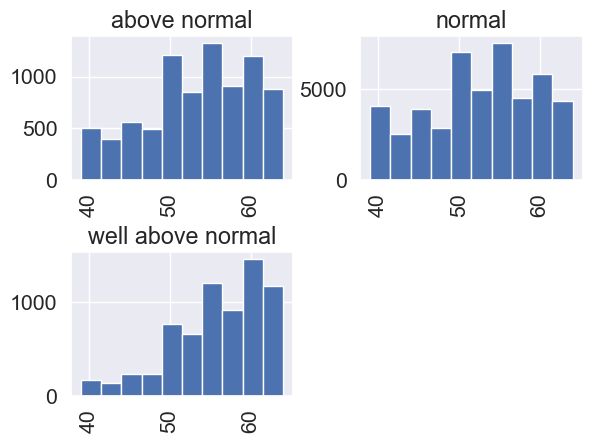

In [88]:
plt.figure(figsize=(20,10), dpi = 250)
df_age_chol.hist('age', by='cholesterol')
plt.show()

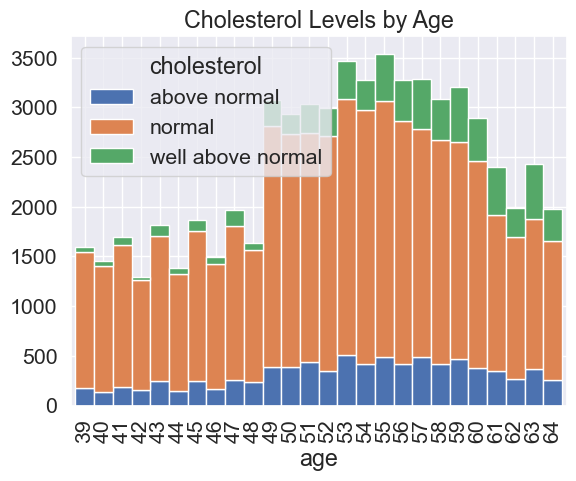

In [89]:
df_age_chol.groupby('age').cholesterol.value_counts().unstack().plot.bar(width=1, stacked=True)
plt.title('Cholesterol Levels by Age')
plt.show()

__The plots above show that the most people from all ages are with normal cholesterol level 1. <br> The level of cholesterol - "well above normal" is a characteristic almost for the patients over 45 years of age.__

In [90]:
df['cholesterol'].value_counts() / len(df)

1    0.756975
2    0.132316
3    0.110710
Name: cholesterol, dtype: float64

__The above results show that more than 75 % of the patients have normal cholesterol levels.__

-----------------------------------------------------------------------------------

## What percentage of the all patients over and equal to 45 years old have a level of cholesterol - "Well above normal"?

In [91]:
df.head()

ID  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0  110.0     80            1     1      0   
1   1   55       1     156    85.0  140.0     90            3     1      0   
2   2   51       1     165    64.0  130.0     70            3     1      0   
3   3   48       2     169    82.0  150.0    100            1     1      0   
4   4   47       1     156    56.0  100.0     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [92]:
mask = df.age >= 45
df_over_45 = df.loc[mask]
df_over_45.cholesterol.value_counts()

1    39945
2     7295
3     6610
Name: cholesterol, dtype: int64

In [93]:
df_over_45.age.value_counts()

55    3543
53    3467
57    3291
56    3280
54    3280
59    3203
58    3085
49    3078
51    3039
52    2991
50    2938
60    2895
63    2435
61    2398
62    1991
64    1977
47    1966
45    1865
48    1637
46    1491
Name: age, dtype: int64

In [94]:
df_over_45.cholesterol.value_counts()

1    39945
2     7295
3     6610
Name: cholesterol, dtype: int64

In [95]:
mask1 = df['cholesterol'] == 3
filter_df = df.loc[mask & mask1] 
filter_df

ID  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
1          1   55       1     156    85.0  140.0     90            3     1   
2          2   51       1     165    64.0  130.0     70            3     1   
6          6   60       1     157    93.0  130.0     80            3     1   
7          7   61       2     178    95.0  130.0     90            3     3   
21        24   45       1     170    68.0  150.0     90            3     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
63234  69929   54       1     164    85.0  165.0     80            3     3   
63242  69939   57       2     174    83.0  120.0     80            3     1   
63243  69940   58       1     168    78.0  140.0     80            3     1   
63250  69949   60       1     167    68.0  167.0     80            3     1   
63257  69956   58       1     158    75.0  120.0     80            3     3   

       smoke  alco  active  cardio  
1          0     0       1       1  
2          0     0       0       1  
6          0     0       1       0  
7          0     0       1       1  
21         0     0       1       1  
...      ...   ...     ...     ...  
63234      0     0       1       1  
63242      0     0       1       1  
63243      0     0       1       1  
63250      0     0       1       1  
63257      0     0       1       0  

[6610 rows x 13 columns]

In [96]:
cholesterol_percentage = (len(filter_df) / len(df_over_45)) * 100
print(f"Only {round(cholesterol_percentage,2)}% patients over or equal to 45 years old have a cholesterol level 'well above normal'.")

Only 12.27% patients over or equal to 45 years old have a cholesterol level 'well above normal'.


-----------------------------------------------------------------------------------

## Create a histogram of the all ages grouped by glucose levels

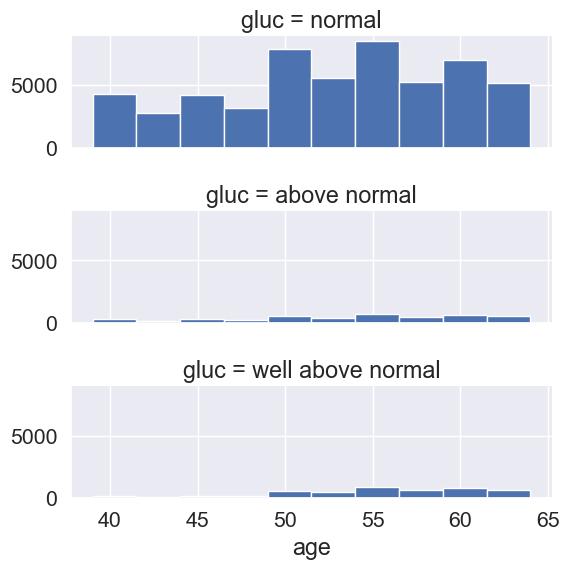

In [97]:
df_age_gluc = df[['age', 'gluc']].copy()
df_age_gluc['gluc'] = df_age_gluc ['gluc'].replace({1: "normal", 2: "above normal", 3: "well above normal"})
g = sns.FacetGrid(df_age_gluc, row = 'gluc', height = 2, aspect = 3)
g = g.map(plt.hist, 'age')
plt.show()

<Figure size 5000x2500 with 0 Axes>

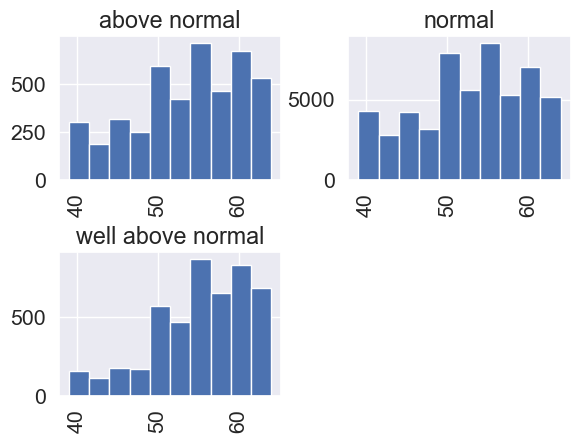

In [98]:
plt.figure(figsize=(20,10), dpi = 250)
df_age_gluc.hist('age', by='gluc')
plt.show()

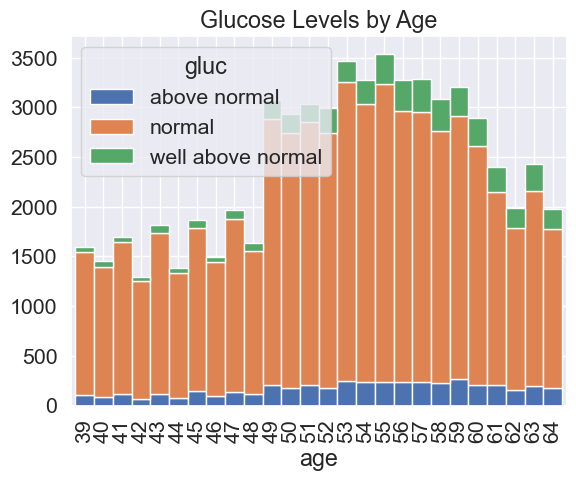

In [99]:
df_age_gluc.groupby('age').gluc.value_counts().unstack().plot.bar(width=1, stacked=True)
plt.title('Glucose Levels by Age')
plt.show()

__The plots above show that the most people from all ages are with normal glucose level 1. <br> The level of glucose - "well above normal" is a characteristic almost for the patients over 50 years of age.__

In [100]:
df['gluc'].value_counts() / len(df)

1    0.855352
3    0.074187
2    0.070462
Name: gluc, dtype: float64

__The above results show that more than 85 % of the patients have normal glucose levels.__

-----------------------------------------------------------------------------------

## What percentage of the all patients over or equal to 50 years old have a level of glucose - "Well above normal"?

In [101]:
df.head()

ID  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0  110.0     80            1     1      0   
1   1   55       1     156    85.0  140.0     90            3     1      0   
2   2   51       1     165    64.0  130.0     70            3     1      0   
3   3   48       2     169    82.0  150.0    100            1     1      0   
4   4   47       1     156    56.0  100.0     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [102]:
mask = df.gluc == 3
mask1 = df.age >= 50
filter_df = df.loc[mask & mask1]
filter_df

ID  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
7          7   61       2     178    95.0  130.0     90            3     3   
26        29   57       2     169    74.0  130.0     70            1     3   
77        87   53       2     166    94.0  140.0     90            2     3   
97       111   57       2     159    78.0  120.0     80            3     3   
148      166   53       1     170    68.0  130.0     80            3     3   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
63217  69907   63       2     170    88.0  140.0     80            3     3   
63225  69920   53       1     166    93.0  150.0     80            3     3   
63234  69929   54       1     164    85.0  165.0     80            3     3   
63236  69931   61       2     166    64.0  120.0     80            1     3   
63257  69956   58       1     158    75.0  120.0     80            3     3   

       smoke  alco  active  cardio  
7          0     0       1       1  
26         0     0       0       0  
77         0     0       1       1  
97         0     0       1       1  
148        0     0       1       1  
...      ...   ...     ...     ...  
63217      0     0       1       1  
63225      0     0       1       1  
63234      0     0       1       1  
63236      0     0       1       1  
63257      0     0       1       0  

[3868 rows x 13 columns]

In [103]:
mask = df.age >= 50
df_over_50 = df.loc[mask]
df_over_50

ID  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0  110.0     80            1     1   
1          1   55       1     156    85.0  140.0     90            3     1   
2          2   51       1     165    64.0  130.0     70            3     1   
5          5   60       1     151    67.0  120.0     80            2     2   
6          6   60       1     157    93.0  130.0     80            3     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
63289  69993   53       1     172    70.0  130.0     80            1     1   
63290  69994   57       1     165    80.0  150.0     80            1     1   
63291  69995   52       2     168    76.0  120.0     80            1     1   
63292  69998   61       1     163    72.0  135.0     80            1     2   
63293  69999   56       1     170    72.0  120.0     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
5          0     0       0       0  
6          0     0       1       0  
...      ...   ...     ...     ...  
63289      0     0       1       1  
63290      0     0       1       1  
63291      1     0       1       0  
63292      0     0       0       1  
63293      0     0       1       0  

[43813 rows x 13 columns]

In [104]:
gluc_percentage = (len(filter_df) / len(df_over_50)) * 100
print(f"Only {round(gluc_percentage,2)}% patients over or equal to 50 years old have glucose level 'well above normal'.")

Only 8.83% patients over or equal to 50 years old have glucose level 'well above normal'.


-----------------------------------------------------------------------------------

## Data Inspection of Systolic blood pressure and Diastolic Blood Pressure columns

In [105]:
df['ap_lo'].max()

140

In [106]:
df['ap_lo'].min()

40

In [107]:
df['ap_hi'].max()

240.0

In [108]:
df['ap_hi'].min()

80.0

In [109]:
df['ap_lo'].value_counts()

60     33742
75     15235
80      6135
70      5874
65      1532
90       211
110      141
50        91
100       85
85        17
86         4
79         4
89         3
120        2
130        1
84         1
91         1
40         1
140        1
109        1
63         1
69         1
Name: ap_lo, dtype: int64

### Delete rows with low frequency values

In [110]:
col = 'ap_lo' 
n = 142     
df = df[df.groupby(col)[col].transform('count').ge(n)]
df['ap_lo'].value_counts()

60    33742
75    15235
80     6135
70     5874
65     1532
90      211
Name: ap_lo, dtype: int64

In [111]:
df['ap_hi'].value_counts()

120.0    25779
140.0     8355
110.0     7918
130.0     7873
150.0     3833
         ...  
184.0        1
178.0        1
90.9         1
90.2         1
161.0        1
Name: ap_hi, Length: 112, dtype: int64

In [112]:
col = 'ap_hi' 
n = 195     
df = df[df.groupby(col)[col].transform('count').ge(n)]
df['ap_hi'].value_counts()

120.0    25779
140.0     8355
110.0     7918
130.0     7873
150.0     3833
160.0     2559
100.0     2291
90.0       854
170.0      565
180.0      541
125.0      401
115.0      201
Name: ap_hi, dtype: int64

### Is there a correlation between Systolic and Diastolic Blood Pressure measurement?

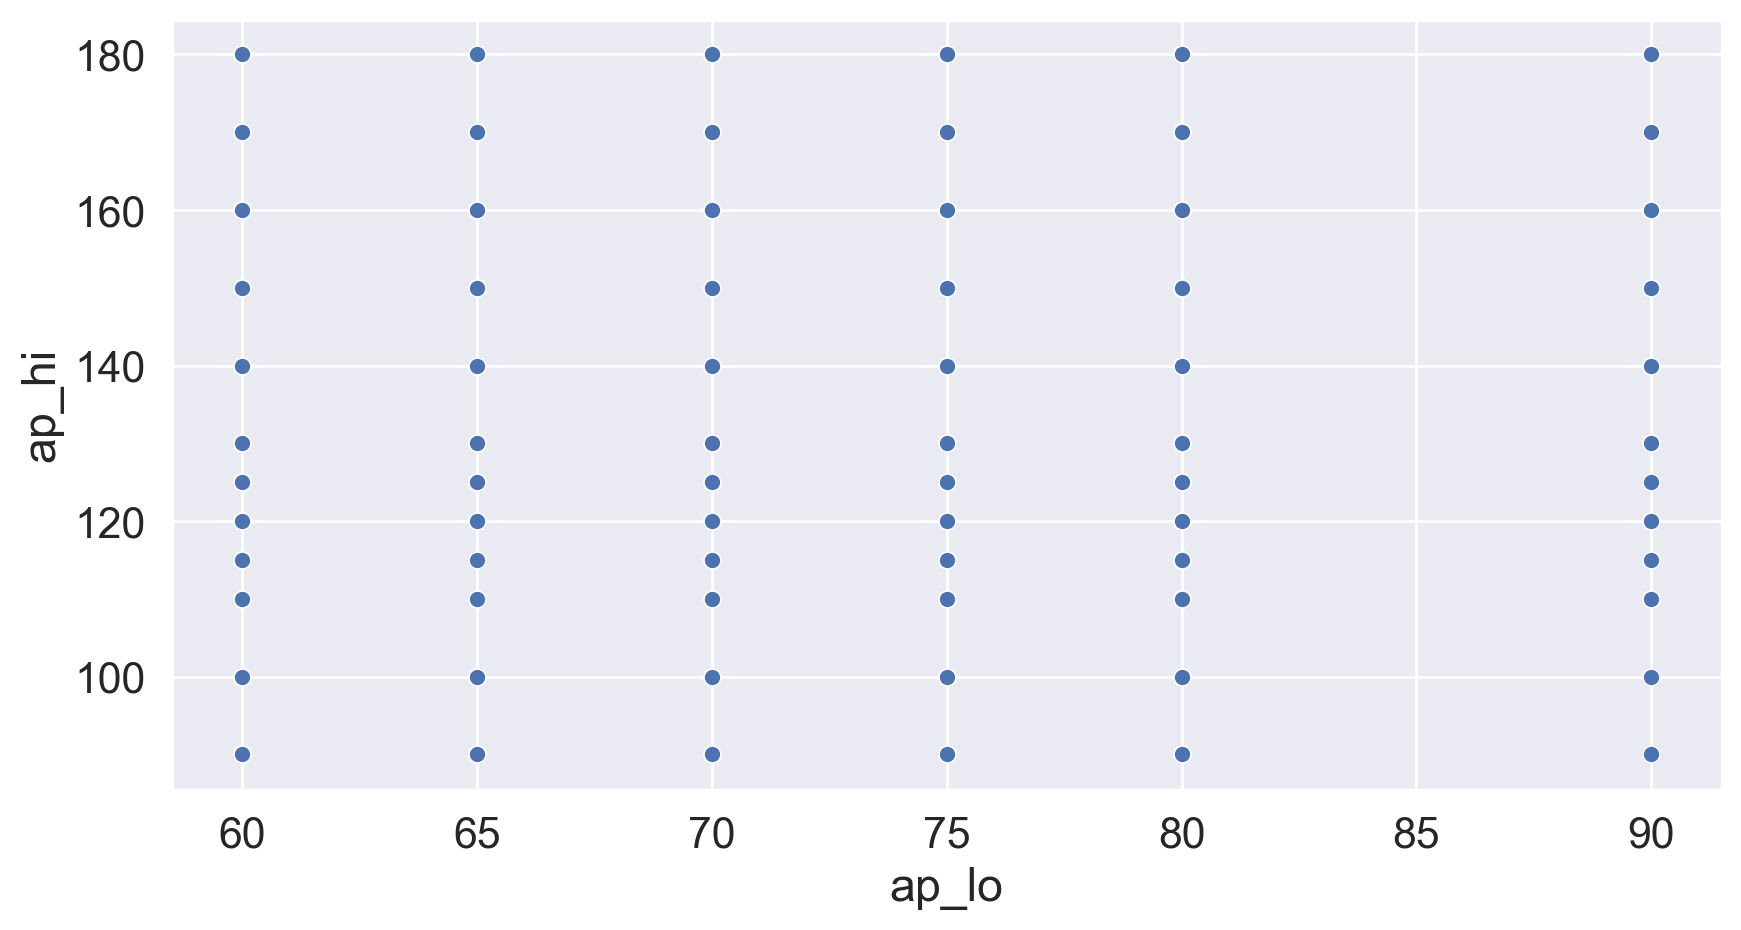

In [113]:
plt.figure(figsize=(10,5), dpi = 200)
sns.scatterplot(x='ap_lo',y='ap_hi',data=df)
plt.show()

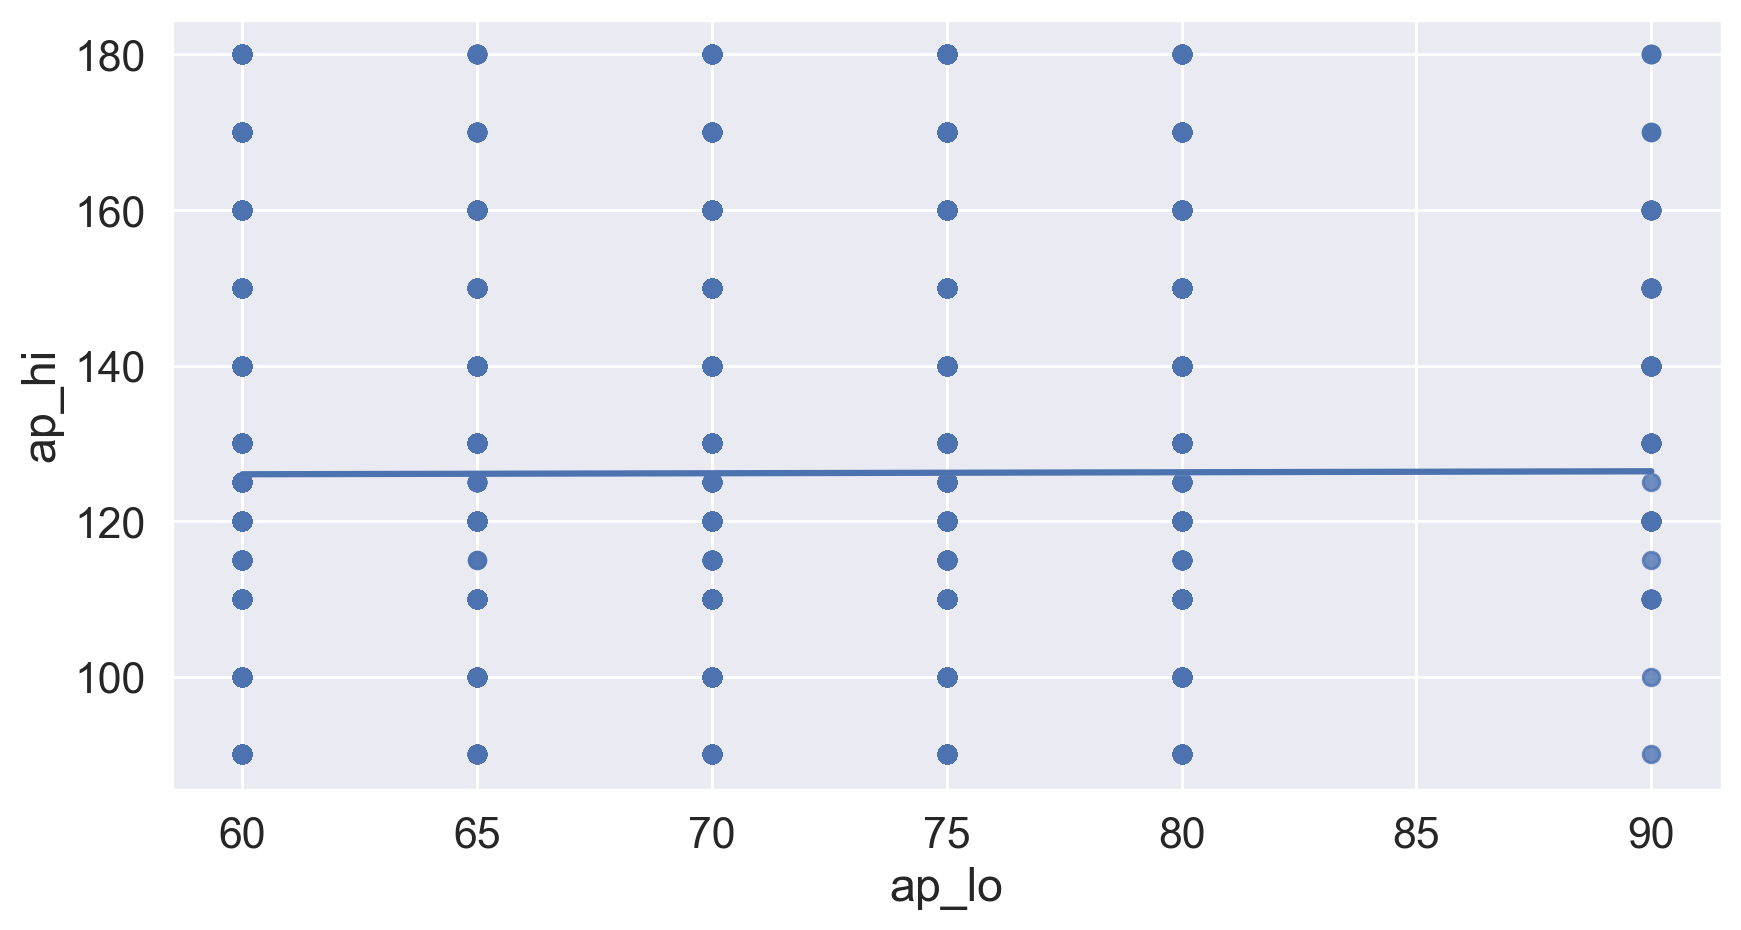

In [114]:
plt.figure(figsize=(10,5), dpi = 200)
sns.regplot(x = 'ap_lo', y = 'ap_hi', data = df)
plt.show()

In [115]:
df['ap_hi'].corr(df['ap_lo'])

0.006381199361283052

__There is no correlation between Systolic and Diastolic Blood Pressure measurements.__

### What are the values in Diastolic Blood Pressure  for 10% of the highest Systolic Blood Pressure measurements?

In [116]:
highest10p = np.round(0.1*len(df),2).astype(int)
df.nlargest(highest10p, 'ap_hi')

ID  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
54        59   55       1     164    64.0  180.0     90            1     1   
56        61   57       2     165    75.0  180.0     90            3     1   
384      437   57       2     180    84.0  180.0     90            3     3   
431      489   59       2     167    73.0  180.0     80            3     3   
481      547   53       1     156    72.0  180.0     90            2     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
40897  45165   58       1     153    65.0  150.0     60            1     1   
40907  45176   64       2     176    75.0  150.0     60            1     1   
40917  45188   58       2     174    69.0  150.0     60            2     2   
40919  45190   55       1     158    89.0  150.0     60            2     1   
40920  45191   41       1     165    75.0  150.0     60            2     2   

       smoke  alco  active  cardio  
54         1     0       1       1  
56         0     0       1       1  
384        0     0       1       1  
431        0     0       0       1  
481        0     0       1       1  
...      ...   ...     ...     ...  
40897      0     0       1       1  
40907      1     1       1       1  
40917      1     0       1       1  
40919      0     0       1       1  
40920      0     0       1       1  

[6117 rows x 13 columns]

In [117]:
df.nlargest(highest10p, 'ap_hi')['ap_hi'].mean()

158.68399542259277

In [118]:
df.nlargest(highest10p, 'ap_hi')['ap_lo'].mean()

67.33938205002453

__The mean value of top 10% of the highest Systolic Blood Pressure measurements is 159 mmHg and the mean value for the Diastolic Blood Pressure measurements for these values  is 67 mmHg.__

### Construct a grid of scatterplots between Systolic and  Diastolic blood pressure measurements. Stratify the plots by smoking (rows) and by alcohol intake groups (columns) 


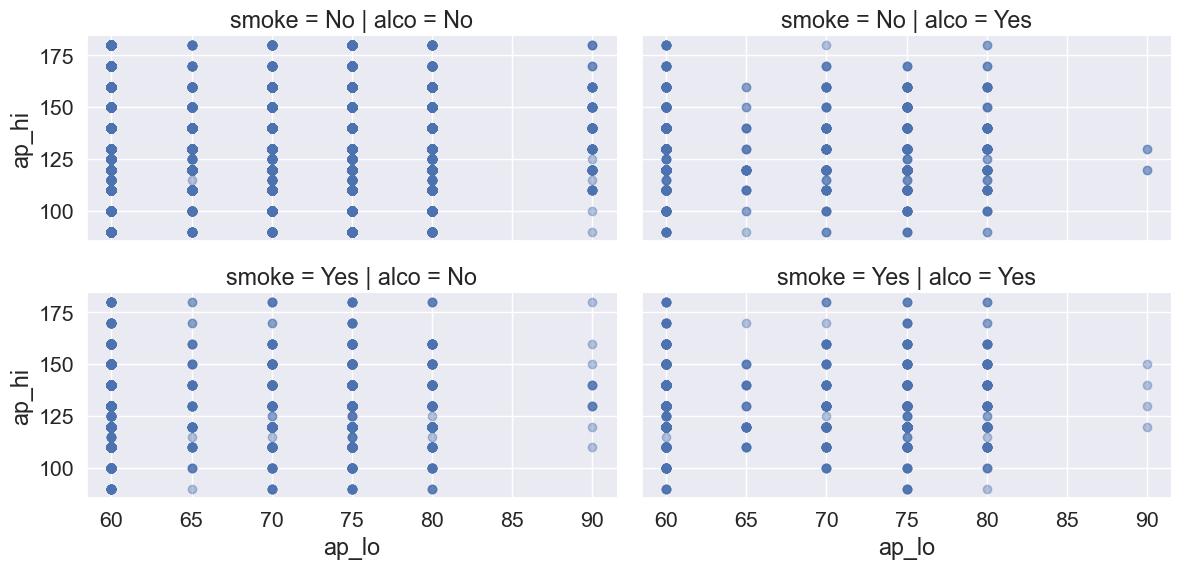

In [119]:
df['smoke'] = df.smoke.replace({0: 'No', 1: 'Yes'})
df['alco'] = df.alco.replace({0: 'No', 1: 'Yes'})
sns.FacetGrid(df, row='smoke',  col='alco', height = 3, aspect = 2).map(
    plt.scatter, 'ap_lo', 'ap_hi', alpha=0.4).add_legend()

__In the alcohol consuming groups, patients with ap_lo equal to 65 were less presented, but so were those with ap_lo equal to 90. <br> Interesting fact: in the group non-smokers and non-alcohol drinkers we can find values of different blood pressures.__

### Construct a grid of scatterplots between Systolic and Diastolic blood pressure measurement. Stratify the plots by cholesterol levels (row) and by glucose levels (columns)

In [120]:
df['cholesterol'] = df['cholesterol'].replace({1: 'normal', 2: 'above normal',
                                                                           3: 'well above normal'})
df['gluc'] = df['gluc'].replace({1: 'normal', 2: 'above normal',
                                                            3: 'well above normal'})

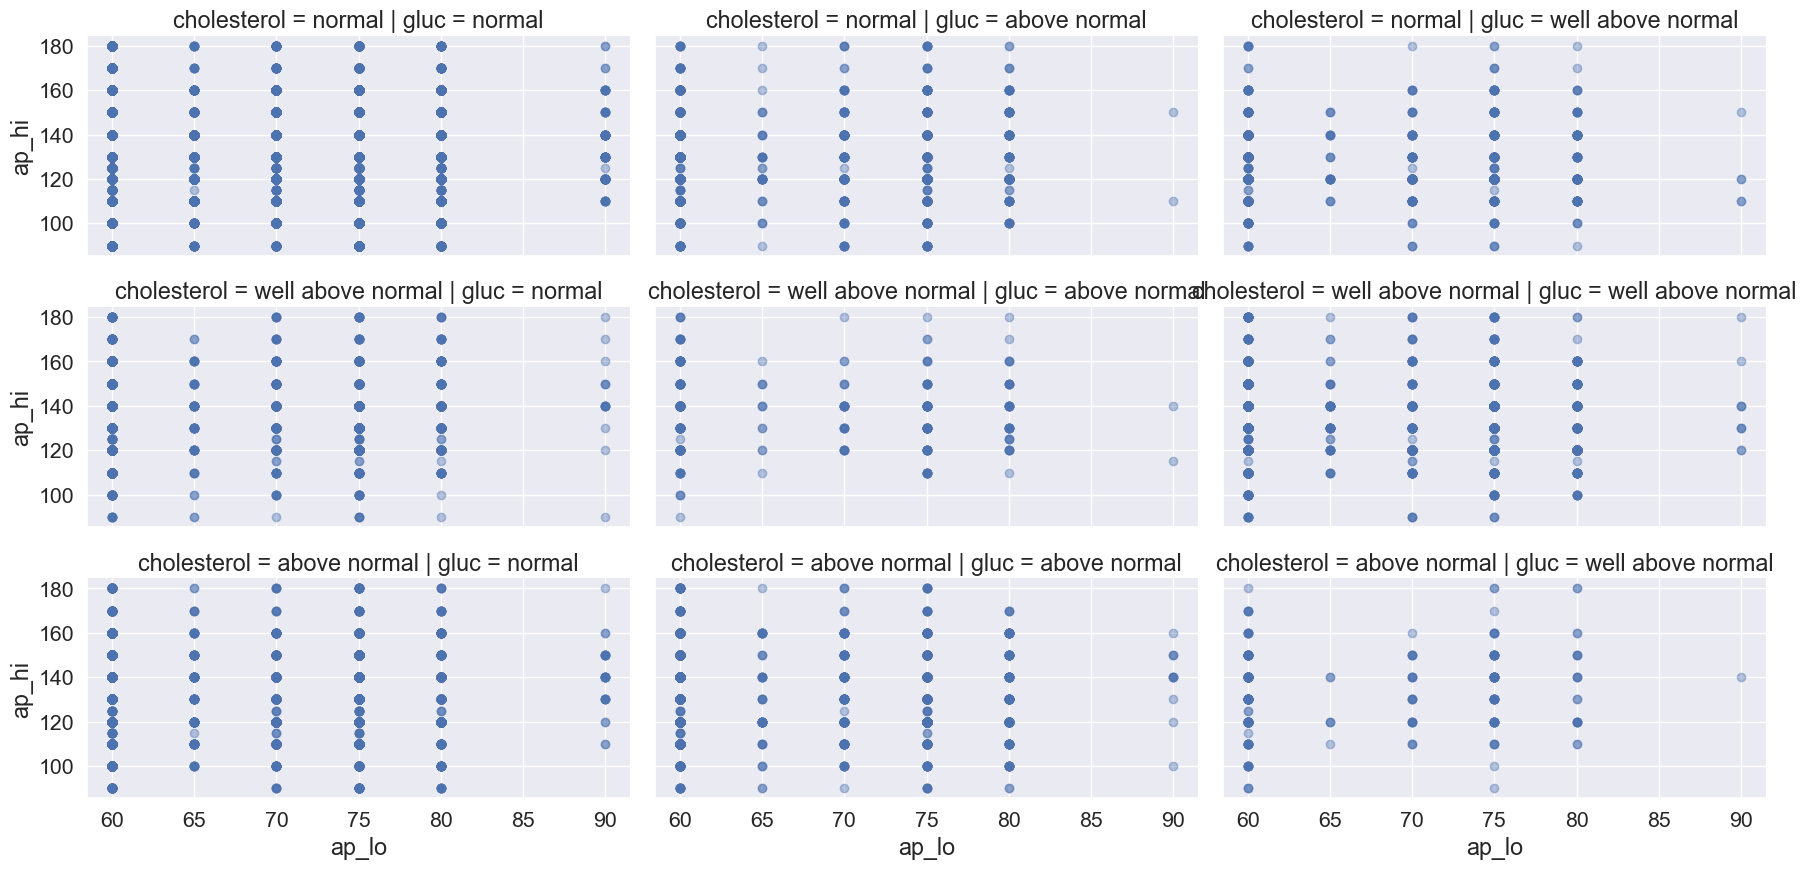

In [121]:
sns.FacetGrid(df, row='cholesterol',  col='gluc', height = 3, aspect = 2).map(
    plt.scatter, 'ap_lo', 'ap_hi', alpha=0.4).add_legend()

__The plots show that the most people with "cholesterol level = normal" and with "glucose level = normal" have lower blood pressures measurements.__

-----------------------------------------------------------------------------------

## What percentage of the people have Cholesterol = "Well above normal" and Gluc = "Well above normal"?

In [122]:
mask1 = df.cholesterol.isin(['well above normal'])
mask2 = df.gluc.isin(['well above normal'])
filter_df = df.loc[mask1 & mask2]
filter_df

ID  age  gender  height  weight  ap_hi  ap_lo        cholesterol  \
7          7   61       2     178    95.0  130.0     90  well above normal   
97       111   57       2     159    78.0  120.0     80  well above normal   
134      150   43       2     167    82.0  120.0     80  well above normal   
148      166   53       1     170    68.0  130.0     80  well above normal   
184      207   57       1     161    68.0  120.0     70  well above normal   
...      ...  ...     ...     ...     ...    ...    ...                ...   
63151  69836   49       1     170    80.0  120.0     80  well above normal   
63182  69869   47       2     176    96.0  160.0     80  well above normal   
63217  69907   63       2     170    88.0  140.0     80  well above normal   
63225  69920   53       1     166    93.0  150.0     80  well above normal   
63257  69956   58       1     158    75.0  120.0     80  well above normal   

                    gluc smoke alco  active  cardio  
7      well above normal    No   No       1       1  
97     well above normal    No   No       1       1  
134    well above normal    No   No       0       1  
148    well above normal    No   No       1       1  
184    well above normal   Yes   No       1       1  
...                  ...   ...  ...     ...     ...  
63151  well above normal    No   No       1       1  
63182  well above normal   Yes   No       1       1  
63217  well above normal    No   No       1       1  
63225  well above normal    No   No       1       1  
63257  well above normal    No   No       1       0  

[2920 rows x 13 columns]

In [123]:
percentage = round(((len(filter_df) / len(df)) * 100),2)
percentage

4.77

-----------------------------------------------------------------------------------

## What percentage of the people have Cholesterol = "Normal" and Gluc = "Normal"?

In [124]:
mask1 = df.cholesterol.isin(['normal'])
mask2 = df.gluc.isin(['normal'])
filter_df = df.loc[mask1 & mask2]
filter_df

ID  age  gender  height  weight  ap_hi  ap_lo cholesterol    gluc  \
0          0   50       2     168    62.0  110.0     80      normal  normal   
4          4   47       1     156    56.0  100.0     60      normal  normal   
8          8   48       1     158    71.0  110.0     70      normal  normal   
9          9   54       1     164    68.0  110.0     60      normal  normal   
10        10   61       1     169    80.0  120.0     80      normal  normal   
...      ...  ...     ...     ...     ...    ...    ...         ...     ...   
63286  69990   41       1     168    72.0  110.0     80      normal  normal   
63288  69992   51       1     161    56.0  170.0     80      normal  normal   
63289  69993   53       1     172    70.0  130.0     80      normal  normal   
63290  69994   57       1     165    80.0  150.0     80      normal  normal   
63291  69995   52       2     168    76.0  120.0     80      normal  normal   

      smoke alco  active  cardio  
0        No   No       1       0  
4        No   No       0       0  
8        No   No       1       0  
9        No   No       0       0  
10       No   No       1       0  
...     ...  ...     ...     ...  
63286    No   No       1       1  
63288    No   No       1       1  
63289    No   No       1       1  
63290    No   No       1       1  
63291   Yes   No       1       0  

[43358 rows x 13 columns]

In [125]:
percentage = round(((len(filter_df) / len(df)) * 100),2)
percentage

70.88

__The most people have Cholesterol = "normal" and Gluc = "normal" : (71%).__

-----------------------------------------------------------------------------------

## Construct a grid of scatterplots between the systolic and the diastolic blood pressure measurement. Stratify the plots by gender (row) and by physical activity (columns)

In [126]:
df['gender'] = df['gender'].replace({1: 'Female', 2: 'Male'})
df['active'] = df['active'].replace({0: 'No', 1: 'Yes'})

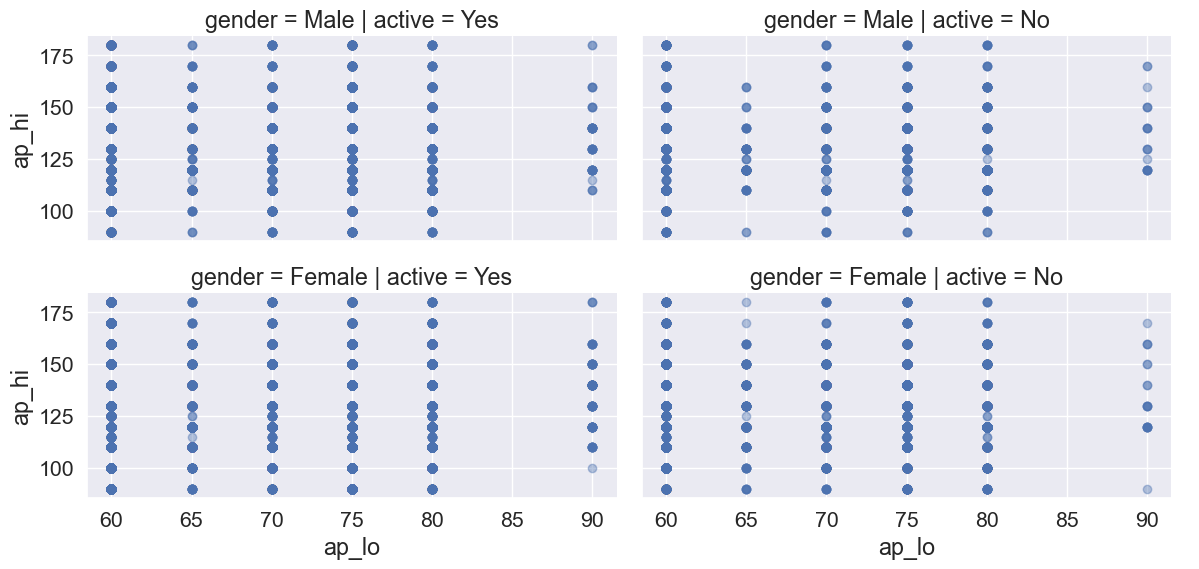

In [127]:
sns.FacetGrid(df, row='gender',  col='active', height = 3, aspect = 2).map(
    plt.scatter, 'ap_lo', 'ap_hi', alpha=0.4).add_legend()

__The plots show that the most people are physical active from the both groups.__

### Who are more physically active, men or women?

In [128]:
mask1 = df.gender.isin(['Male'])
mask2 = df.active.isin(['Yes'])
filter_df = df.loc[mask1 & mask2]
filter_df

ID  age gender  height  weight  ap_hi  ap_lo        cholesterol  \
0          0   50   Male     168    62.0  110.0     80             normal   
7          7   61   Male     178    95.0  130.0     90  well above normal   
11        11   51   Male     173    60.0  120.0     80             normal   
17        19   59   Male     162    56.0  120.0     70             normal   
18        20   54   Male     163    83.0  120.0     80             normal   
...      ...  ...    ...     ...     ...    ...    ...                ...   
63271  69971   55   Male     177    80.0  130.0     80             normal   
63273  69973   60   Male     175    72.0  130.0     80             normal   
63282  69984   49   Male     168    80.0  120.0     80             normal   
63283  69986   49   Male     180    78.0  120.0     80             normal   
63291  69995   52   Male     168    76.0  120.0     80             normal   

                    gluc smoke alco active  cardio  
0                 normal    No   No    Yes       0  
7      well above normal    No   No    Yes       1  
11                normal    No   No    Yes       0  
17                normal   Yes   No    Yes       0  
18                normal    No   No    Yes       0  
...                  ...   ...  ...    ...     ...  
63271             normal    No   No    Yes       0  
63273             normal    No   No    Yes       0  
63282             normal    No   No    Yes       1  
63283             normal    No   No    Yes       0  
63291             normal   Yes   No    Yes       0  

[17075 rows x 13 columns]

In [129]:
percentage = round(((len(filter_df) / len(df)) * 100),2)
percentage

27.91

In [130]:
mask1 = df.gender.isin(['Female'])
mask2 = df.active.isin(['Yes'])
filter_df = df.loc[mask1 & mask2]
filter_df

ID  age  gender  height  weight  ap_hi  ap_lo        cholesterol  \
1          1   55  Female     156    85.0  140.0     90  well above normal   
6          6   60  Female     157    93.0  130.0     80  well above normal   
8          8   48  Female     158    71.0  110.0     70             normal   
10        10   61  Female     169    80.0  120.0     80             normal   
13        13   54  Female     158    78.0  110.0     70             normal   
...      ...  ...     ...     ...     ...    ...    ...                ...   
63287  69991   56  Female     159    72.0  130.0     80       above normal   
63288  69992   51  Female     161    56.0  170.0     80             normal   
63289  69993   53  Female     172    70.0  130.0     80             normal   
63290  69994   57  Female     165    80.0  150.0     80             normal   
63293  69999   56  Female     170    72.0  120.0     80       above normal   

               gluc smoke alco active  cardio  
1            normal    No   No    Yes       1  
6            normal    No   No    Yes       0  
8            normal    No   No    Yes       0  
10           normal    No   No    Yes       0  
13           normal    No   No    Yes       0  
...             ...   ...  ...    ...     ...  
63287  above normal    No   No    Yes       0  
63288        normal    No   No    Yes       1  
63289        normal    No   No    Yes       1  
63290        normal    No   No    Yes       1  
63293        normal    No   No    Yes       0  

[32146 rows x 13 columns]

In [131]:
percentage = round(((len(filter_df) / len(df)) * 100),2)
percentage

52.55

__The women are more physically active than the men: 53% vs  28%.__

<Figure size 1200x450 with 0 Axes>

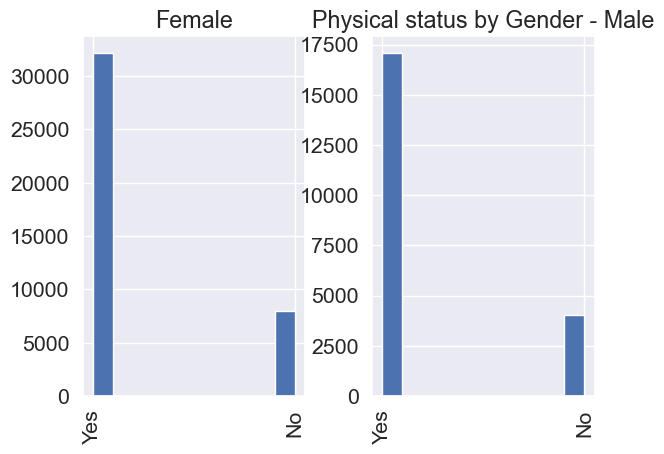

In [132]:
plt.figure(figsize=(8,3), dpi = 150)
df.hist('active', by='gender')
plt.title('Physical status by Gender - Male')
plt.show()

### Show the total number of Active vs Inactive

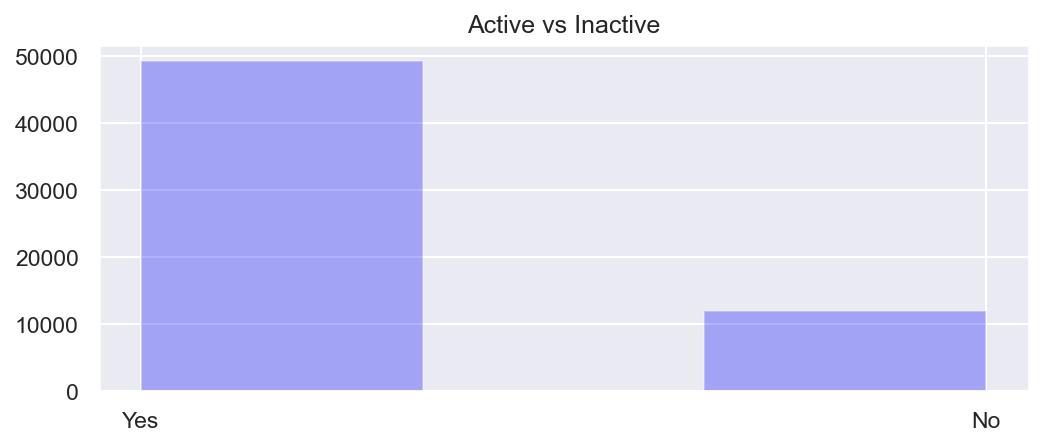

In [133]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,3), dpi = 150)
plt.hist(
   df['active'],
   alpha = 0.3,
   color = 'blue',
   bins = 3
)
plt.title('Active vs Inactive')
plt.show()

In [134]:
df['active'].value_counts()

Yes    49221
No     11949
Name: active, dtype: int64

__The most people are  physically active.__

-----------------------------------------------------------------------------------

# Cardiovascular Disease Data Analysis

## Show the distribution of presence or absence of cardiovascular disease

In [135]:
df['cardio'] = df['cardio'].replace({0: 'No', 1: 'Yes'})

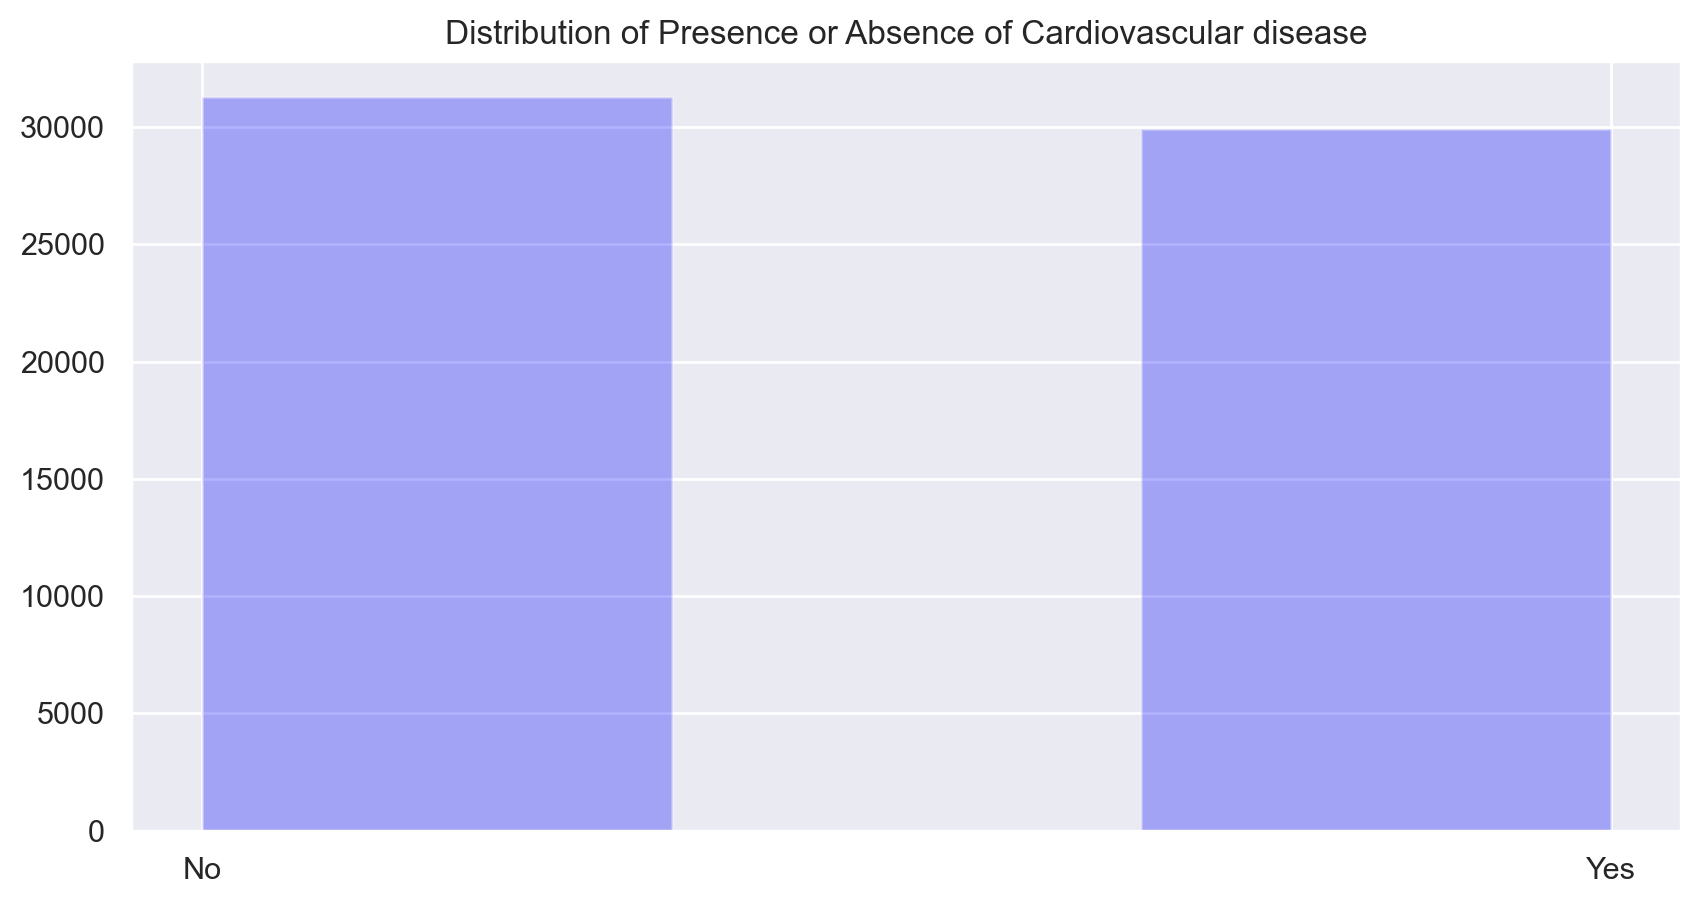

In [136]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5), dpi = 200)
plt.hist(
   df['cardio'],
   alpha = 0.3,
   color = 'blue',
   bins = 3
)
plt.title('Distribution of Presence or Absence of Cardiovascular disease')
plt.show()

In [137]:
df['cardio'].value_counts()

No     31268
Yes    29902
Name: cardio, dtype: int64

## Show the percentage distribution of presence or absence of cardiovascular disease by genders

<Figure size 1200x450 with 0 Axes>

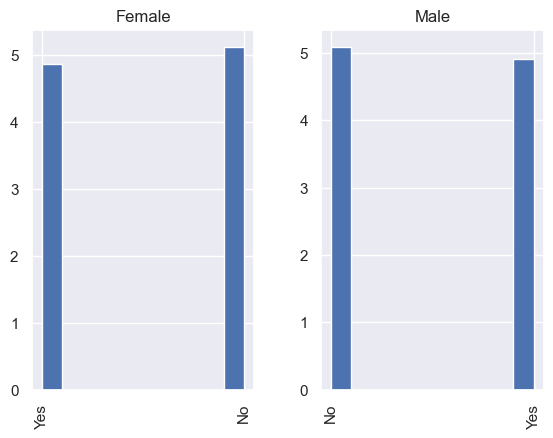

In [138]:
plt.figure(figsize=(8,3), dpi = 150)
df.hist('cardio', density = 1, by='gender')
plt.show()

__More than 50% of the all mеn are without cardiovascular disease and this statement is also valid for the women.__

In [139]:
df.groupby(["cardio", "gender"]).ID.count().unstack()

gender  Female   Male
cardio               
No       20537  10731
Yes      19543  10359

## What is the average age for the people with disease?

In [140]:
df.groupby(["cardio", "gender"]).age.mean().unstack()

gender     Female       Male
cardio                      
No      51.245167  51.157860
Yes     54.626362  54.215465

__The average age for the women and men with cardiovascular disease is 54 years. <br>
For the group without disease: 51 years for the both genders.__

## Is there a correlation between active status and presence or absence of cardiovascular disease?

In [141]:
df['gender'] = df['gender'].replace({'Female' : 1, 'Male' : 2})
df['active'] = df['active'].replace({'No' : 0, 'Yes':1})
df['cardio'] = df['cardio'].replace({'No' : 0, 'Yes':1})

In [142]:
df['active'].corr(df['cardio'])

-0.03645346462084967

__There is no correlation between active status and presence or absence of disease.__

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

# Logistic Regression

__GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age, sex, cholesterol, etc...).__

## Data Preparation and Inspection

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61170 entries, 0 to 63293
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           61170 non-null  int64  
 1   age          61170 non-null  int64  
 2   gender       61170 non-null  int64  
 3   height       61170 non-null  int64  
 4   weight       61170 non-null  float64
 5   ap_hi        61170 non-null  float64
 6   ap_lo        61170 non-null  int64  
 7   cholesterol  61170 non-null  object 
 8   gluc         61170 non-null  object 
 9   smoke        61170 non-null  object 
 10  alco         61170 non-null  object 
 11  active       61170 non-null  int64  
 12  cardio       61170 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 6.5+ MB


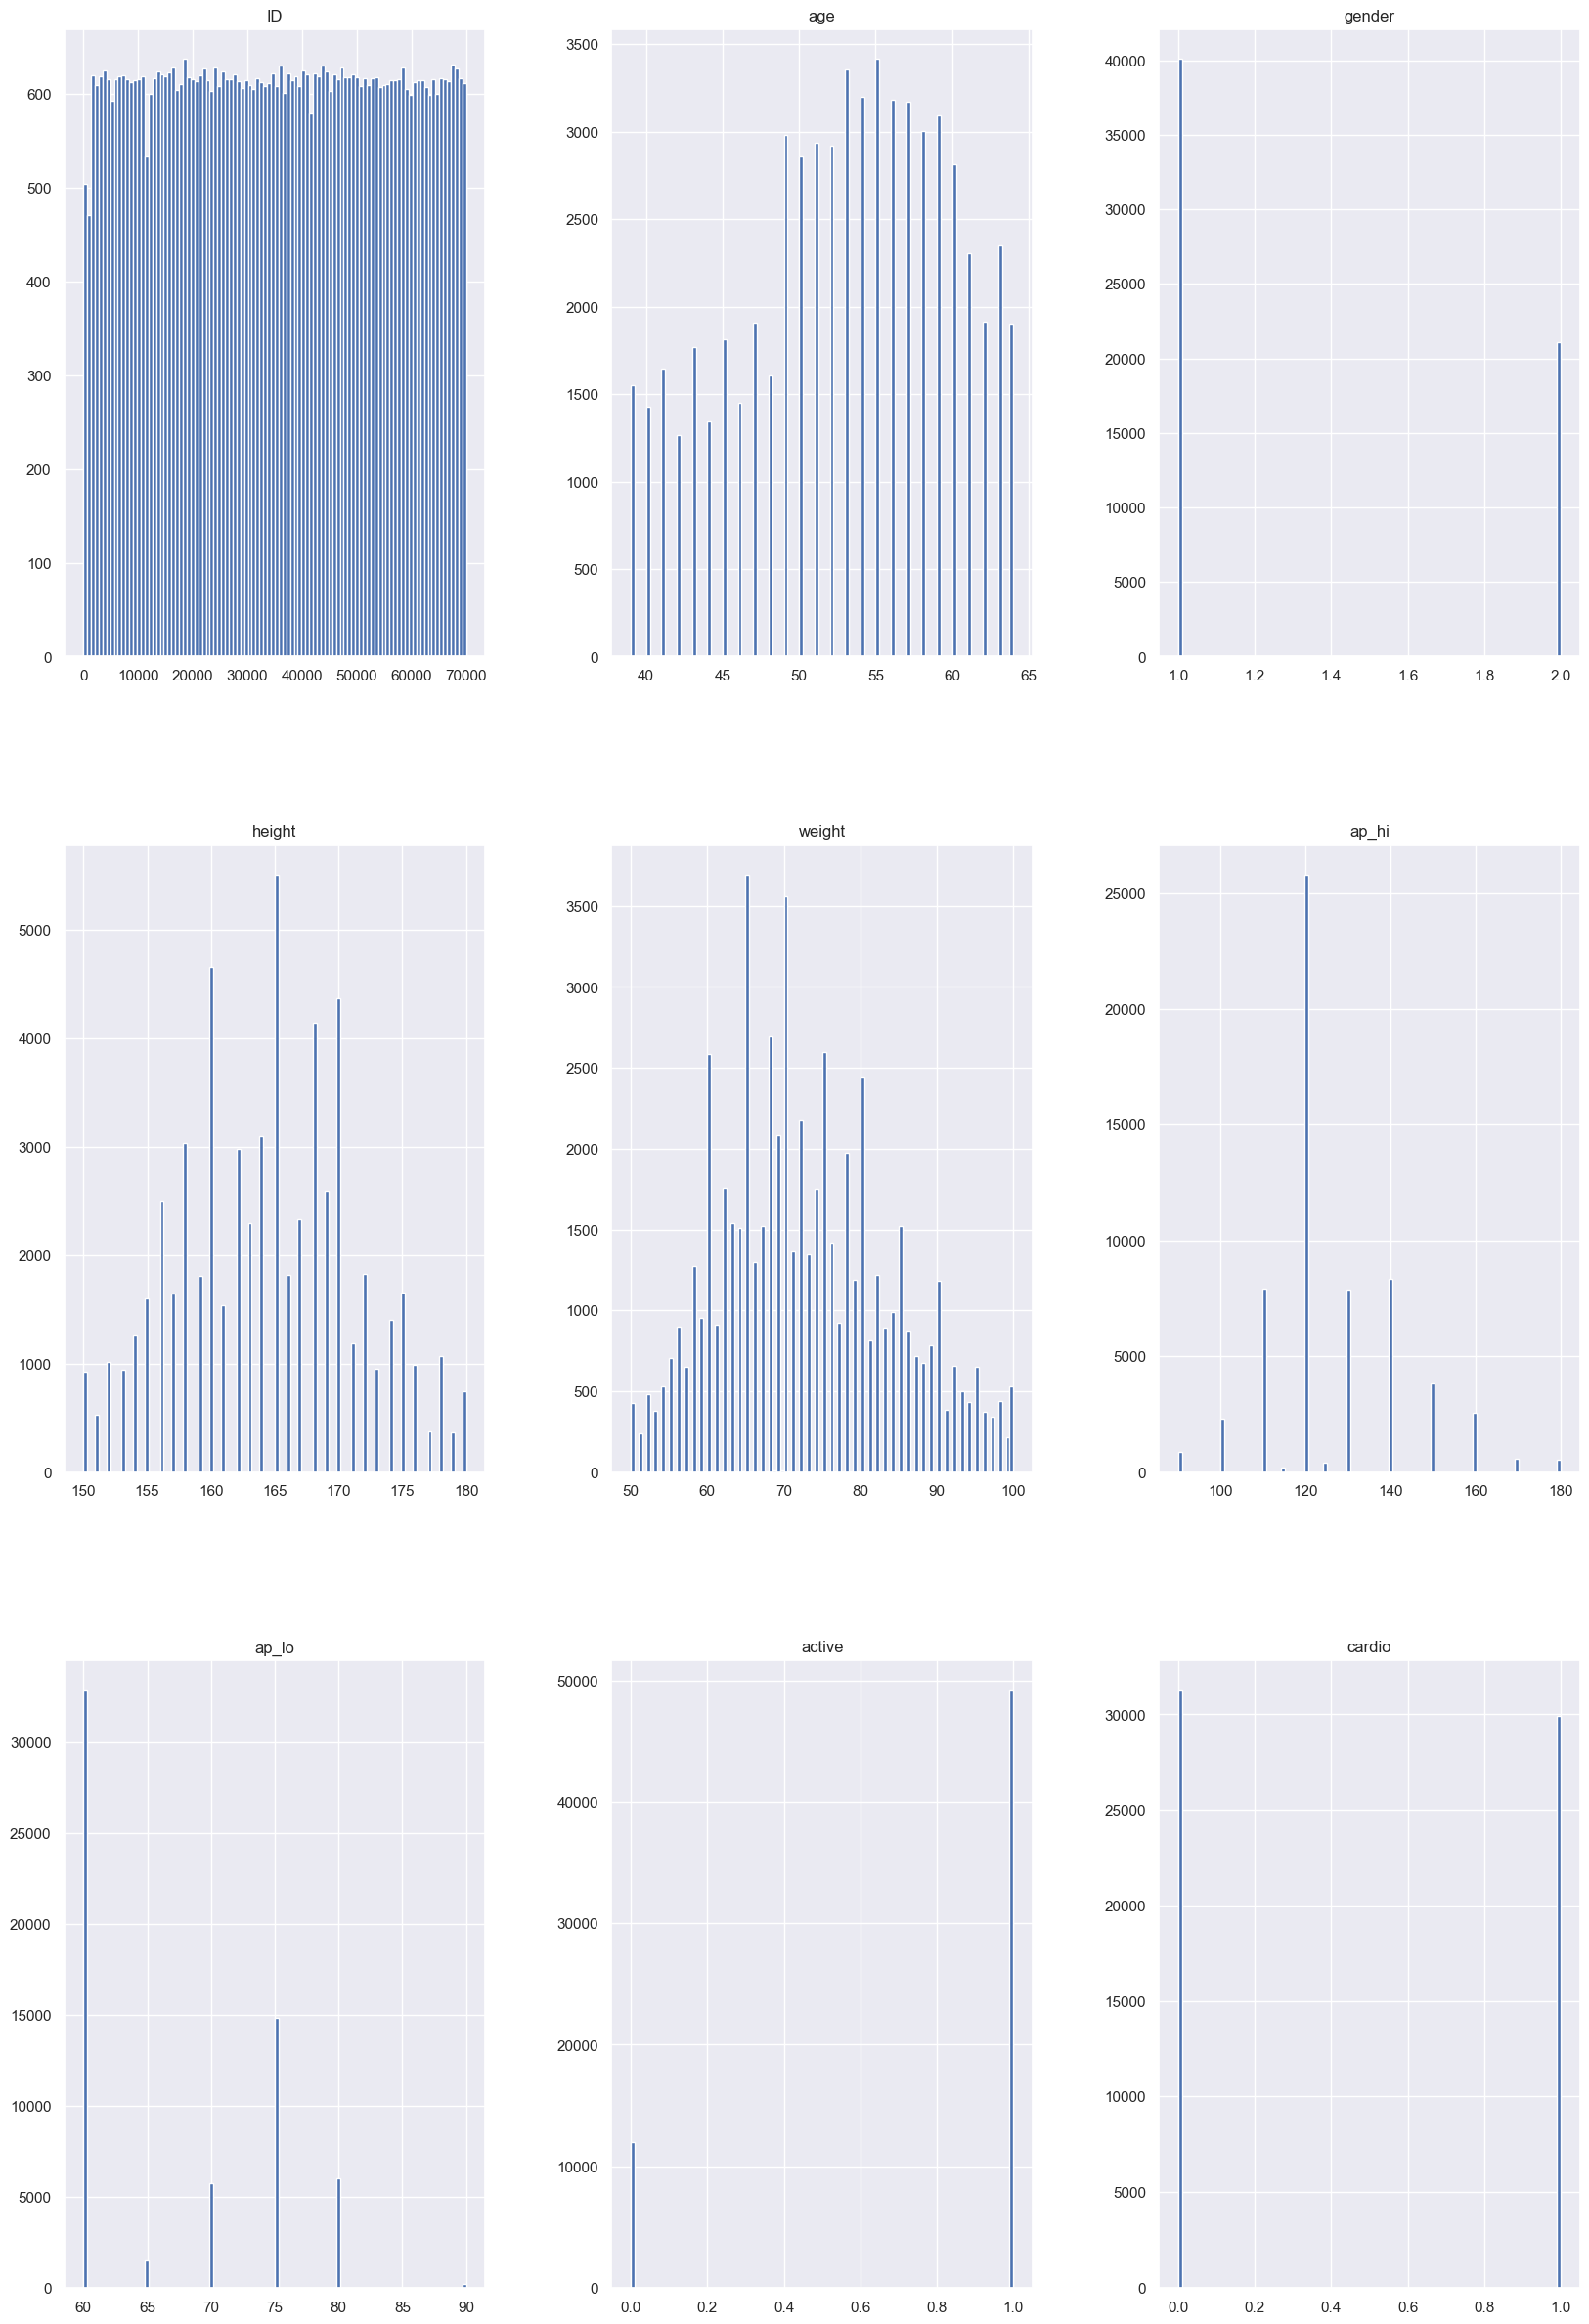

In [144]:
df.hist(figsize = (20,30), bins = 100)
plt.show()

In [145]:
df.cholesterol.value_counts()

normal               46510
above normal          7982
well above normal     6678
Name: cholesterol, dtype: int64

In [146]:
df.gluc.value_counts()

normal               52419
well above normal     4528
above normal          4223
Name: gluc, dtype: int64

In [147]:
df.columns

Index(['ID', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [148]:
df.gluc.replace({"normal" : 1, "above normal" : 2, "well above normal" : 3}, inplace = True)
df.cholesterol.replace({"normal" : 1, "above normal" : 2, "well above normal" : 3}, inplace = True)

In [149]:
df.gluc.value_counts()

1    52419
3     4528
2     4223
Name: gluc, dtype: int64

In [150]:
df.cholesterol.value_counts()

1    46510
2     7982
3     6678
Name: cholesterol, dtype: int64

In [151]:
df.smoke.value_counts()

No     55966
Yes     5204
Name: smoke, dtype: int64

In [152]:
df.smoke.replace({"No" : 0, "Yes" : 1}, inplace = True)

In [153]:
df.alco.value_counts()

No     58064
Yes     3106
Name: alco, dtype: int64

In [154]:
df.alco.replace({"No" : 0, "Yes" : 1}, inplace = True)

In [155]:
df.active.value_counts()

1    49221
0    11949
Name: active, dtype: int64

In [156]:
df.cardio.value_counts()

0    31268
1    29902
Name: cardio, dtype: int64

__Pairplot that displays the relationships between the following columns.__

In [ ]:
plt.figure(figsize=(20, 30))
sns.pairplot(df[['age','gender','ap_hi','ap_lo', 'cholesterol', 'gluc', 'cardio']], hue = "cardio", markers=["o", "s"])
plt.show()

__Heatmap that displays the correlation between all the columns.__


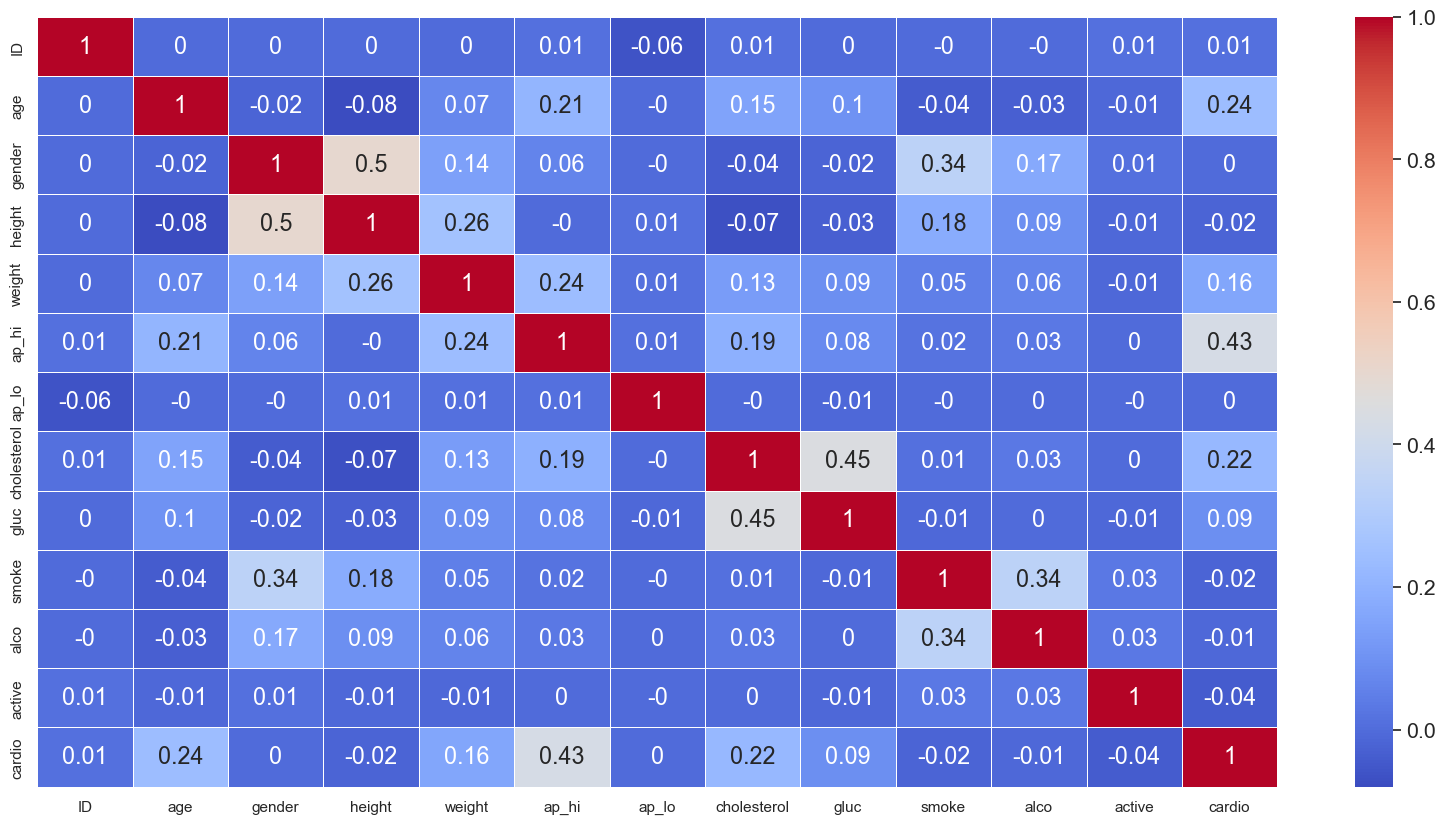

In [158]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.set(font_scale=1.4)
sns.heatmap(np.round(df.corr(), 2), annot = True, linewidths=.5, ax=ax, cmap= 'coolwarm')
plt.show()

## Separate the features from the labels into 2 objects, X and y.

In [161]:
X = df.drop('cardio', axis = 1)
y = df['cardio']

## Perform a train test split on the data, with the test size of 10% and a random_state of 101.

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [164]:
scaled_X_train

array([[ 1.34817747,  0.32452047, -0.72361666, ..., -0.30541099,
        -0.23104945,  0.49170959],
       [ 1.19736401, -0.71251073, -0.72361666, ..., -0.30541099,
        -0.23104945,  0.49170959],
       [ 0.30636087, -1.30509998,  1.38194718, ...,  3.27427636,
         4.32807787,  0.49170959],
       ...,
       [-0.72615424, -0.71251073, -0.72361666, ..., -0.30541099,
        -0.23104945, -2.03372077],
       [-0.71585794,  0.62081509,  1.38194718, ..., -0.30541099,
        -0.23104945, -2.03372077],
       [ 0.86798184, -0.56436341, -0.72361666, ..., -0.30541099,
        -0.23104945,  0.49170959]])

## Logistic Regression Model

In [165]:
from sklearn.linear_model import LogisticRegressionCV
log_model = LogisticRegressionCV(cv=5, random_state=101).fit(scaled_X_train, y_train)
log_model

LogisticRegressionCV(cv=5, random_state=101)

__C value: The C value in Logistic Regression is an user adjustable parameter that controls regularisation. In simple terms, higher values of C will instruct our model to fit the training set as best as possible, while lower C values will favour a simple models with coefficients closer to zero.__

In [166]:
log_model.C_

array([10000.])

In [167]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 101,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

## Coeffecients


__Report back the model's coefficients.__

In [168]:
log_model.coef_

array([[ 0.00670779,  0.34693921, -0.00685516, -0.0306456 ,  0.14379453,
         1.02143823,  0.00536544,  0.32607915, -0.05424638, -0.039868  ,
        -0.04343093, -0.09200565]])

In [169]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [170]:
coefs = coefs.sort_values()

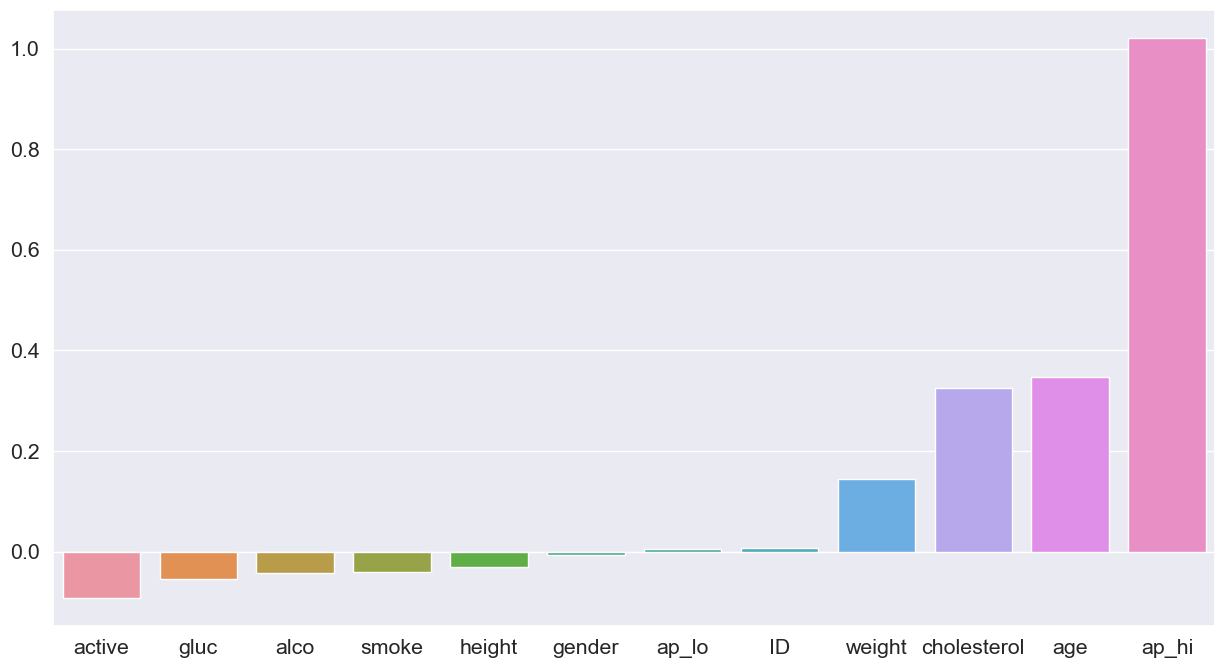

In [174]:
plt.figure(figsize=(15,8))
sns.barplot(x=coefs.index,y=coefs.values);

## Model Performance Evaluation

__Let's now evaluate the model on the remaining 10% of the data, the test set.__

In [176]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [177]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [178]:
accuracy_score(y_test,y_pred)

0.7263364394310937

In [179]:
confusion_matrix_ = confusion_matrix(y_test,y_pred)
print(confusion_matrix_)

[[2498  628]
 [1046 1945]]


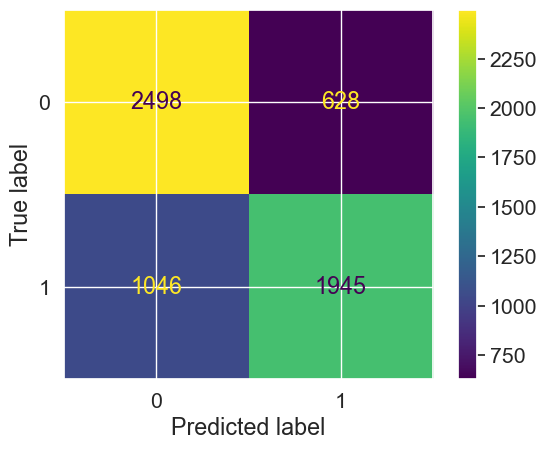

In [180]:
from sklearn.metrics import ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(confusion_matrix_)
matrix.plot()
plt.show()

In [181]:
TrueNegative, FalsePositive, FalseNegative, TruePositive = confusion_matrix(y_test.tolist(), y_pred.tolist()).ravel()
print(TrueNegative, FalsePositive, FalseNegative, TruePositive)

2498 628 1046 1945


In [182]:
Precision = TruePositive / (TruePositive + FalsePositive)
Precision

0.755926933540614

In [183]:
Accuracy = (TruePositive + TrueNegative) / (TruePositive + TrueNegative + FalsePositive + FalseNegative)
Accuracy

0.7263364394310937

In [184]:
Recall = TruePositive / (TruePositive + FalseNegative)
Recall

0.6502841858910063

In [185]:
#True Negative Rate
Specifity = TrueNegative / (TrueNegative + FalsePositive)
Specifity

0.7991042866282789

In [186]:
#True Positive Rate
Sensitivity = TruePositive / (TruePositive + FalseNegative)
Sensitivity

0.6502841858910063

In [187]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      3126
           1       0.76      0.65      0.70      2991

    accuracy                           0.73      6117
   macro avg       0.73      0.72      0.72      6117
weighted avg       0.73      0.73      0.72      6117



In [188]:
X_train.iloc[0]

ID             62245.0
age               55.0
gender             1.0
height           164.0
weight            90.0
ap_hi            125.0
ap_lo             60.0
cholesterol        1.0
gluc               1.0
smoke              0.0
alco               0.0
active             1.0
Name: 56322, dtype: float64

In [189]:
y_train.iloc[0]

1

In [196]:
# 0% probability of 0 class
# 100% probability of 1 class
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0., 1.]])

In [191]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1], dtype=int64)

In [197]:
# predict on test data
log_model.predict(scaled_X_test)[0]

0

In [198]:
# the true result
y_test.tolist()[0]

0

## Performance Curves

In [200]:
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)

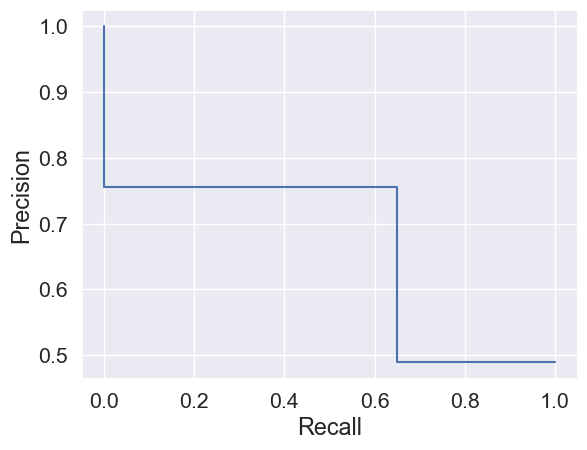

In [201]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

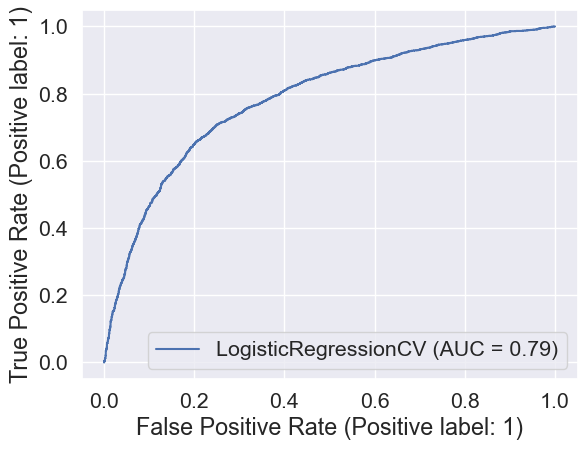

In [202]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(log_model,scaled_X_test,y_test)

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

In [ ]:
A patient with the following features has come into the medical office:
ID           1
age          30.0
gender        1
height        160
weight        80
ap_hi         200
ap_lo         100
cholesterol   3
gluc          3
smoke         1
alco          1
active        0

In [223]:
 patient_1 = [[1, 30.0, 1, 160, 80, 200, 100, 3, 3, 1, 1, 0]]

In [224]:
log_model.predict(patient_1)

array([1], dtype=int64)

In [225]:
log_model.predict_proba(patient_1)

array([[0., 1.]])